# `Impact of Molecular Descriptors on Solubility Prediction in Chemical Compounds`

A compound's solubility affects its absorption, distribution, metabolism, and excretion, making it a crucial attribute in medication design and environmental research (Lipinski et al., 2001). The collection contains a wide range of molecular descriptors, including topological polar surface area (TPSA), number of hydrogen bond acceptors and donors, molecular weight, LogP, and more.

Understanding the relationship between these characteristics and solubility can lead to more accurate predictive models and better medication formulations and environmental risk assessments. Previous studies have demonstrated that descriptors such as LogP and TPSA have a significant impact on solubility because of their functions in molecular surface properties and intermolecular interactions (Hou, Xu & Lee, 2009).


## `Data Cleaning & Preprocessing`

Data preprocessing and cleansing are crucial in data analysis and machine learning (Zhu et al., 2019).  To ensure the accuracy and quality of the dataset used for modeling, which includes chemical compounds and their properties like solubility, molecular weight, and topological polar surface area (Kotsiantis, Kanellopoulos & Pintelas, 2006)



1. **ID**: Unique identifier for each compound.
2. **Name**: Chemical name of the compound.
3. **InChI**: IUPAC International Chemical Identifier.
4. **InChIKey**: Simplified version of InChI.
5. **SMILES**: Simplified Molecular Input Line Entry System notation.
6. **Solubility**: Solubility measure of the compound.
7. **SD**: Standard deviation of the solubility measure.
8. **Ocurrences**: Number of occurrences in the dataset.
9. **Group**: Group classification.
10. **MolWt**: Molecular weight of the compound.
11. **LogP**: Logarithm of the partition coefficient.
12. **HeavyAtomCount**: Count of heavy atoms.
13. **NumHAcceptors**: Number of hydrogen bond acceptors.
14. **NumHDonors**: Number of hydrogen bond donors.
15. **NumHeteroatoms**: Number of heteroatoms.
16. **NumRotatableBonds**: Number of rotatable bonds.
17. **NumValenceElectrons**: Number of valence electrons.
18. **NumAromaticRings**: Number of aromatic rings.
19. **NumSaturatedRings**: Number of saturated rings.
20. **NumAliphaticRings**: Number of aliphatic rings.
21. **RingCount**: Total ring count.
22. **TPSA**: Topological Polar Surface Area.
23. **LabuteASA**: Labute's Approximation to Surface Area.
24. **BalabanJ**: Balaban's index.
25. **BertzCT**: Bertz complexity index.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
# To imports the CSV file
df = pd.read_csv('MS4S16_Resit_Dataset.csv')
df

ID                                               Name  \
0      A-3         N,N,N-trimethyloctadecan-1-aminium bromide   
1      A-4                           Benzo[cd]indol-2(1H)-one   
2      A-5                               4-chlorobenzaldehyde   
3      A-8  zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...   
4      A-9  4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...   
...    ...                                                ...   
9977  I-84                                         tetracaine   
9978  I-85                                       tetracycline   
9979  I-86                                             thymol   
9980  I-93                                          verapamil   
9981  I-94                                           warfarin   

                                                  InChI  \
0     InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...   
1     InChI=1S/C11H7NO/c13-11-8-5-1-3-7-4-2-6-9(12-1...   
2           InChI=1S/C7H5ClO/c8-7-3-1-6(5-9)2-4-7/h1-5H   
3     InChI=1S/2C23H22O3.Zn/c2*1-15(17-9-5-3-6-10-17...   
4     InChI=1S/C25H30N2O4/c1-5-20(26(10-22-14-28-22)...   
...                                                 ...   
9977  InChI=1S/C15H24N2O2/c1-4-5-10-16-14-8-6-13(7-9...   
9978  InChI=1S/C22H24N2O8/c1-21(31)8-5-4-6-11(25)12(...   
9979  InChI=1S/C10H14O/c1-7(2)9-5-4-8(3)6-10(9)11/h4...   
9980  InChI=1S/C27H38N2O4/c1-20(2)27(19-28,22-10-12-...   
9981  InChI=1S/C19H16O4/c1-12(20)11-15(13-7-3-2-4-8-...   

                         InChIKey  \
0     SZEMGTQCPRNXEG-UHFFFAOYSA-M   
1     GPYLCFQEKPUWLD-UHFFFAOYSA-N   
2     AVPYQKSLYISFPO-UHFFFAOYSA-N   
3     XTUPUYCJWKHGSW-UHFFFAOYSA-L   
4     FAUAZXVRLVIARB-UHFFFAOYSA-N   
...                           ...   
9977  GKCBAIGFKIBETG-UHFFFAOYSA-N   
9978  OFVLGDICTFRJMM-WESIUVDSSA-N   
9979  MGSRCZKZVOBKFT-UHFFFAOYSA-N   
9980  SGTNSNPWRIOYBX-UHFFFAOYSA-N   
9981  PJVWKTKQMONHTI-UHFFFAOYSA-N   

                                                 SMILES  Solubility        SD  \
0                   [Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C   -3.616127  0.000000   
1                                  O=C1Nc2cccc3cccc1c23   -3.254767  0.000000   
2                                       Clc1ccc(C=O)cc1   -2.177078  0.000000   
3     [Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...   -3.924409  0.000000   
4     C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...   -4.662065  0.000000   
...                                                 ...         ...       ...   
9977                     C(c1ccc(cc1)NCCCC)(=O)OCCN(C)C   -3.010000  0.000000   
9978  OC1=C(C(C2=C(O)[C@@](C(C(C(N)=O)=C(O)[C@H]3N(C...   -2.930000  0.000000   
9979                                c1(cc(ccc1C(C)C)C)O   -2.190000  0.019222   
9980  COc1ccc(CCN(C)CCCC(C#N)(C(C)C)c2ccc(OC)c(OC)c2...   -3.980000  0.000000   
9981              CC(=O)CC(c1ccccc1)c1c(O)c2ccccc2oc1=O   -4.780000  0.450506   

      Ocurrences Group    MolWt  ...  NumRotatableBonds  NumValenceElectrons  \
0              1    G1  392.510  ...               17.0                142.0   
1              1    G1  169.183  ...                0.0                 62.0   
2              1    G1  140.569  ...                1.0                 46.0   
3              1    G1  756.226  ...               10.0                264.0   
4              1    G1  422.525  ...               12.0                164.0   
...          ...   ...      ...  ...                ...                  ...   
9977           1    G1  264.369  ...                8.0                106.0   
9978           1    G1  444.440  ...                2.0                170.0   
9979           3    G5  150.221  ...                1.0                 60.0   
9980           1    G1  454.611  ...               13.0                180.0   
9981           3    G5  308.333  ...                4.0                116.0   

      NumAromaticRings  NumSaturatedRings  NumAliphaticRings  RingCount  \
0                  0.0                0.0                0.0    

In [3]:
# To check the numerical columns in the dataset
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols

['Solubility',
 'SD',
 'Ocurrences',
 'MolWt',
 'MolLogP',
 'MolMR',
 'HeavyAtomCount',
 'NumHAcceptors',
 'NumHDonors',
 'NumHeteroatoms',
 'NumRotatableBonds',
 'NumValenceElectrons',
 'NumAromaticRings',
 'NumSaturatedRings',
 'NumAliphaticRings',
 'RingCount',
 'TPSA',
 'LabuteASA',
 'BalabanJ',
 'BertzCT']

As part of data preprocessing, I have been able to identify 20 columns out of the 26 columns in the dataset which contains numerical values. These are; `'Solubility'`, `'SD'`, `'Ocurrences'`, `'MolWt'`, `'MolLogP'`, `'MolMR'`, `'HeavyAtomCount'`, `'NumHAcceptors'`, `'NumHDonors'`, `'NumHeteroatoms'`, `'NumRotatableBonds'`, `'NumValenceElectrons'`, `'NumAromaticRings'`, `'NumSaturatedRings'`, `'NumAliphaticRings'`, `'RingCount'`, `'TPSA'`, `'LabuteASA'`, `'BalabanJ'`, and `'BertzCT'`.

In [4]:
# To check the categorical columns in the dataset
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols

['ID', 'Name', 'InChI', 'InChIKey', 'SMILES', 'Group']

Following the 20 numerical columns Identified above, we then identified the remaining 6 categorical columns, i.e columns with non-numeric values. They are; `'ID'`, `'Name'`, `'InChI'`, `'InChIKey'`, `'SMILES'`, and `'Group'`.

In [5]:
# To provides a concise summary of a DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9982 entries, 0 to 9981
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   9982 non-null   object 
 1   Name                 9982 non-null   object 
 2   InChI                9982 non-null   object 
 3   InChIKey             9982 non-null   object 
 4   SMILES               9982 non-null   object 
 5   Solubility           9982 non-null   float64
 6   SD                   9982 non-null   float64
 7   Ocurrences           9982 non-null   int64  
 8   Group                9982 non-null   object 
 9   MolWt                9982 non-null   float64
 10  MolLogP              9982 non-null   float64
 11  MolMR                9982 non-null   float64
 12  HeavyAtomCount       9982 non-null   float64
 13  NumHAcceptors        9982 non-null   float64
 14  NumHDonors           9982 non-null   float64
 15  NumHeteroatoms       9982 non-null   f

Looking through the dataset, I noticed that the data were `'not-null'` meaning that null values were absent. Also, I also noticed the datatypes of the columns were in check and we are ready to proceed to the rest of the analysis.

## `Descriptive Statistics & Univariate Analysis`

Descriptive statistics, including variance, standard deviation, range, mean, median, and mode (Field, 2013).  This provide insights into a dataset's central tendency, dispersion, and distributional shape, aiding in understanding its fundamental characteristics.
However, univariate analysis concentrates on looking at the distribution of just one variable. Weinberg and Abramowitz (2008) describe that the data is displayed using various visual aids, including histograms, box plots, and bar charts, to emphasize trends, anomalies, and the overall distribution of the data. Critical features and preliminary patterns in the chemical properties are found by using univariate analysis and descriptive statistics on the dataset. This data's univariate analysis and descriptive statistics are shown below.


In [7]:
# To generates descriptive statistics for the numerical columns in a DataFrame.
df.describe()

Solubility           SD   Ocurrences        MolWt      MolLogP  \
count  9982.000000  9982.000000  9982.000000  9982.000000  9982.000000   
mean     -2.889909     0.067449     1.378081   266.665946     1.979167   
std       2.368154     0.234702     1.023476   184.179024     3.517738   
min     -13.171900     0.000000     1.000000     9.012000   -40.873200   
25%      -4.326325     0.000000     1.000000   162.276000     0.619750   
50%      -2.618173     0.000000     1.000000   228.682000     1.949220   
75%      -1.209735     0.000000     1.000000   320.436000     3.419030   
max       2.137682     3.870145    38.000000  5299.456000    68.541140   

             MolMR  HeavyAtomCount  NumHAcceptors   NumHDonors  \
count  9982.000000     9982.000000    9982.000000  9982.000000   
mean     66.794594       17.374674       3.486776     1.108595   
std      46.523021       12.241536       3.498203     1.488973   
min       0.000000        1.000000       0.000000     0.000000   
25%      40.602475       11.000000       2.000000     0.000000   
50%      58.633400       15.000000       3.000000     1.000000   
75%      81.938000       21.000000       4.000000     2.000000   
max    1419.351700      388.000000      86.000000    26.000000   

       NumHeteroatoms  NumRotatableBonds  NumValenceElectrons  \
count     9982.000000        9982.000000          9982.000000   
mean         5.196955           4.073031            94.243438   
std          4.736275           5.646925            64.748563   
min          0.000000           0.000000             0.000000   
25%          3.000000           1.000000            58.000000   
50%          4.000000           3.000000            82.000000   
75%          6.000000           5.000000           112.000000   
max         89.000000         141.000000          2012.000000   

       NumAromaticRings  NumSaturatedRings  NumAliphaticRings    RingCount  \
count       9982.000000        9982.000000        9982.000000  9982.000000   
mean           1.068323           0.292627           0.447606     1.515929   
std            1.309427           0.879599           1.054667     1.644334   
min            0.000000           0.000000           0.000000     0.000000   
25%            0.000000           0.000000           0.000000     0.000000   
50%            1.000000           0.000000           0.000000     1.000000   
75%            2.000000           0.000000           1.000000     2.000000   
max           35.000000          30.000000          30.000000    36.000000   

              TPSA    LabuteASA     BalabanJ       BertzCT  
count  9982.000000  9982.000000  9982.000000   9982.000000  
mean     62.458601   108.912586     2.392199    467.336782  
std      63.348307    76.462726     1.091123    546.631696  
min       0.000000     7.504228    -0.000004      0.000000  
25%      26.300000    66.623721     2.004357    163.243343  
50%      50.720000    93.299873     2.539539    351.640433  
75%      80.390000   129.118374     3.032456    606.562848  
max    1214.340000  2230.685124     7.517310  20720.267708

The collection offers a comprehensive analysis of substances' physical and chemical characteristics, with 7,816 observations. It reveals compound frequency, lipophilicity, solvent interaction variability, structural complexity, permeability and solubility, molecular complexity, and the variation of BertzCT and Balaban index.

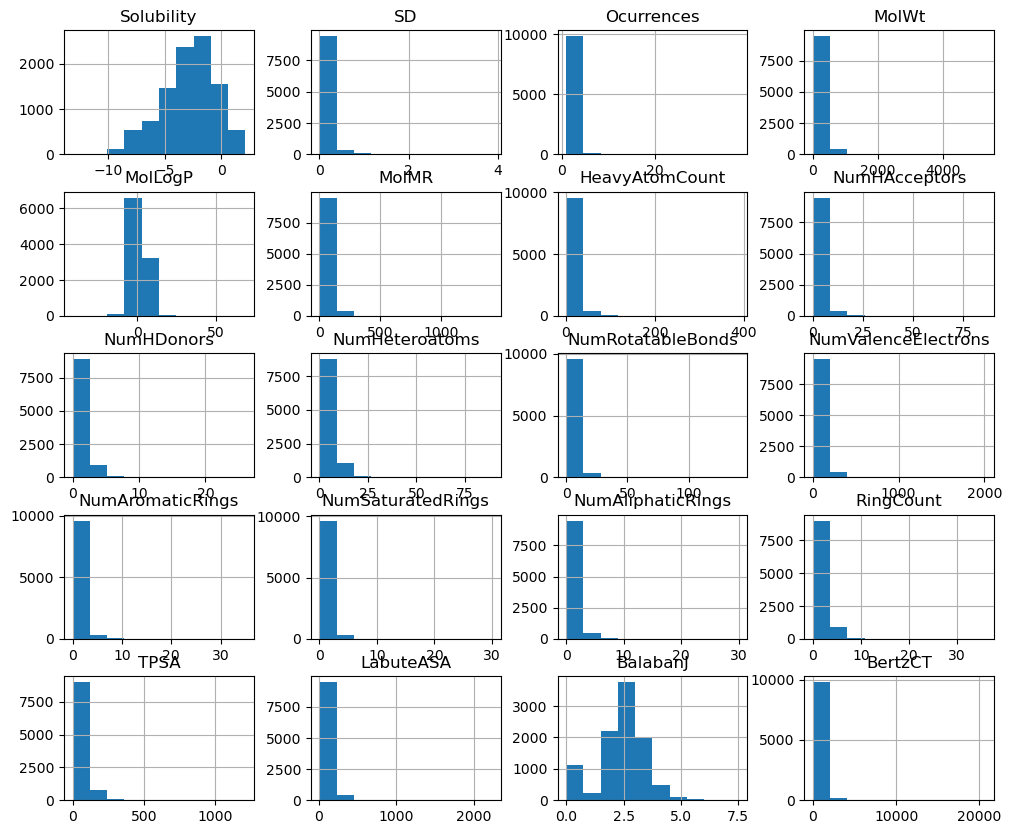

In [8]:
# To create and display histograms for numerical columns in a DataFrame
df[numerical_cols].hist(figsize=(12, 10))
plt.show()

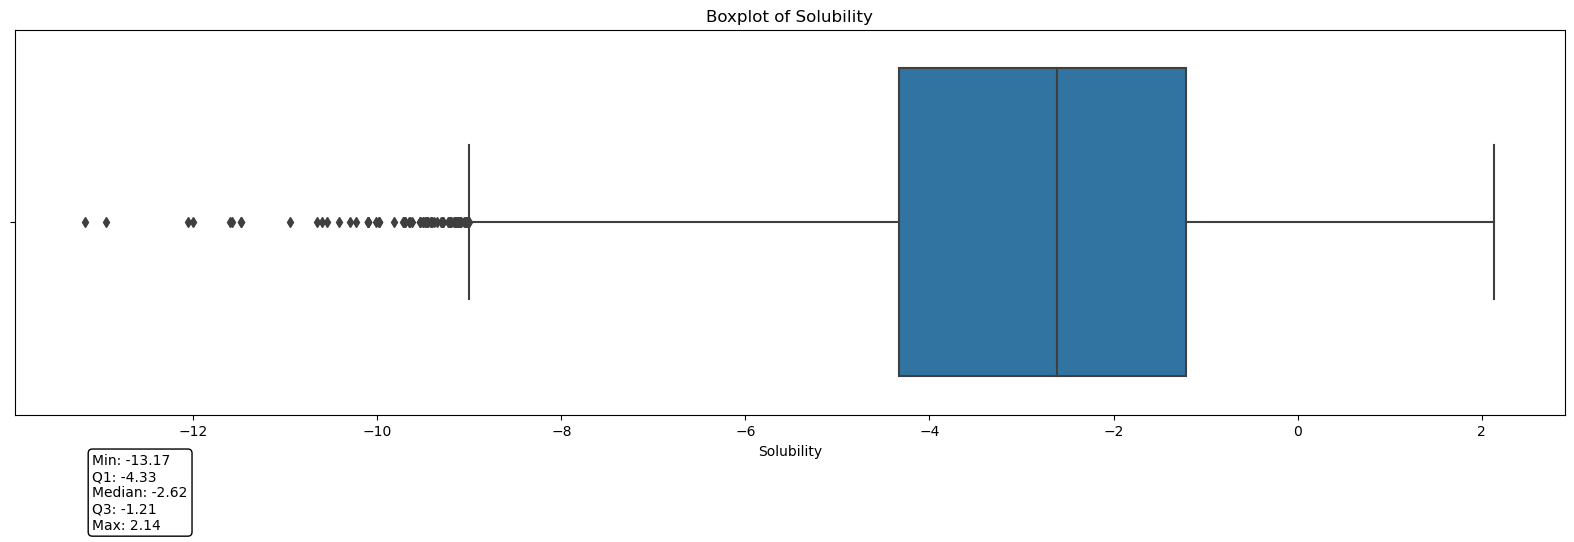

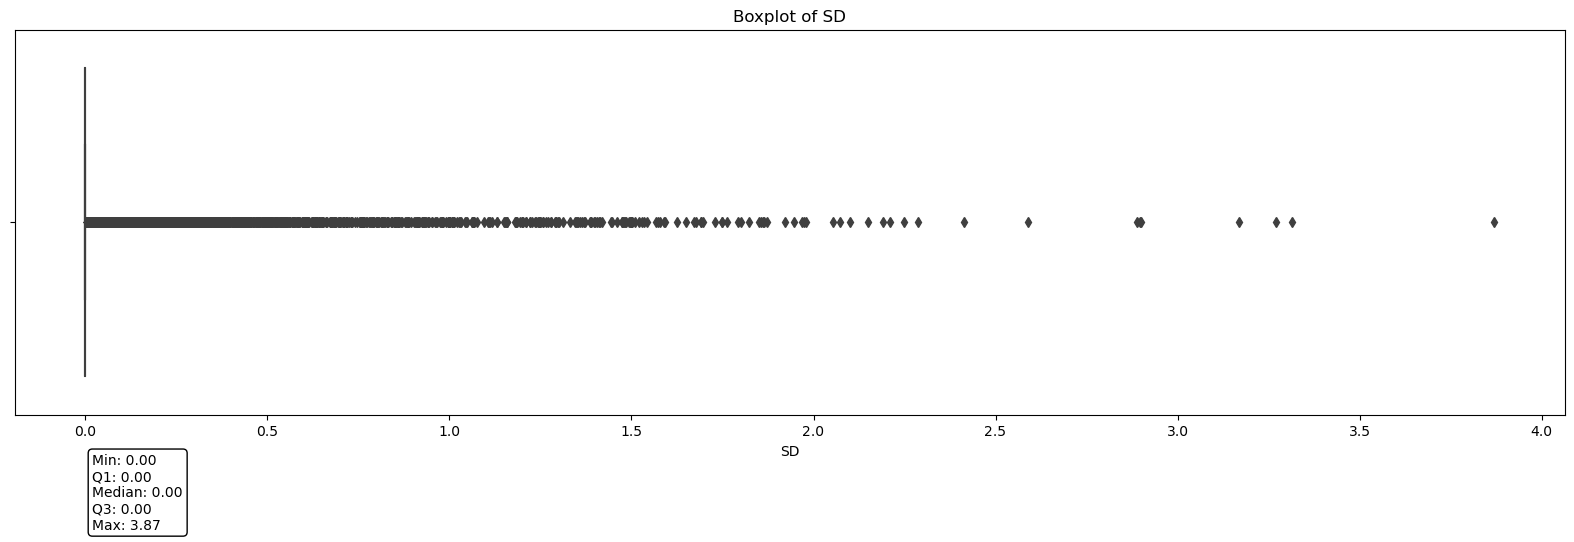

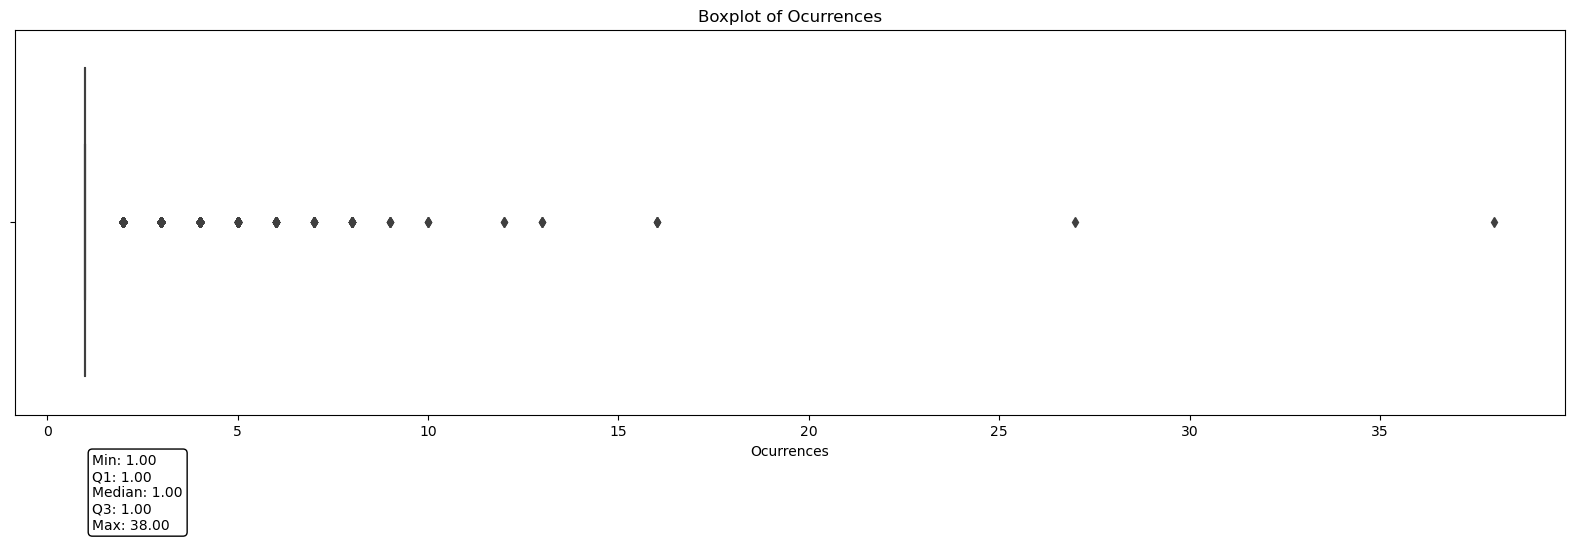

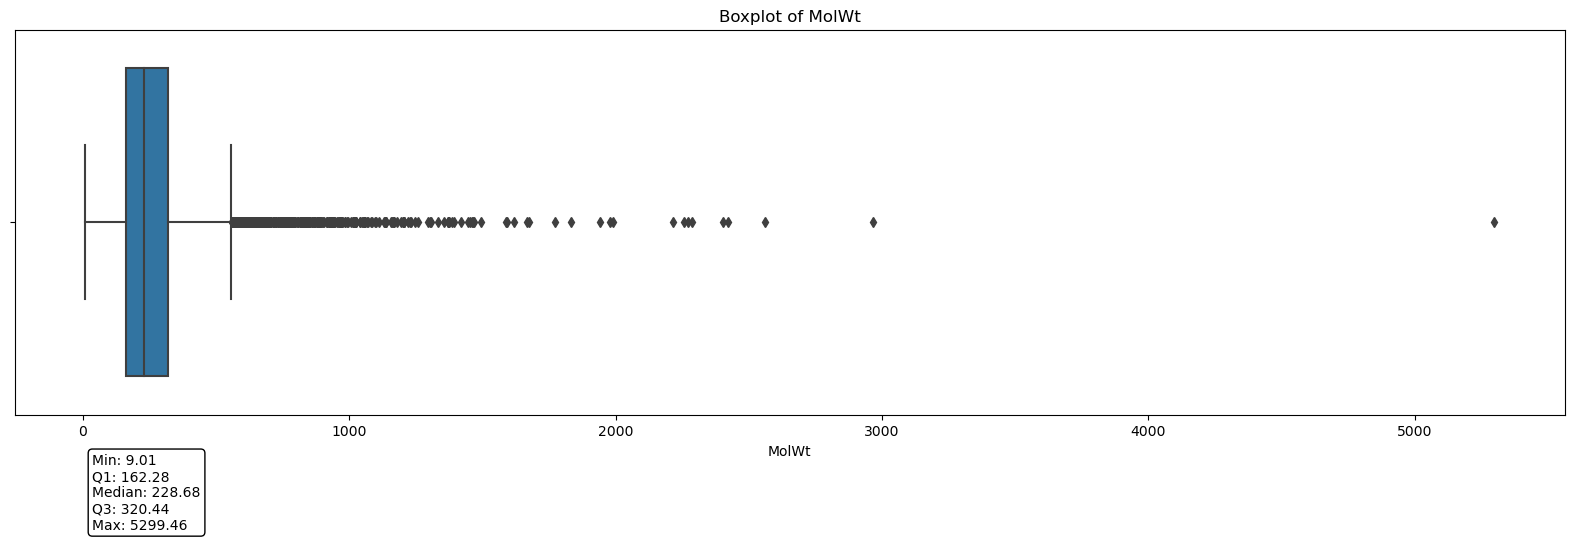

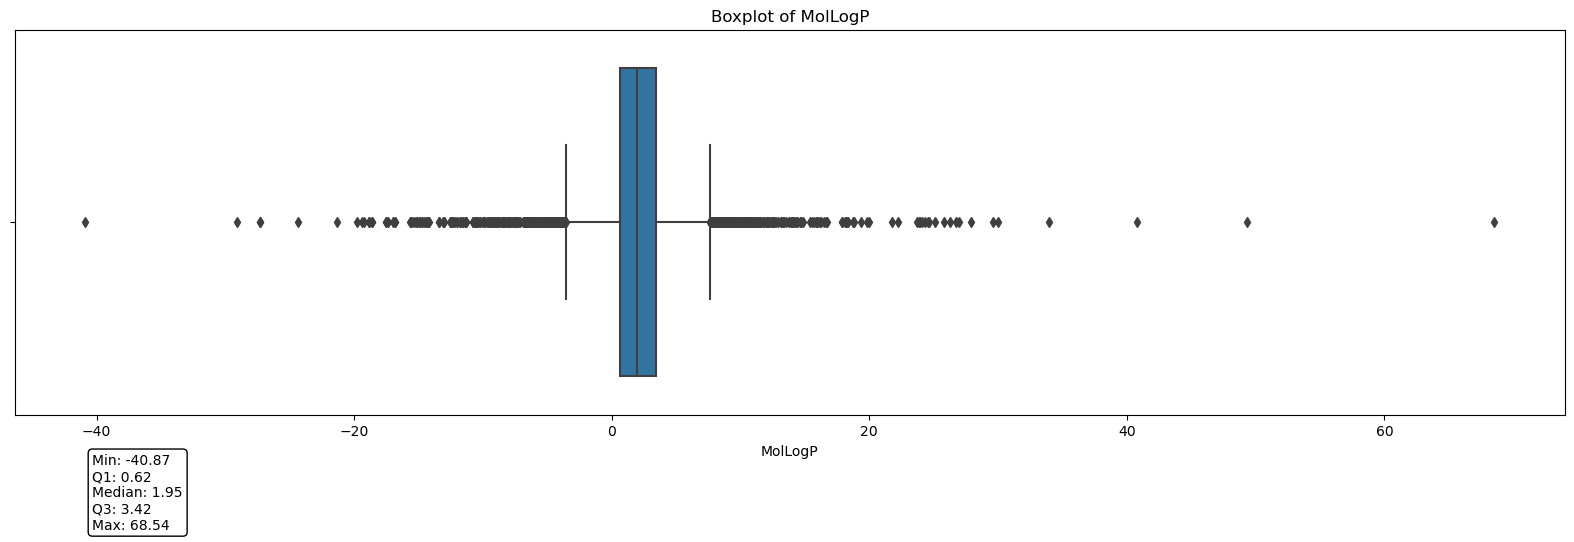

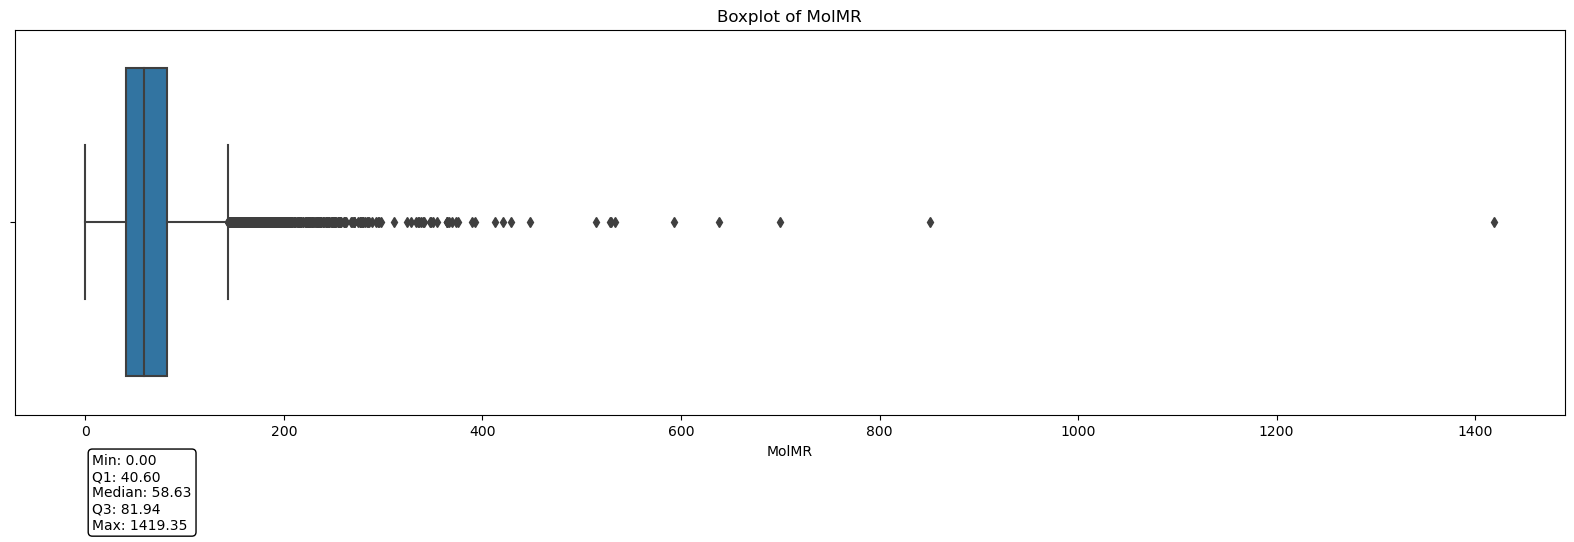

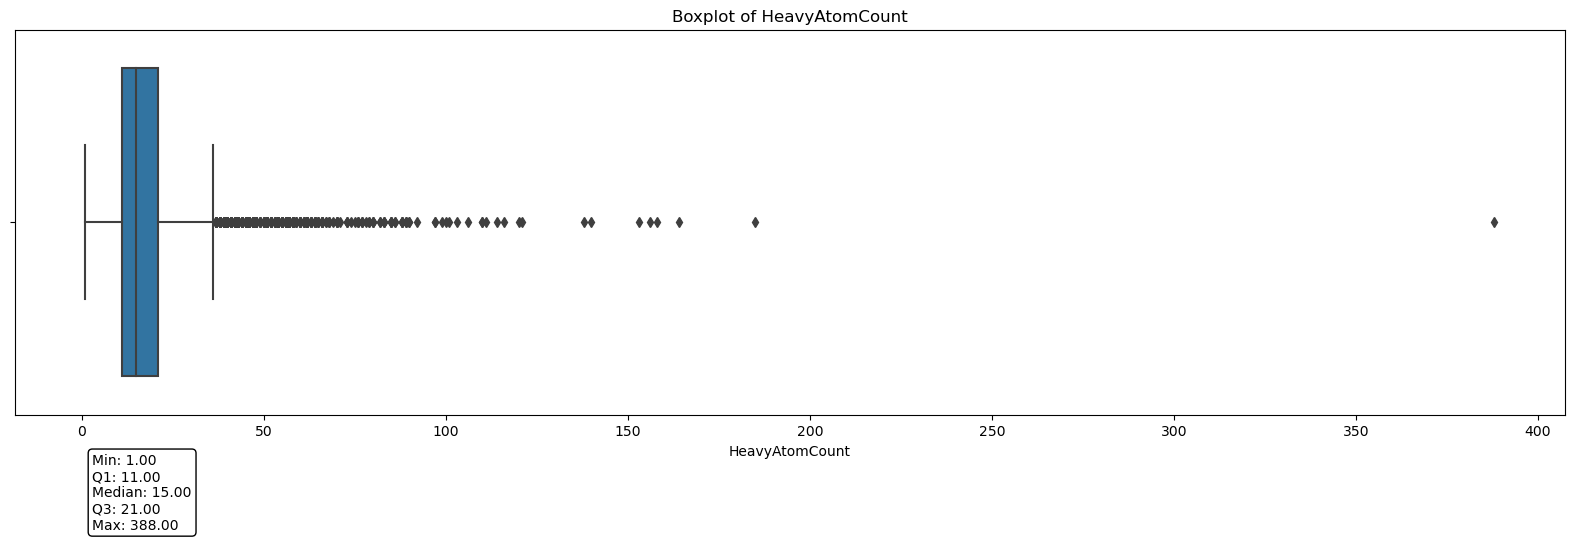

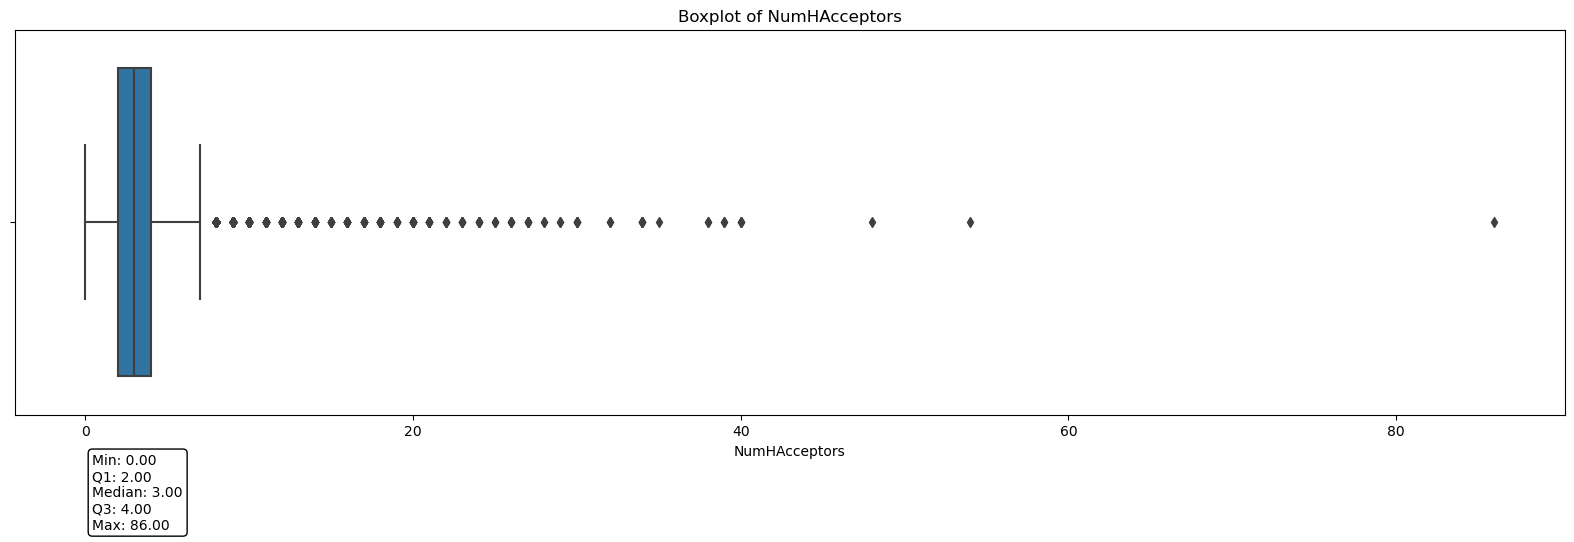

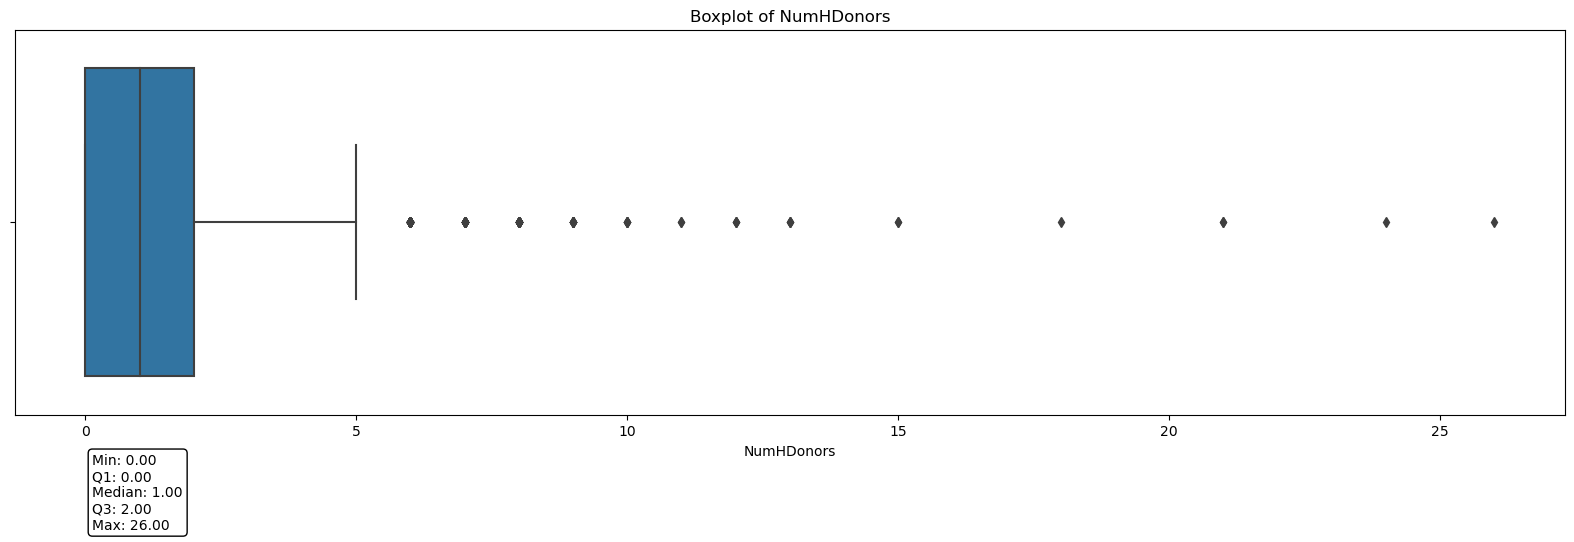

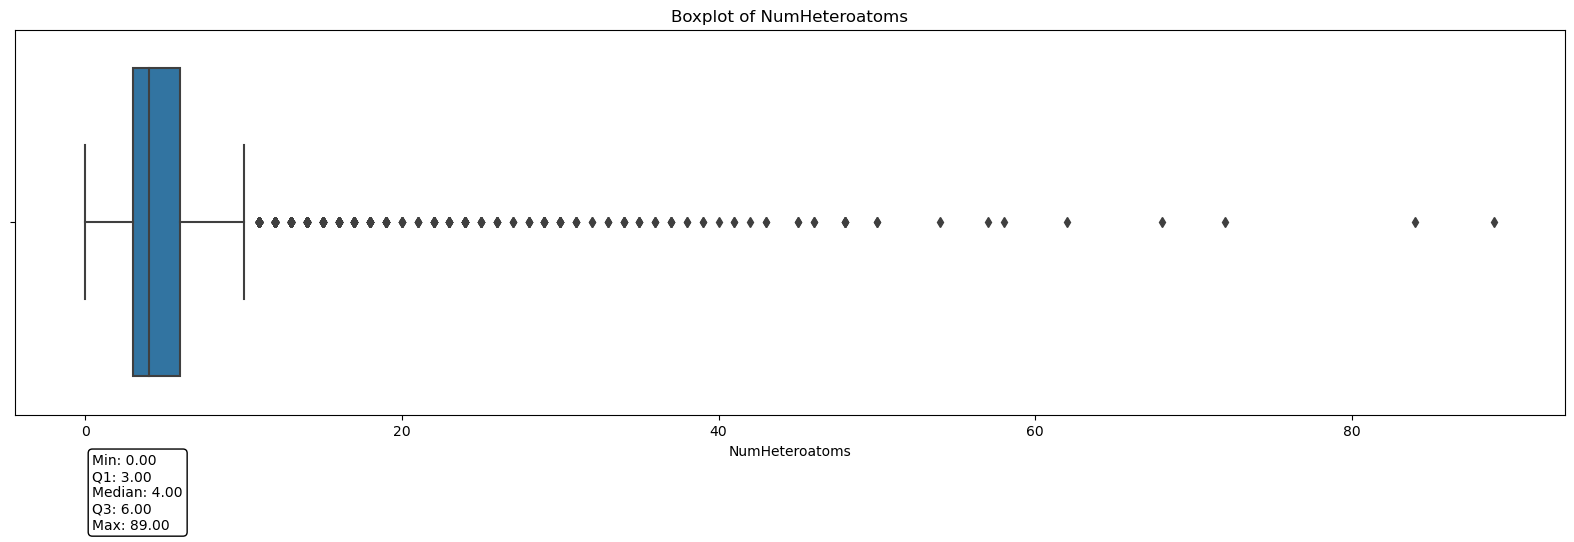

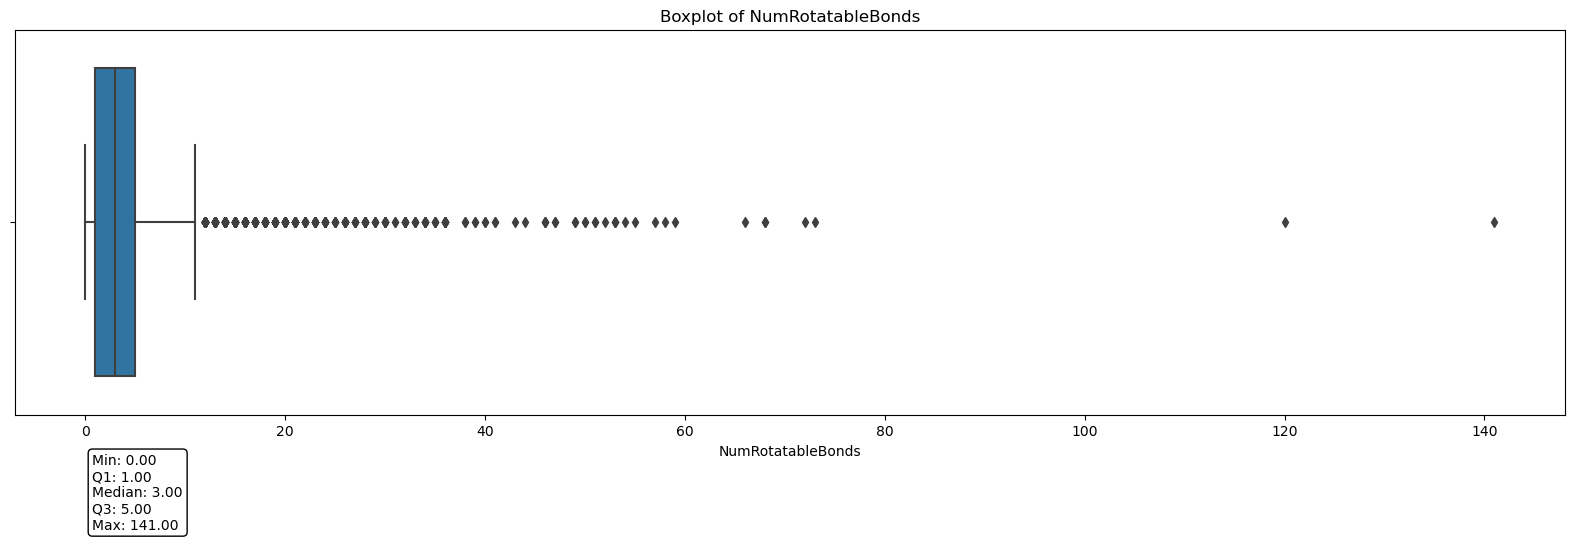

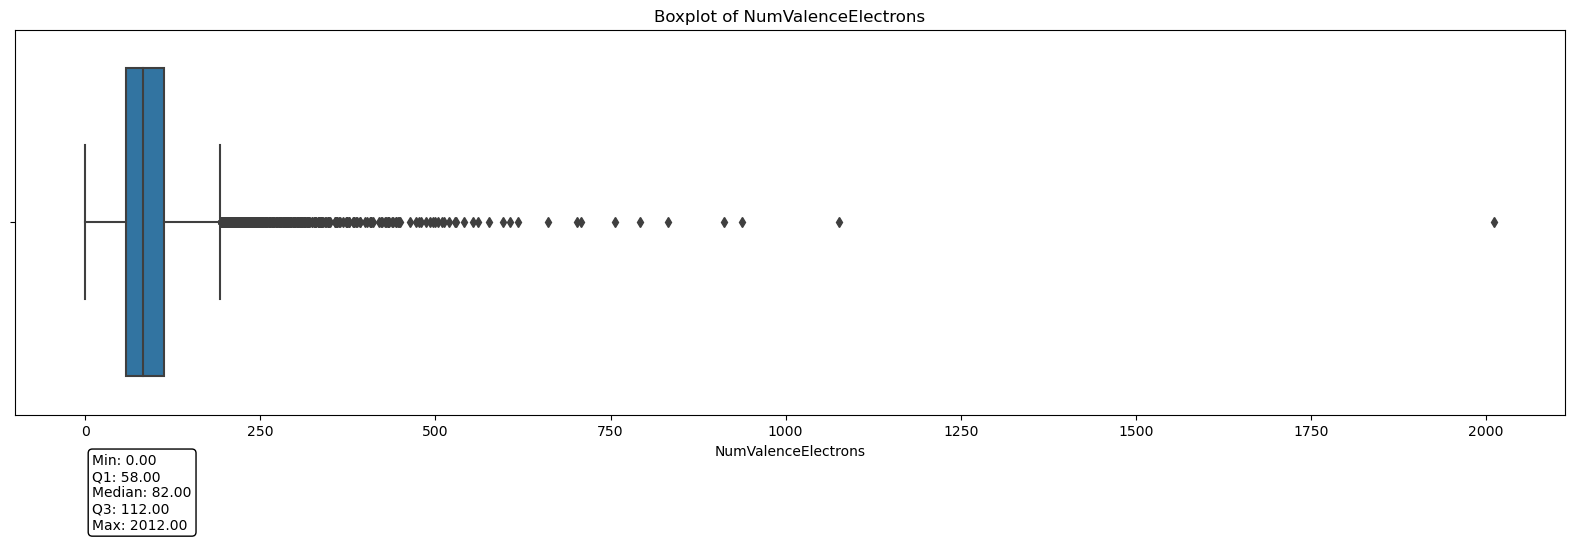

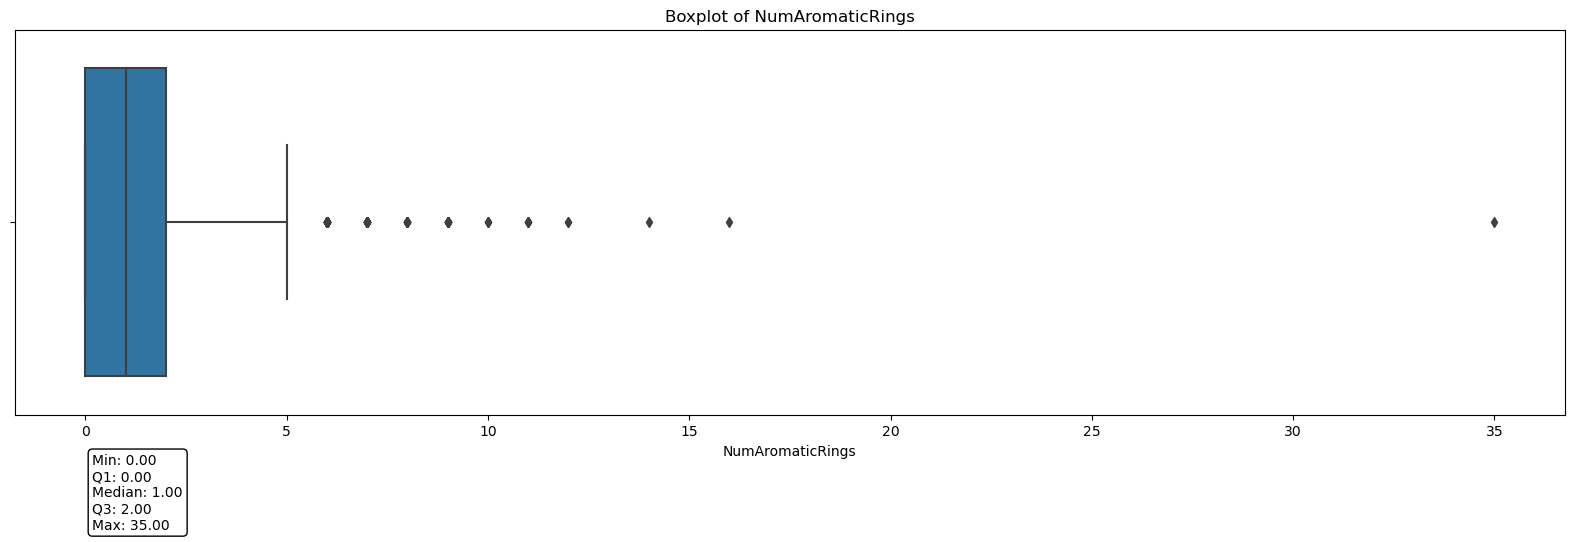

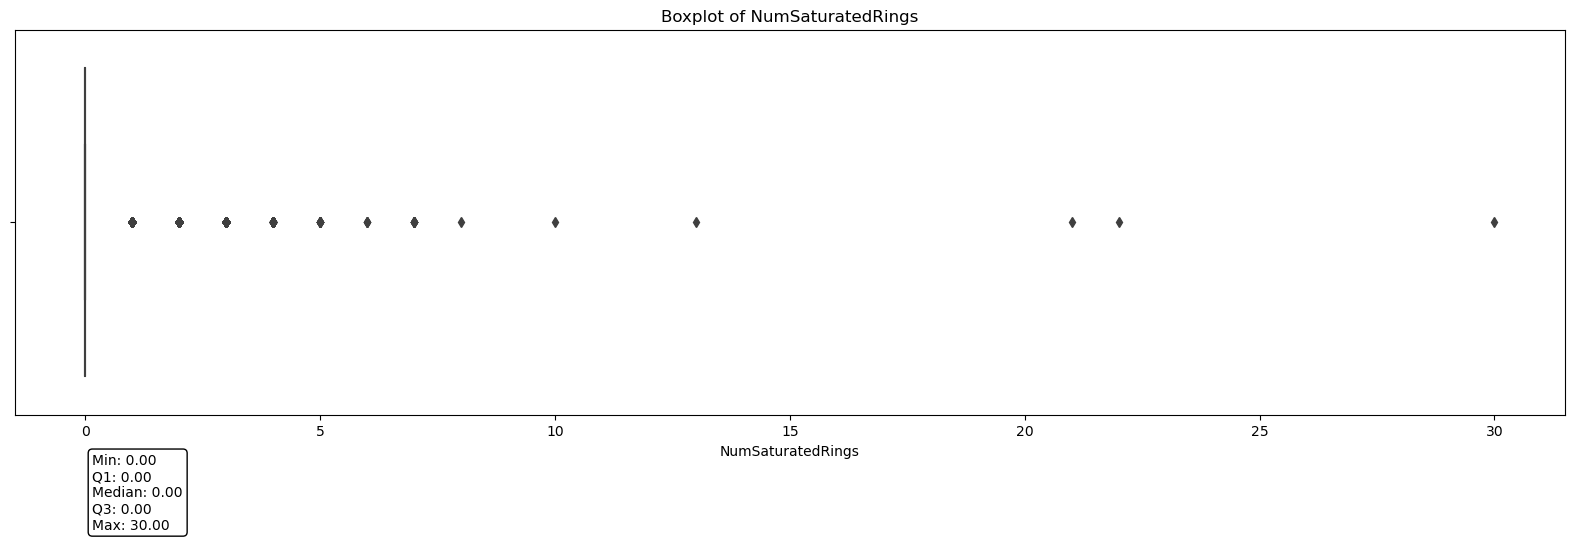

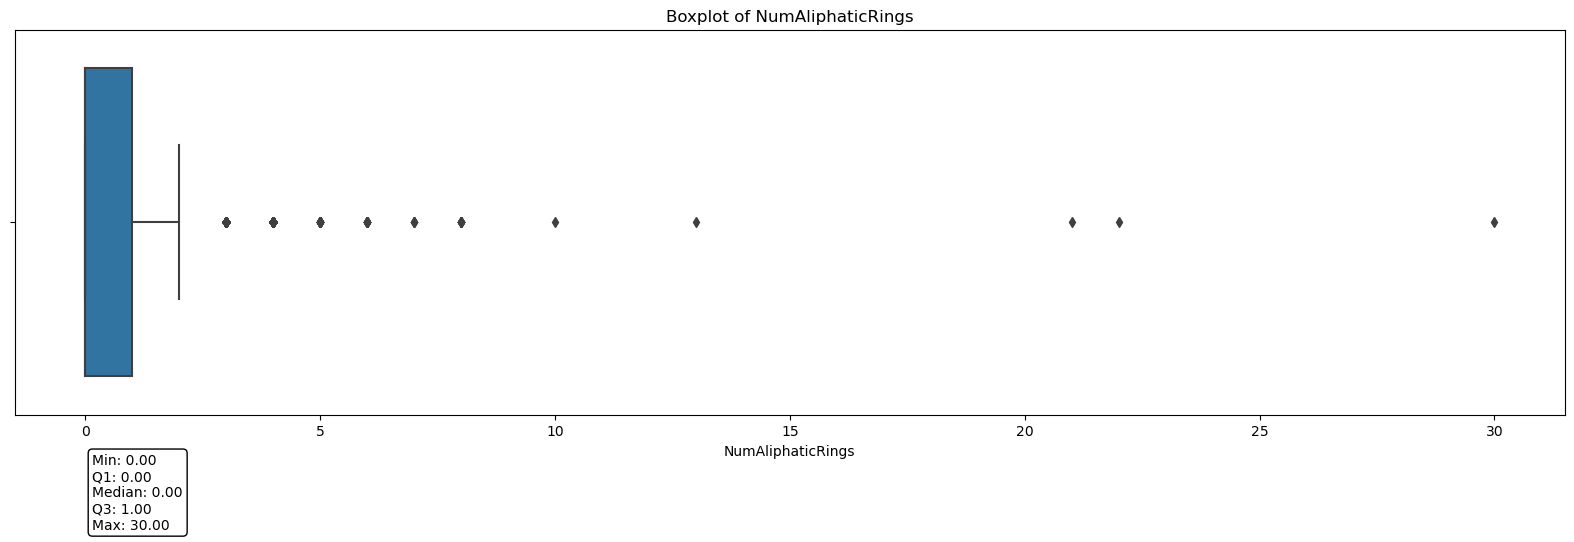

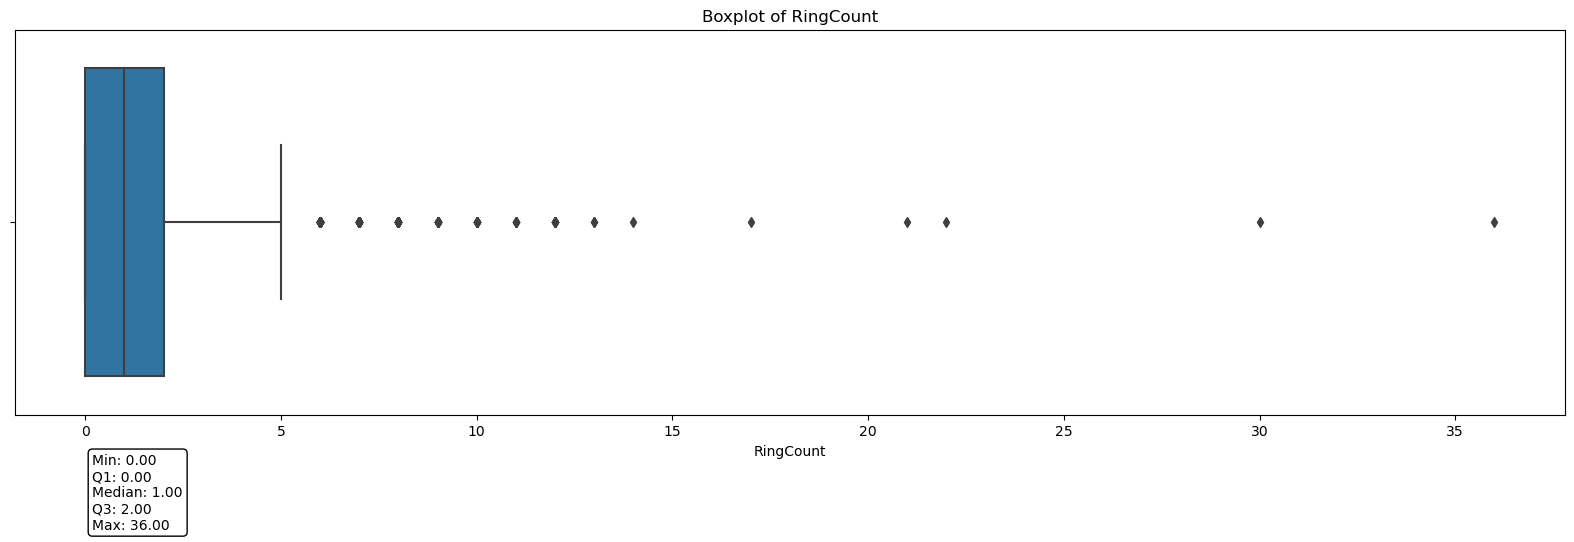

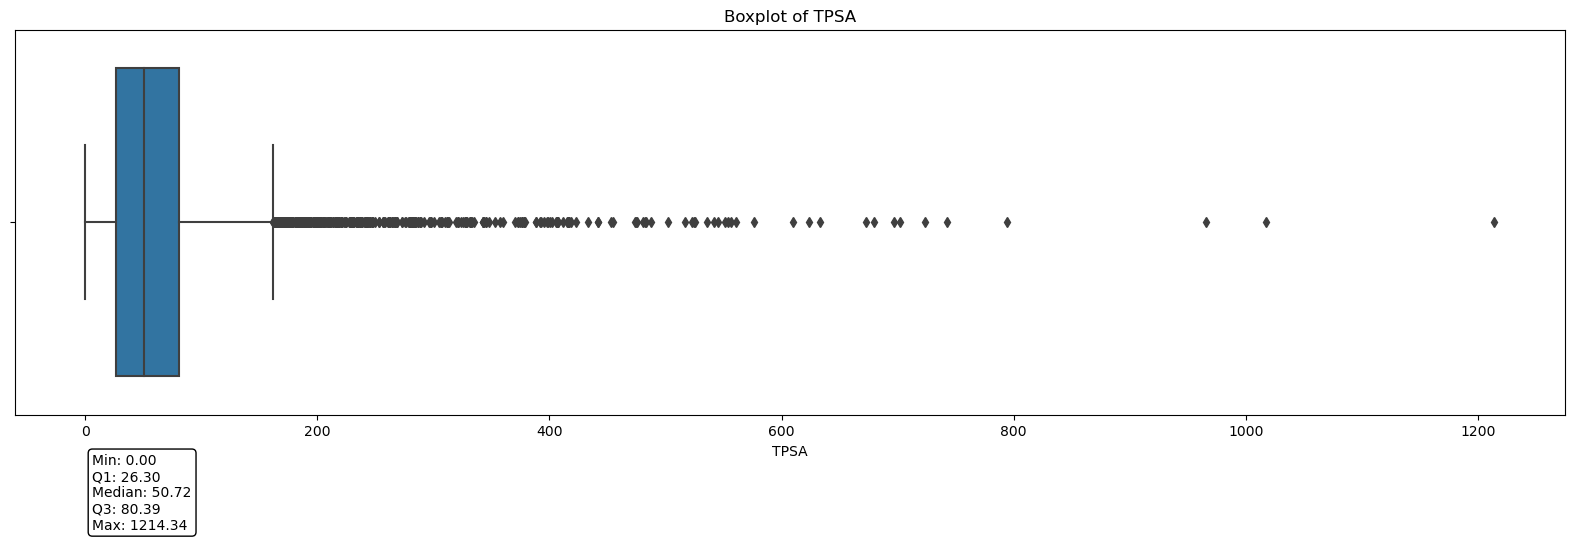

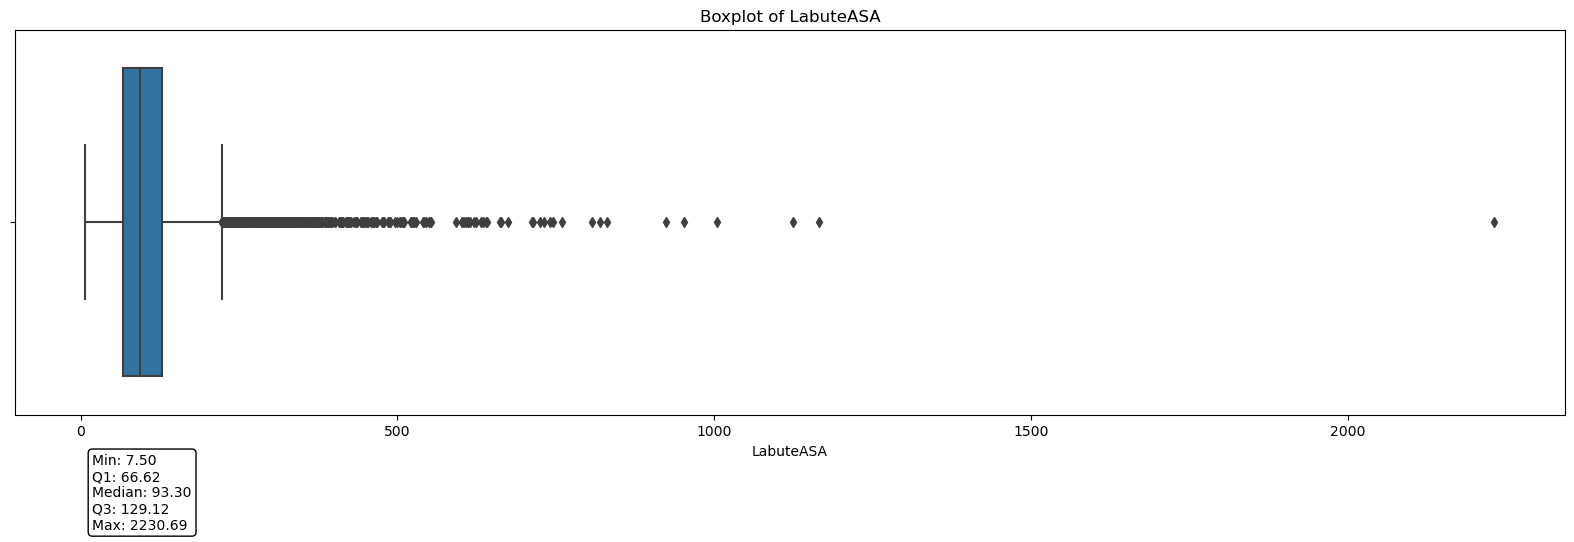

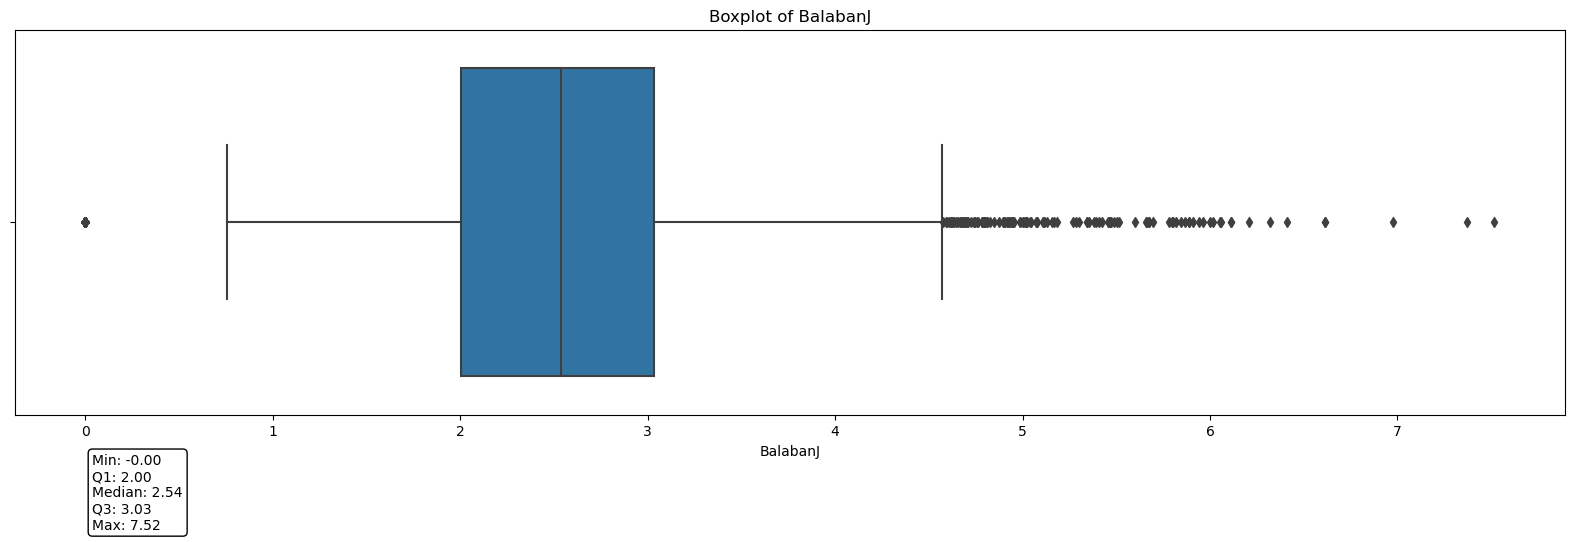

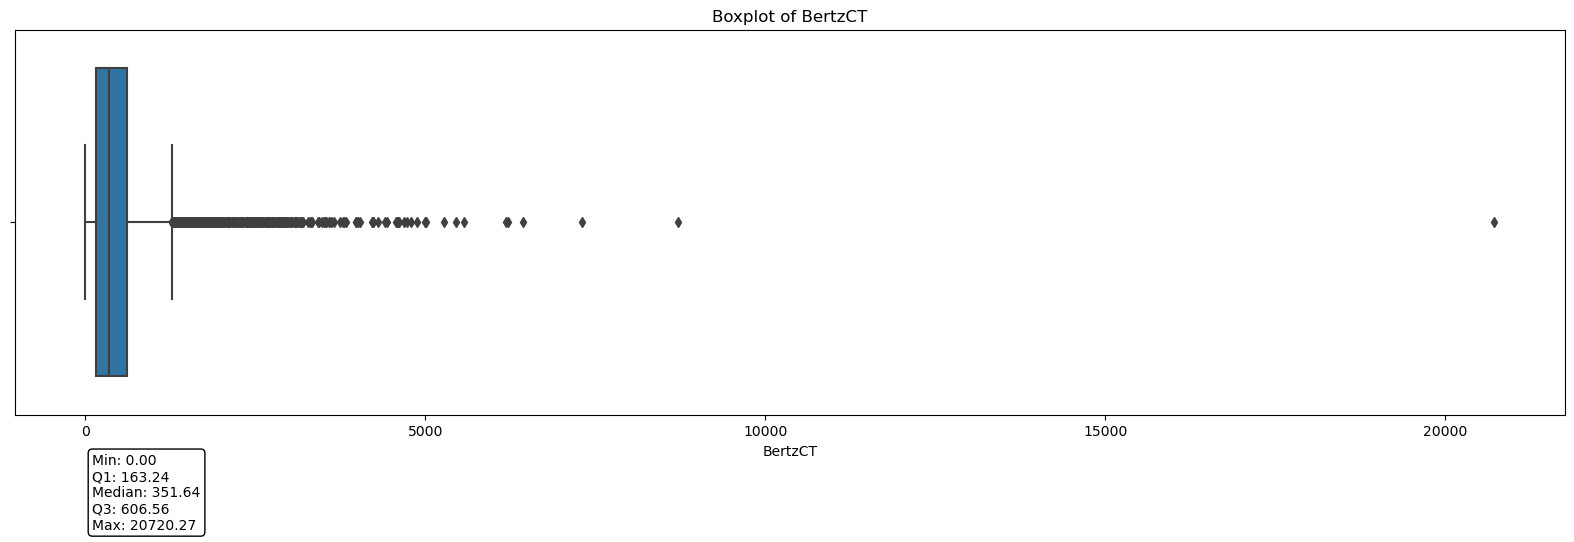

In [9]:
# To removes outliers from a specified column in a DataFrame using the Interquartile Range (IQR) method
def remove_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# To adds annotations to a boxplot, displaying key statistical values.
def annotate_boxplot(ax, data, col):
    min_val = data.min()
    q1 = data.quantile(0.25)
    median = data.median()
    q3 = data.quantile(0.75)
    max_val = data.max()
    
    textstr = f'Min: {min_val:.2f}\nQ1: {q1:.2f}\nMedian: {median:.2f}\nQ3: {q3:.2f}\nMax: {max_val:.2f}'
    props = dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='none')
    ax.text(0.05, -0.1, textstr, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=props)

numerical_cols = df.select_dtypes(include='number').columns

# To create and display annotated boxplots for each numerical column in a DataFrame.
for col in numerical_cols:
    plt.figure(figsize=(20, 5))
    ax = sns.boxplot(x=df[col])
    annotate_boxplot(ax, df[col], col)
    plt.title(f'Boxplot of {col}')
    plt.show()

The EDA analysis of the data can provide a great understanding of the distribution and variability of a compound's physical and chemical properties within the dataset. The data shows a wide range of characteristics, including molecular weight, solubility, molecular refractivity, partition coefficient, heavy atoms, heteroatoms, rotatable bonds, valence electrons, aromatic rings, saturated rings, aliphatic rings, total ring count, topological polar surface area, approximate surface area values, molecular connectivity index, and molecular complexity. The median solubility of -2.43 is covered by the interquartile range of -3.94 to -1.15, with numerous outliers. When it comes to compounds, there are almost never any noteworthy exceptions. For the examination of data distribution, box plots are employed.


Box Plots
The box plots provide a detailed summary of the data's distribution, highlighting the median, quartiles, and potential outliers. The median solubility is -2.43, with an interquartile range (IQR) from -3.94 to -1.15. Several outliers are observed on the negative side. The median standard deviation is zero, with most values clustering around zero and a few outliers. Most compounds occur once, with no significant outliers.
The median molecular weight is 209.23, with an IQR from 152.24 to 276.29. Several high outliers are present. The median MolLogP is 1.86, with an IQR from 0.71 to 3.11. Both high and low outliers are observed. The median molecular refractivity is 53.85, with an IQR from 38.89 to 71.95, and high outliers are noted. The median number of heavy atoms is 14, with an IQR from 10 to 18, and a few high outliers. The median number of hydrogen bond acceptors is three, with an IQR from one to four, and some high outliers. The median number of hydrogen bond donors is one, with an IQR from zero to two, and outliers extending to four donors. The median number of heteroatoms is four, with an IQR from two to six, with no significant outliers.
The median number of rotatable bonds is two, with an IQR from one to four, and high outliers up to 13 bonds. The median number of valence electrons is 76, with an IQR from 54 to 98, and some high outliers. The median number of aromatic rings is one, with an IQR from zero to two, and outliers extending up to four rings. Most values for saturated and aliphatic rings are zero, with some compounds having up to two rings. The median ring count is one, with an IQR from zero to two, and high outliers. The median TPSA is 46.53, with an IQR from 23.79 to 72.91, and outliers extending to high values. The median LabuteASA is 85.26, with an IQR from 63.14 to 112.52, and high outliers. The median BalabanJ is 2.65, with an IQR from 2.22 to 3.07, and outliers extending to higher values. The median BertzCT is 311.43, with an IQR from `145.58 to 533.85, and high outliers.


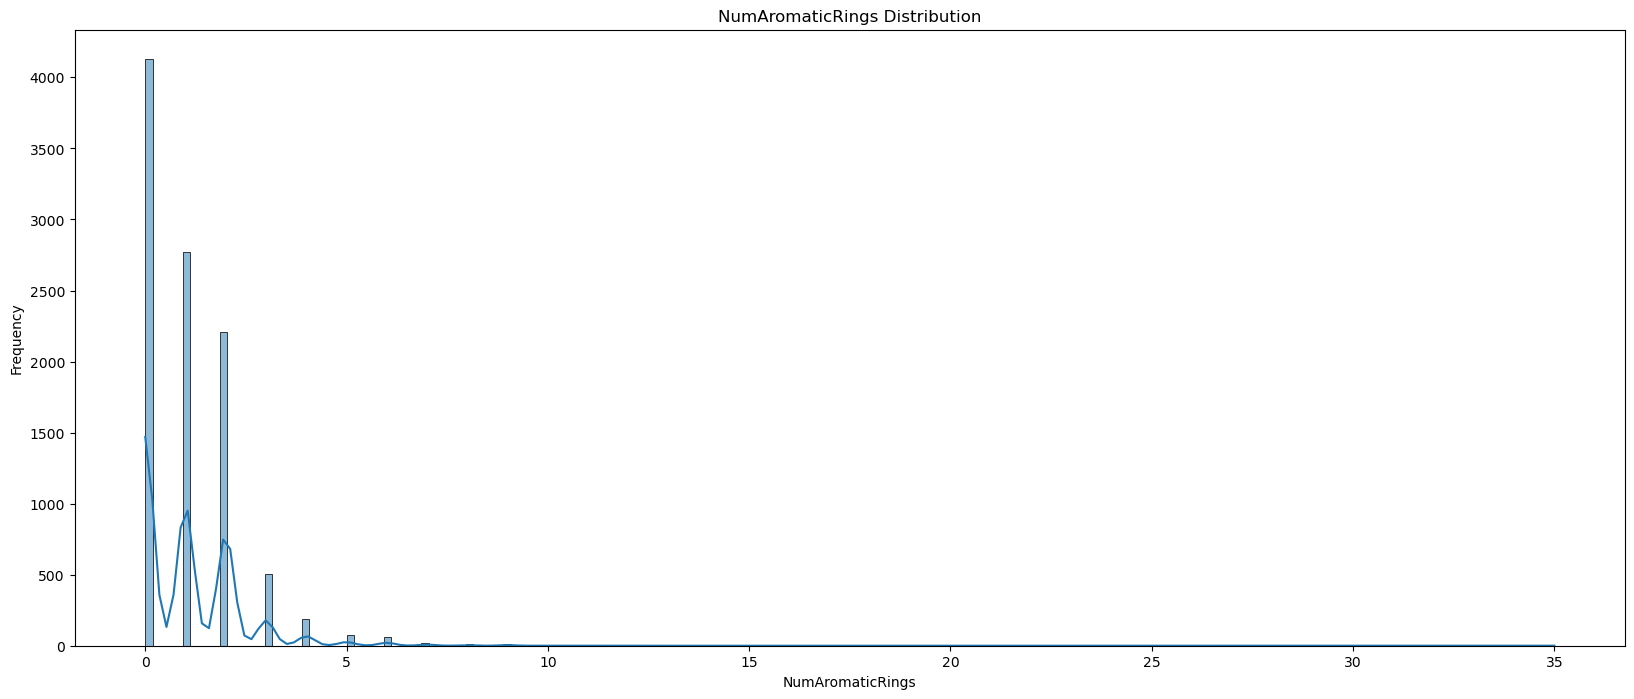

In [10]:
# To create and display a histogram with a kernel density estimate (KDE) overlay for the NumAromaticRings column in a DataFrame.
plt.figure(figsize = (20,8))
sns.histplot(df['NumAromaticRings'], kde=True)
plt.title('NumAromaticRings Distribution')
plt.ylabel("Frequency")
plt.show()

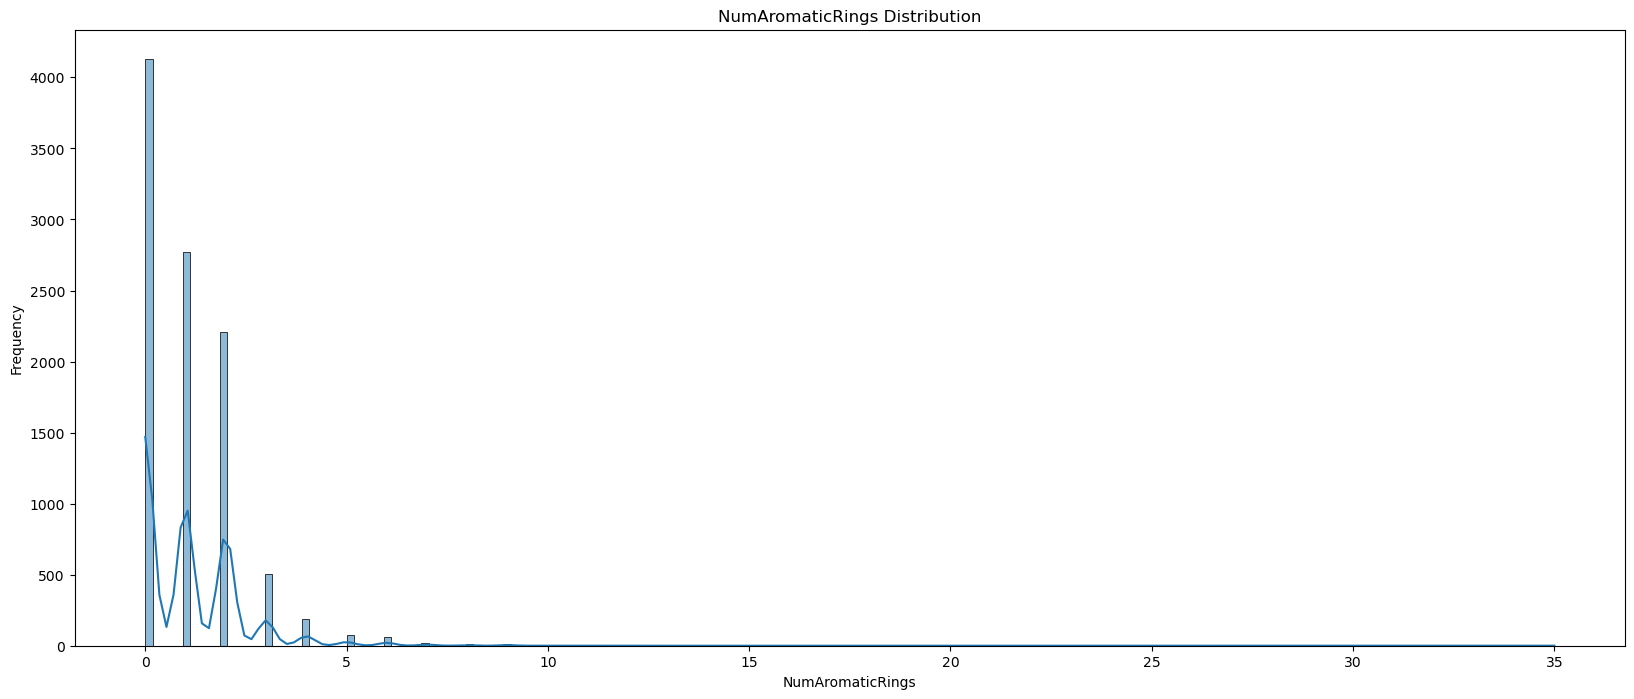

In [11]:
# To create and display a histogram with a kernel density estimate (KDE) overlay for the NumAromaticRings column in a DataFrame.
plt.figure(figsize = (20,8))
sns.histplot(df['NumAromaticRings'], kde=True)
plt.title('NumAromaticRings Distribution')
plt.ylabel("Frequency")
plt.show()

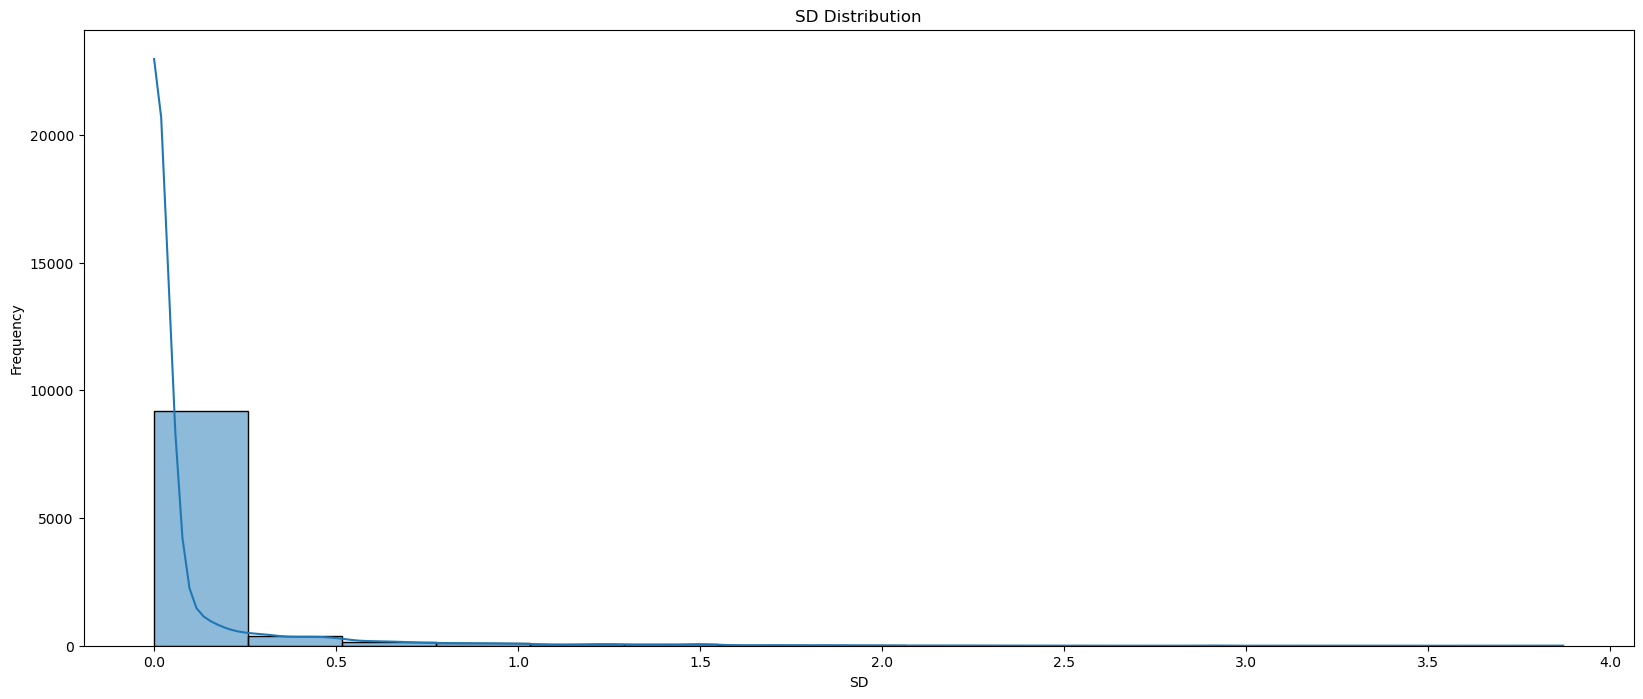

In [12]:
# To create and display a histogram with a kernel density estimate (KDE) overlay for the SD column in the dataset/frame
plt.figure(figsize = (20,8))
sns.histplot(df['SD'], kde=True)
plt.title('SD Distribution')
plt.ylabel("Frequency")
plt.show()

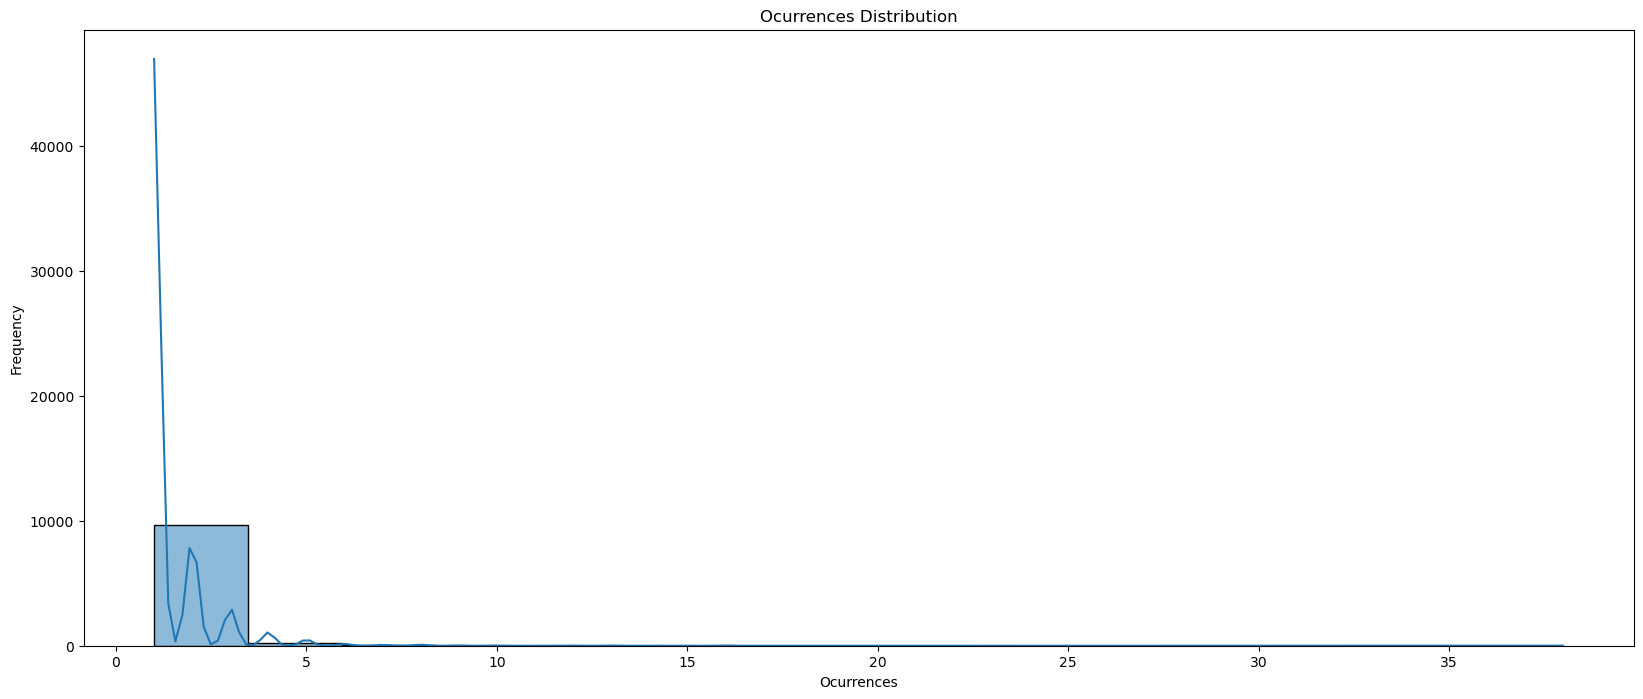

In [13]:
# To create a histogram of the ‘Occurrences’ column from a DataFrame.
plt.figure(figsize = (20,8))
sns.histplot(df['Ocurrences'], kde=True)
plt.title('Ocurrences Distribution')
plt.ylabel("Frequency")
plt.show()

In [14]:
df.query('Ocurrences > 6')

ID                                               Name  \
30      A-45                                      hydroxylamine   
87     A-142          1-methyl-4-(prop-1-en-2-yl)cyclohex-1-ene   
151    A-254                                calcium dihydroxide   
226    A-382                                      triethylamine   
238    A-400                              Hydrocarbons, C5-rich   
292    A-491                      benzene-1,2-dicarboxylic acid   
459    A-808            5-methyl-2-(propan-2-yl)cyclohexan-1-ol   
534    A-954                             1,2,4-trichlorobenzene   
665   A-1156                                     ethenylbenzene   
751   A-1308                                       butylbenzene   
814   A-1414                              oxostibanyl stibinate   
835   A-1450               calcium bis(12-hydroxyoctadecanoate)   
918   A-1579                 2,3-dihydro-1,2-benzothiazol-3-one   
967   A-1679                              1,3-diphenylguanidine   
1180  A-2032  2,6-dibromo-4-[2-(3,5-dibromo-4-hydroxyphenyl)...   
1241  A-2147                                    tetradecan-1-ol   
1300  A-2257    1,2-bis(2-ethylhexyl) benzene-1,2-dicarboxylate   
1368  A-2377            4,7,7-trimethylbicyclo[3.1.1]hept-3-ene   
1857  A-3047                                1,2-dichlorobenzene   
1983  A-3266                                     sodium formate   
1985  A-3273                                    acid D,L-aspart   
2017  A-3330                          iron(3+) chloride sulfate   
2018  A-3331                           iron(3+) ion trichloride   
2019  A-3333                            iron(+2) cation sulfate   
2089  A-3446              (2R,3R)-2,3-dihydroxybutanedioic acid   
2091  A-3448                       potassium hydrogen tartarate   
2733  A-4559  3-bromo-1-(3-chloropyridin-2-yl)-1H-pyrazole-5...   
2887  A-4830                                      chlorobenzene   
3002  A-5028  methyl 2-[(4-ethoxy-6-methylamino-1,3,5-triazi...   
3387  A-5577                                      dioxotungsten   
3393  A-5587                                    cobalt sulphide   
3394  A-5589                                  methane; vanadium   
3427  A-5674                           Aluminum;phosphenic acid   
3431  A-5680                                        cobaltoylol   
3433  A-5686                                             cobalt   
3451  A-5731                                 cobalt(2+) oxalate   
3499  A-5838                                Cobaltous carbonate   
3508  A-5852                         Cobaltous 2-ethylhexanoate   
3523  A-5888                                          oxocobalt   
3755   B-162                                            methane   
4230   B-900                          potassium sodium tartrate   
9808   G-776                                            Lindane   

                                                  InChI  \
30                           InChI=1S/H3NO/c1-2/h2H,1H2   
87    InChI=1S/C10H16/c1-8(2)10-6-4-9(3)5-7-10/h4,10...   
151                  InChI=1S/Ca.2H2O/h;2*1H2/q+2;;/p-2   
226         InChI=1S/C6H15N/c1-4-7(5-2)6-3/h4-6H2,1-3H3   
238              InChI=1S/C5H12/c1-3-5-4-2/h3-5H2,1-2H3   
292   InChI=1S/C8H6O4/c9-7(10)5-3-1-2-4-6(5)8(11)12/...   
459   InChI=1S/C10H20O/c1-7(2)9-5-4-8(3)6-10(9)11/h7...   
534         InChI=1S/C6H3Cl3/c7-4-1-2-5(8)6(9)3-4/h1-3H   
665          InChI=1S/C8H8/c1-2-8-6-4-3-5-7-8/h2-7H,1H2   
751   InChI=1S/C10H14/c1-3-9(2)10-7-5-4-6-8-10/h4-9H...   
814                          InChI=1S/3O.2Sb/q3*-2;2*+3   
835   InChI=1S/2C18H36O3.Ca/c2*1-2-3-4-11-14-17(19)1...   
918   InChI=1S/C7H5NOS/c9-7-5-3-1-2-4-6(5)10-8-7/h1-...   
967   InChI=1S/C13H13N3/c14-13(15-11-7-3-1-4-8-11)16...   
1180  InChI=1S/C15H12Br4O2/c1-15(2,7-3-9(16)13(20)10...   
1241  InChI=1S/C14H30O/c1-2-3-4-5-6-7-8-9-10-11-12-1...   
1300  InChI=1S/C24H38O4/c1-5-9-13-19(7-3)17-27-23(25...   
1368  InChI=1S/C10H16/c1-7-4-5-8-6-9(7)10(8,2)3/h4,8...   
1857   

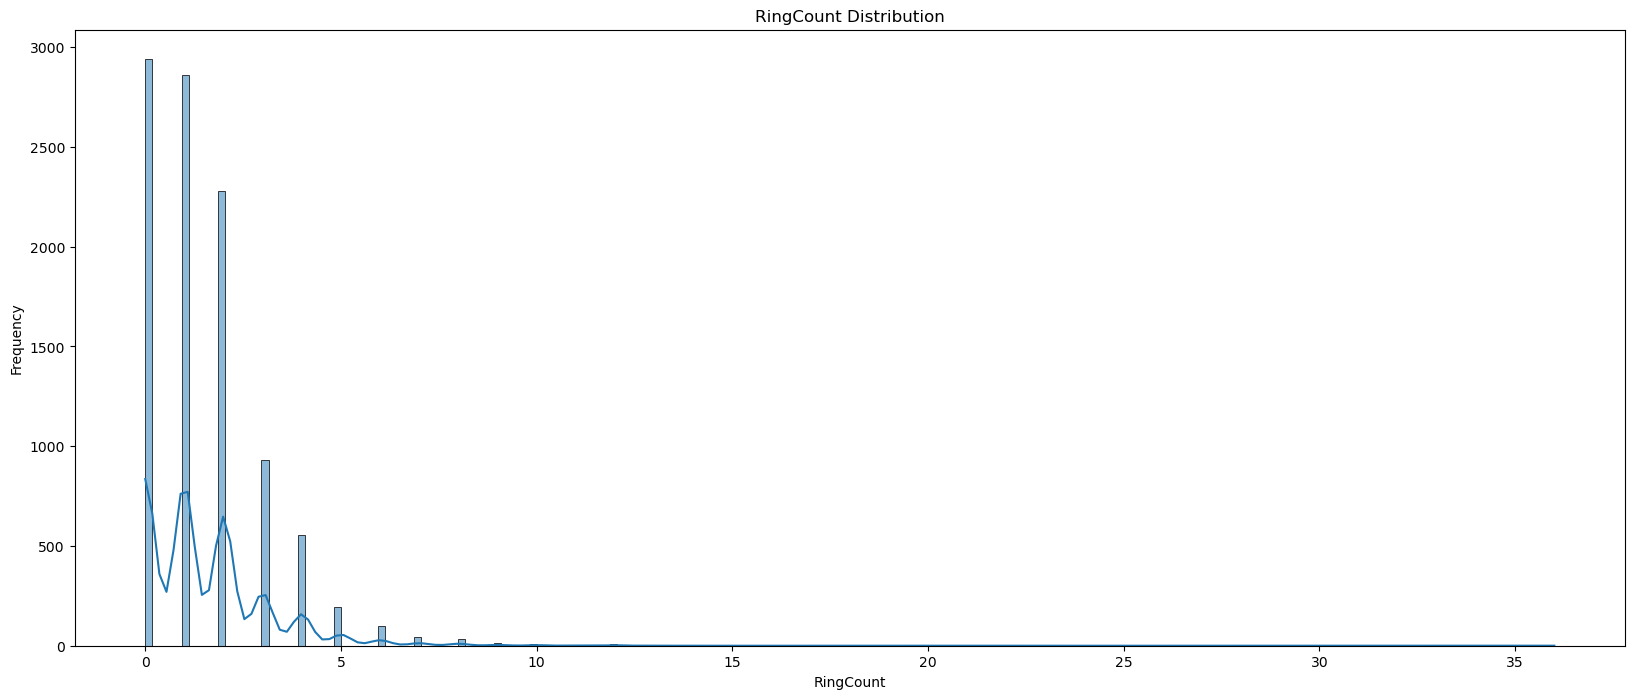

In [15]:
# To create a histogram of the ‘RingCount’ column from a DataFrame.
plt.figure(figsize = (20,8))
sns.histplot(df['RingCount'], kde=True)
plt.title('RingCount Distribution')
plt.ylabel("Frequency")
plt.show()

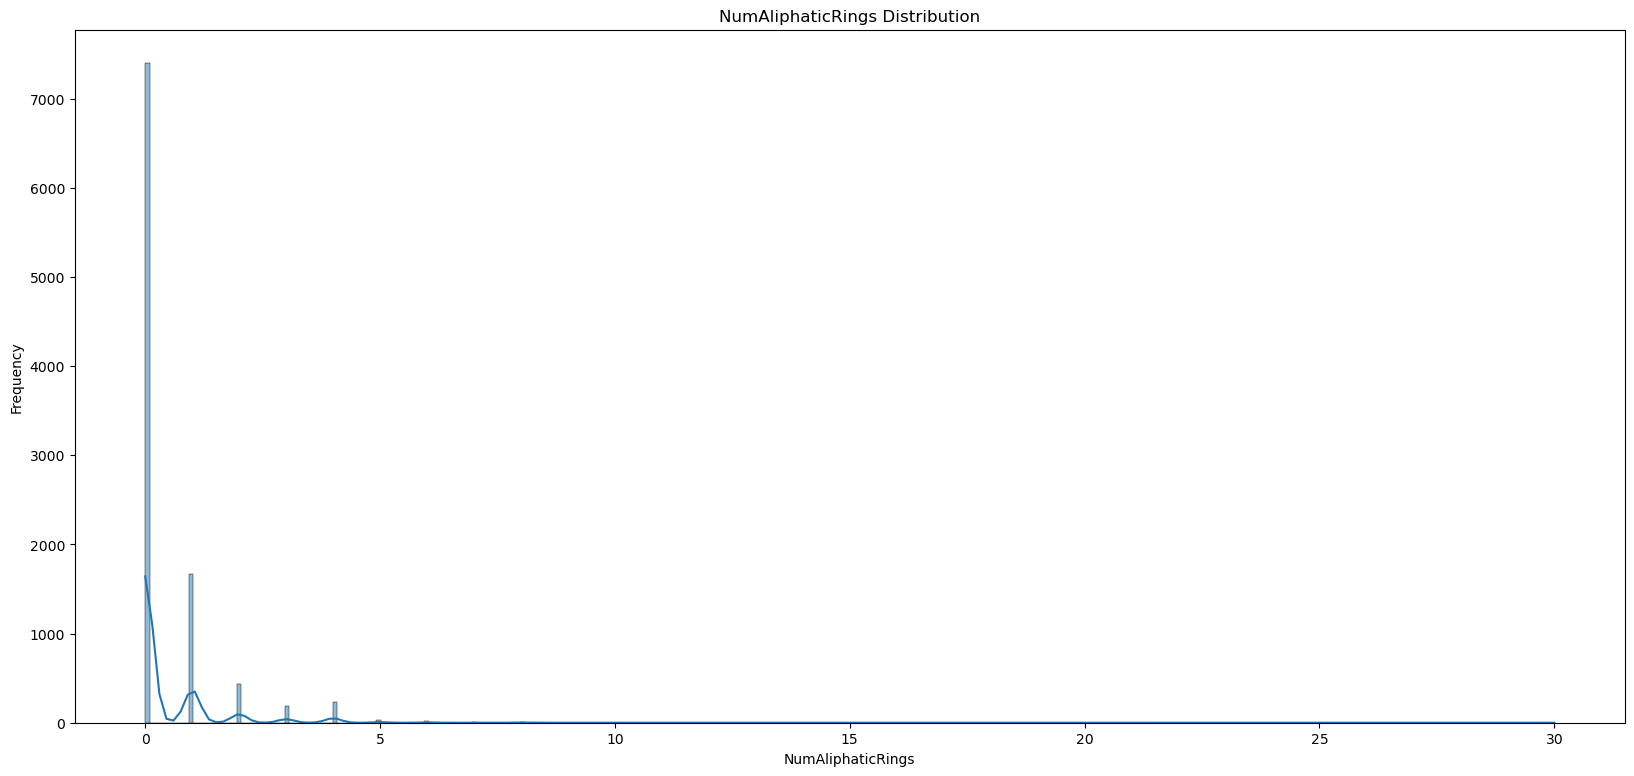

In [16]:
# To create a histogram of the ‘NumAliphaticRings’ column from a DataFrame
plt.figure(figsize = (20,9))
sns.histplot(df['NumAliphaticRings'], kde=True)
plt.title('NumAliphaticRings Distribution')
plt.ylabel("Frequency")
plt.show()

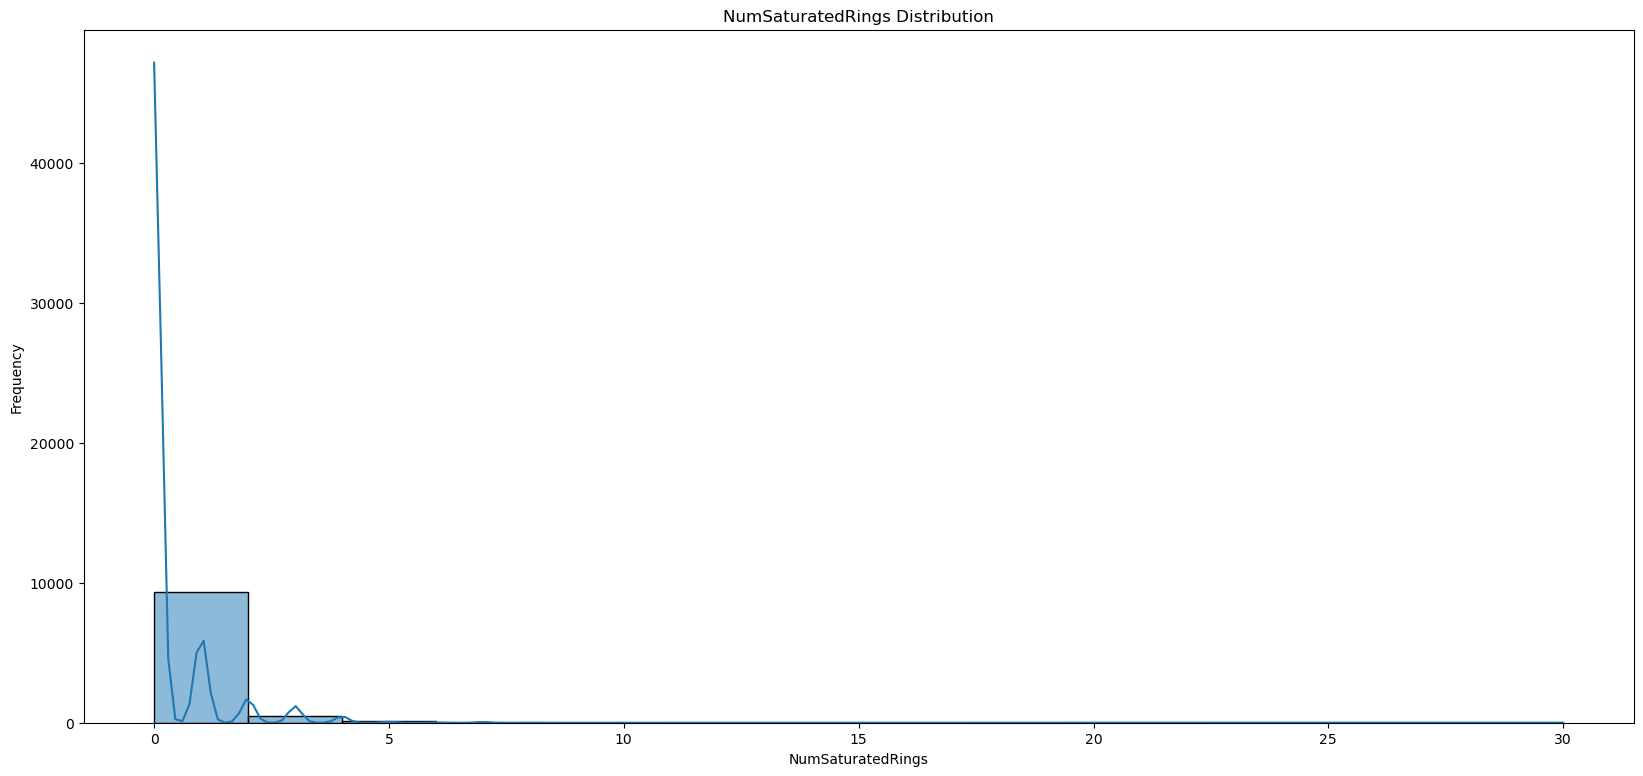

In [17]:
# To create a histogram of the NumSaturatedRings column from a DataFrame
plt.figure(figsize = (20,9))
sns.histplot(df['NumSaturatedRings'], kde=True)
plt.title('NumSaturatedRings Distribution')
plt.ylabel("Frequency")
plt.show()

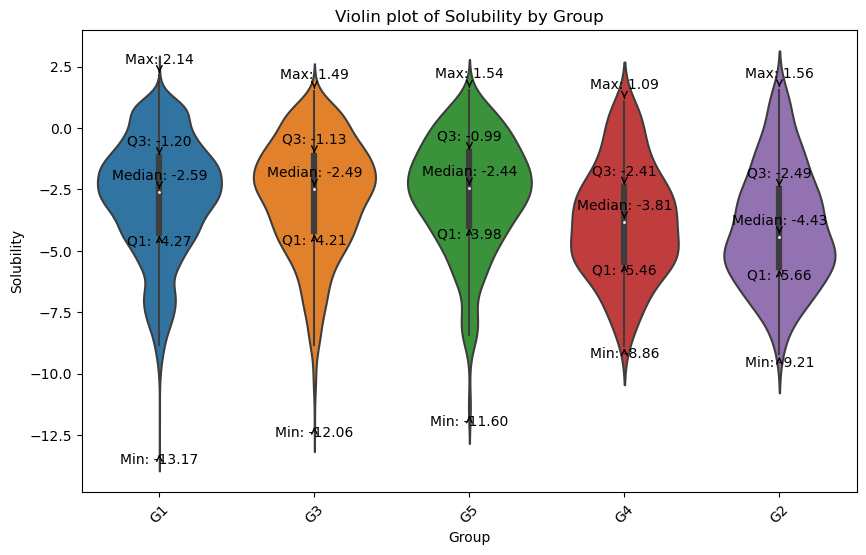

In [18]:
# To create a violin plot of the Solubility variable grouped by the Group variable from a DataFrame.
plt.figure(figsize=(10, 6))
ax = sns.violinplot(x='Group', y='Solubility', data=df)
plt.title('Violin plot of Solubility by Group')
plt.xlabel('Group')
plt.ylabel('Solubility')
plt.xticks(rotation=45)

# To Calculate and annotate median, quartiles, min, and max
groups = df['Group'].unique()
for group in groups:
    data = df[df['Group'] == group]['Solubility']
    median = data.median()
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    min_val = data.min()
    max_val = data.max()
    
    pos = groups.tolist().index(group)
    ax.annotate(f'Min: {min_val:.2f}', xy=(pos, min_val), xytext=(pos, min_val - 0.5),
                arrowprops=dict(facecolor='orange', arrowstyle='->'), ha='center')
    ax.annotate(f'Q1: {q1:.2f}', xy=(pos, q1), xytext=(pos, q1 - 0.5),
                arrowprops=dict(facecolor='blue', arrowstyle='->'), ha='center')
    ax.annotate(f'Median: {median:.2f}', xy=(pos, median), xytext=(pos, median + 0.5),
                arrowprops=dict(facecolor='black', arrowstyle='->'), ha='center')
    ax.annotate(f'Q3: {q3:.2f}', xy=(pos, q3), xytext=(pos, q3 + 0.5),
                arrowprops=dict(facecolor='green', arrowstyle='->'), ha='center')
    ax.annotate(f'Max: {max_val:.2f}', xy=(pos, max_val), xytext=(pos, max_val + 0.5),
                arrowprops=dict(facecolor='red', arrowstyle='->'), ha='center')

plt.show()

The violin plot shows the distribution of solubility values across the following five groups: G1, G3, G5, G4, and G2. Group G1 has a high degree of central tendency and a substantial degree of variability, with values as low as -13.17. The distribution of group G3 is similar, with fewer extreme outliers. Group G5 appears to have less fluctuation and fewer severe outliers with a closer clustering around -2.44. Group G4 shows less variability with a lower median solubility value. Group G2 shows a general trend towards lower solubility with fewer extreme outliers, having the lowest median solubility value among the groups.

## `Bivariate Analysis`

By employing methods such as cross-tabulations, scatter plots, and correlation coefficients, bivariate analysis allows researchers to investigate the connection between two variables. Accuracy and efficiency of predictive modeling are improved by identifying substantial relationships between molecular weight and solubility. Environmental risk assessment and chemical compound design are aided by the insights this approach offers on the aspects that greatly affect solubility.

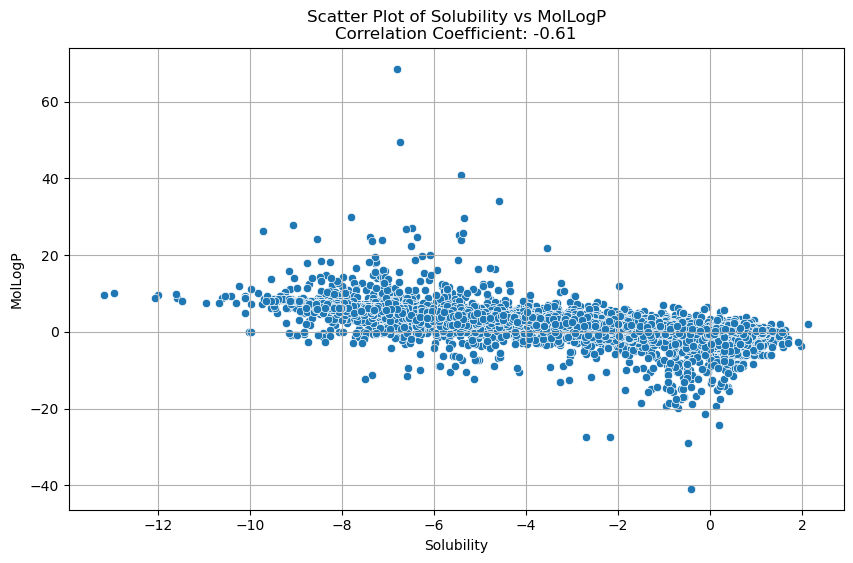

Scatter plot for Solubility vs MolLogP (Correlation Coefficient: -0.61)


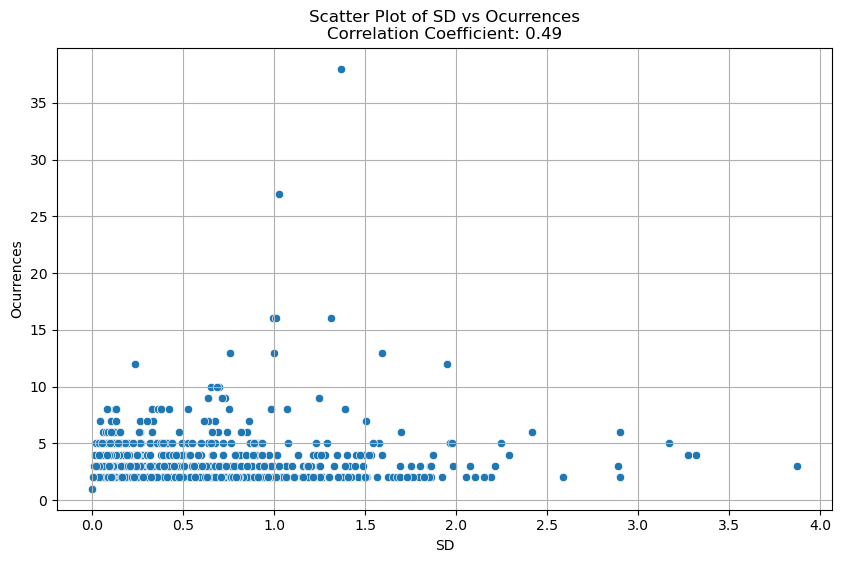

Scatter plot for SD vs Ocurrences (Correlation Coefficient: 0.49)


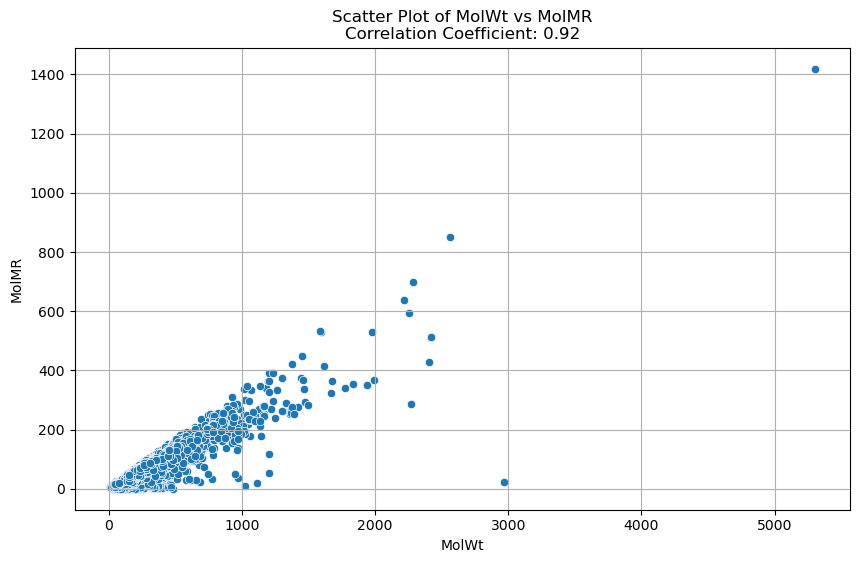

Scatter plot for MolWt vs MolMR (Correlation Coefficient: 0.92)


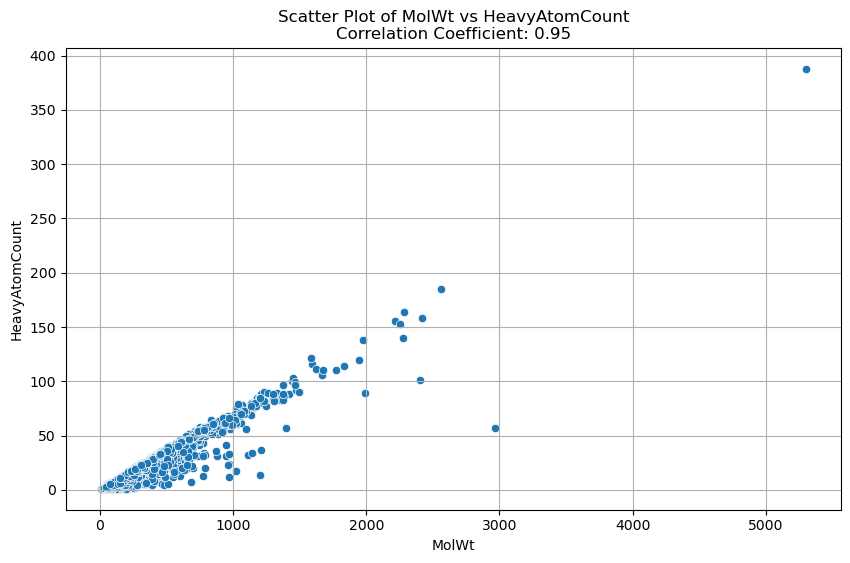

Scatter plot for MolWt vs HeavyAtomCount (Correlation Coefficient: 0.95)


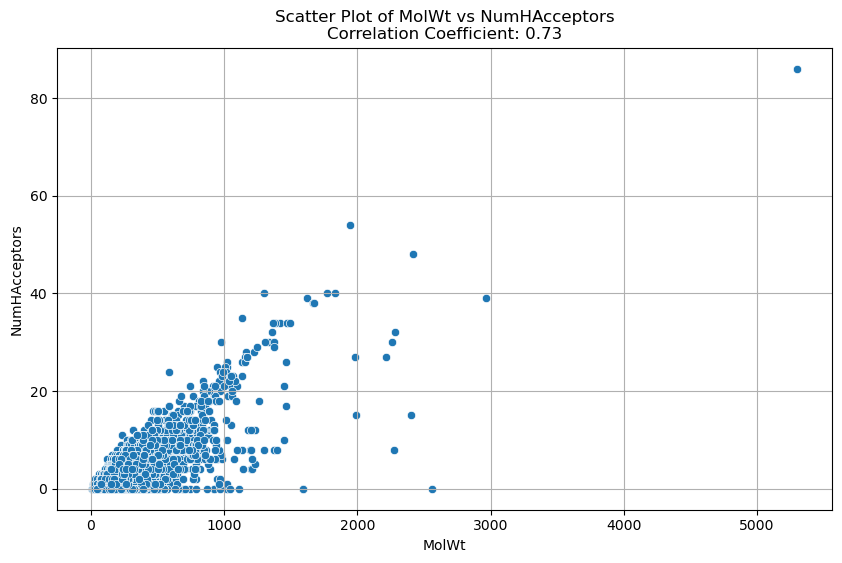

Scatter plot for MolWt vs NumHAcceptors (Correlation Coefficient: 0.73)


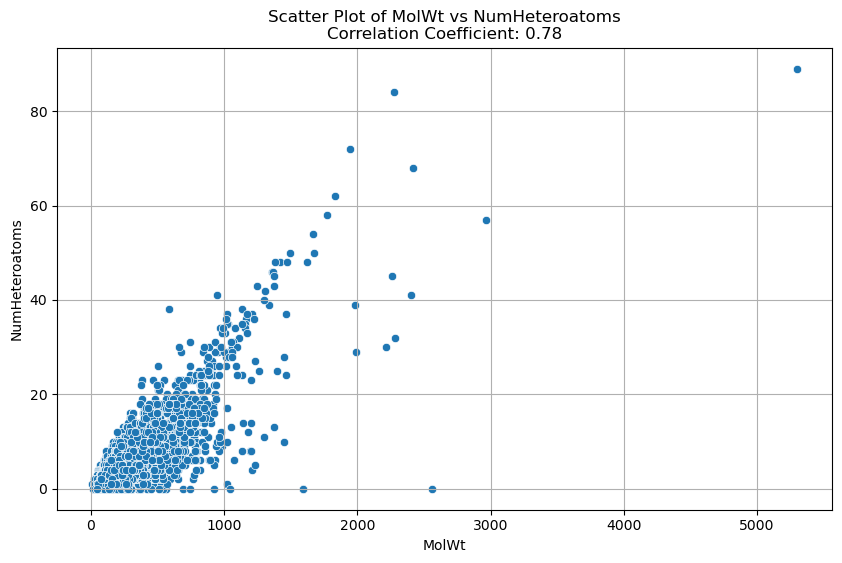

Scatter plot for MolWt vs NumHeteroatoms (Correlation Coefficient: 0.78)


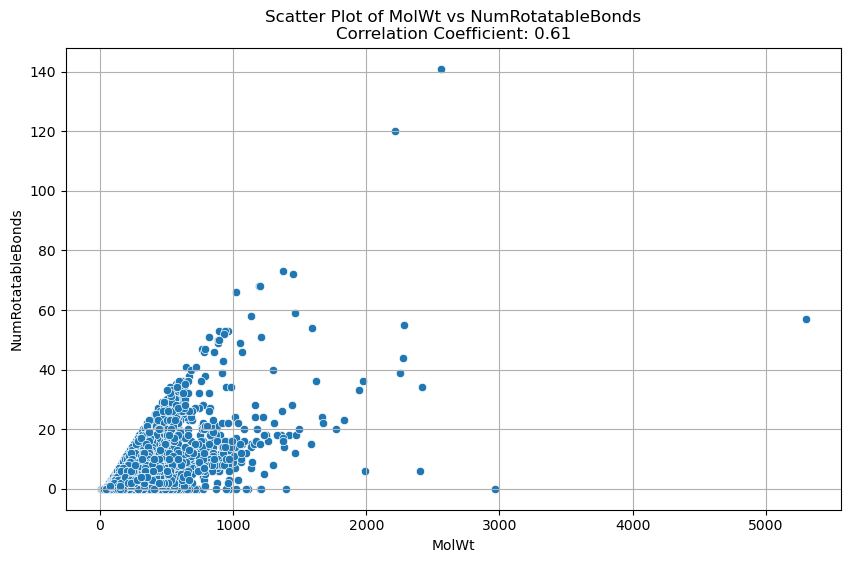

Scatter plot for MolWt vs NumRotatableBonds (Correlation Coefficient: 0.61)


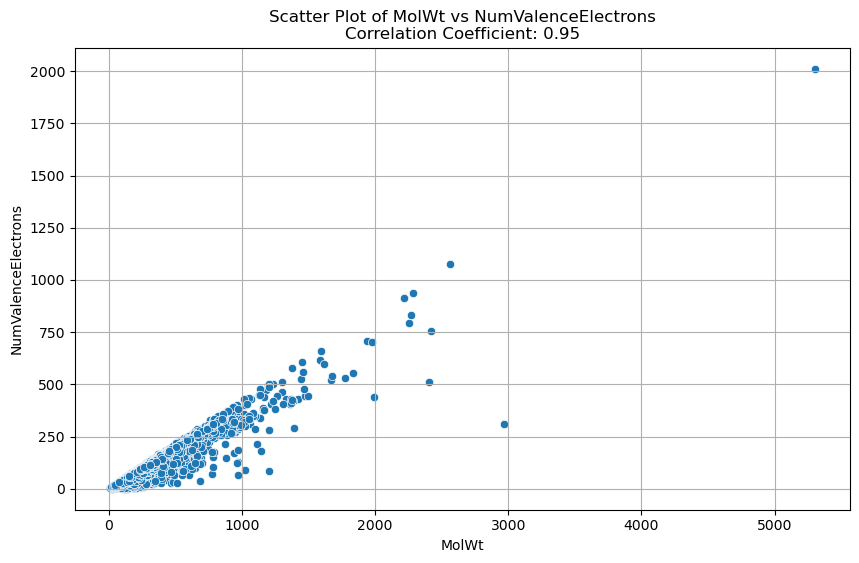

Scatter plot for MolWt vs NumValenceElectrons (Correlation Coefficient: 0.95)


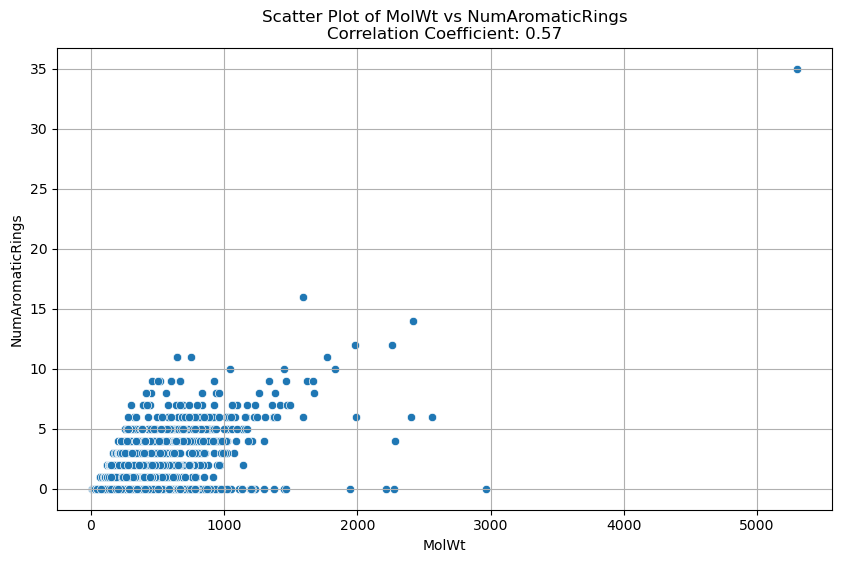

Scatter plot for MolWt vs NumAromaticRings (Correlation Coefficient: 0.57)


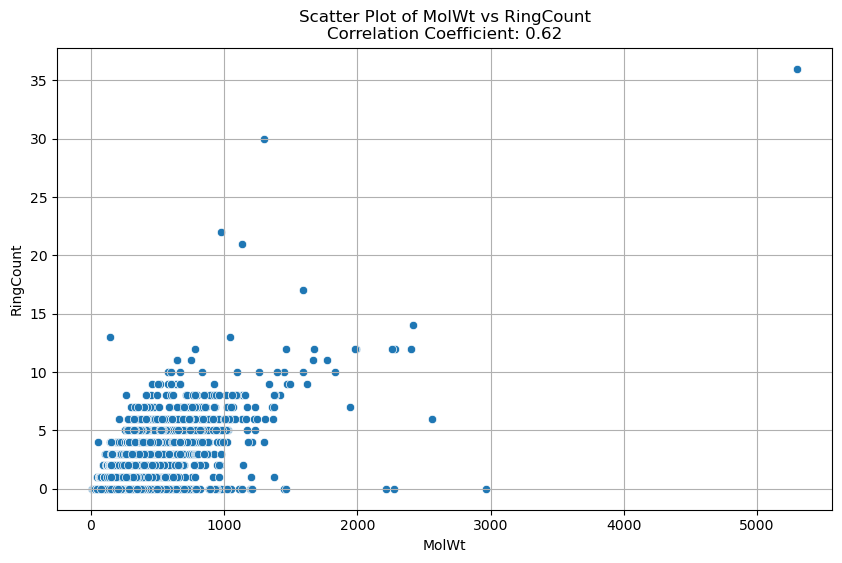

Scatter plot for MolWt vs RingCount (Correlation Coefficient: 0.62)


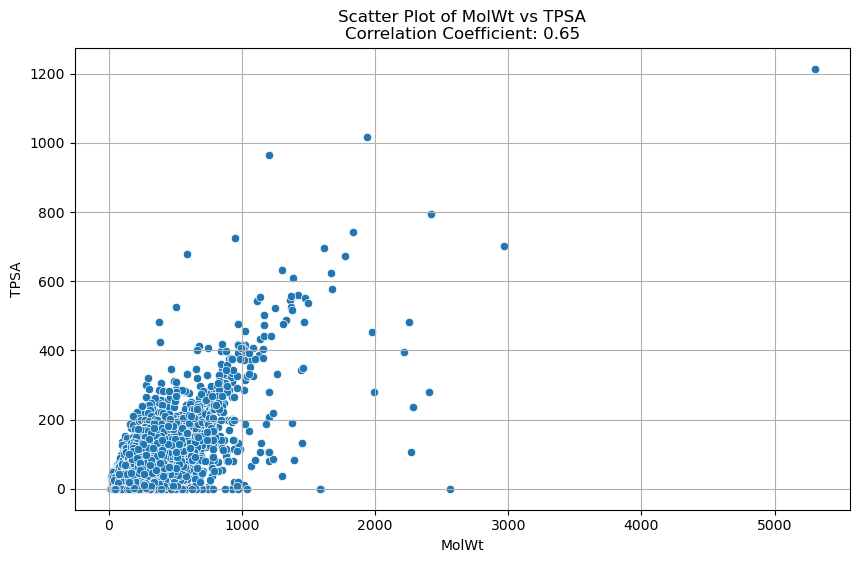

Scatter plot for MolWt vs TPSA (Correlation Coefficient: 0.65)


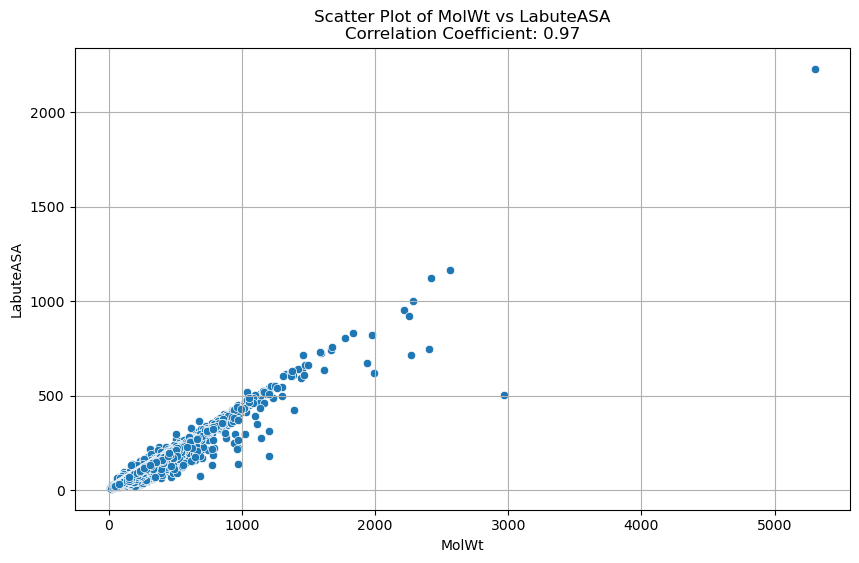

Scatter plot for MolWt vs LabuteASA (Correlation Coefficient: 0.97)


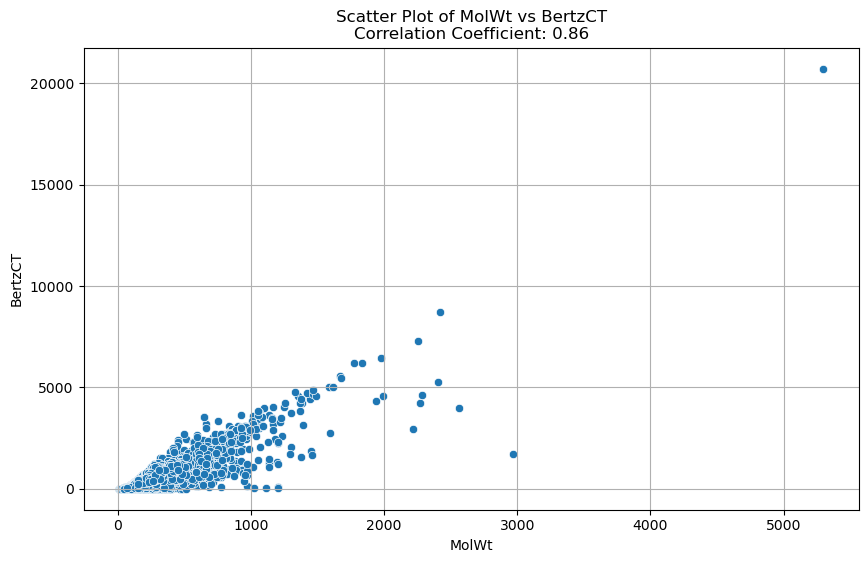

Scatter plot for MolWt vs BertzCT (Correlation Coefficient: 0.86)


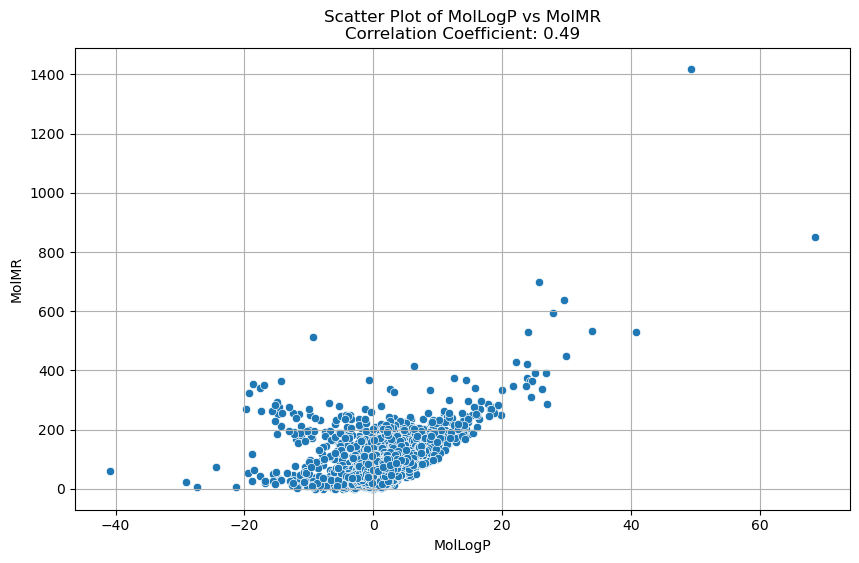

Scatter plot for MolLogP vs MolMR (Correlation Coefficient: 0.49)


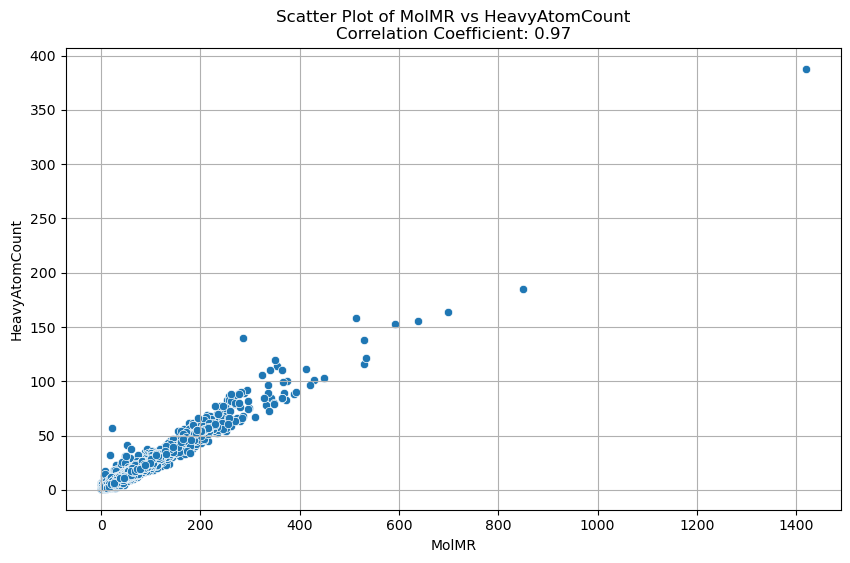

Scatter plot for MolMR vs HeavyAtomCount (Correlation Coefficient: 0.97)


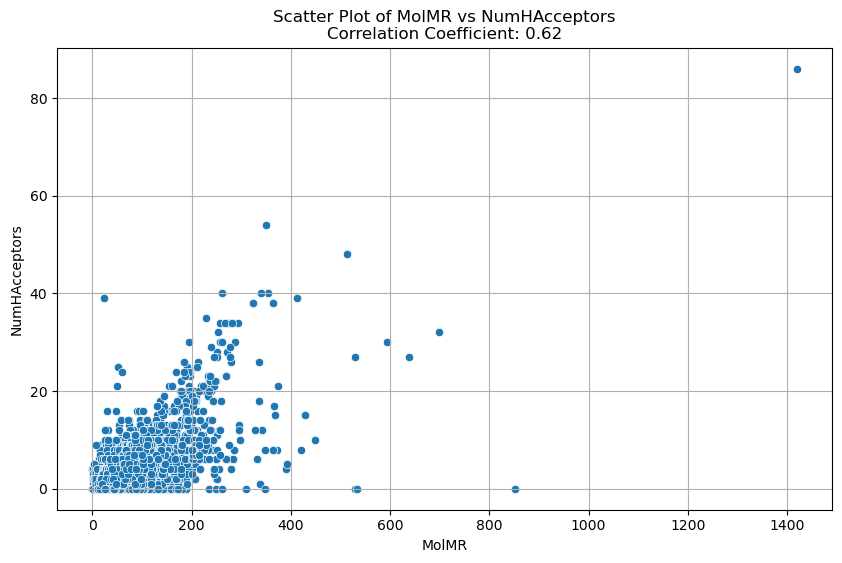

Scatter plot for MolMR vs NumHAcceptors (Correlation Coefficient: 0.62)


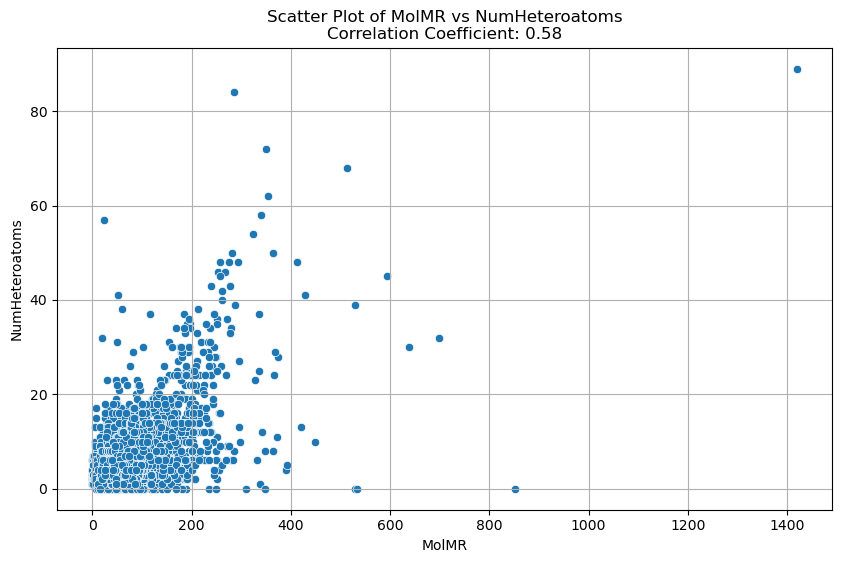

Scatter plot for MolMR vs NumHeteroatoms (Correlation Coefficient: 0.58)


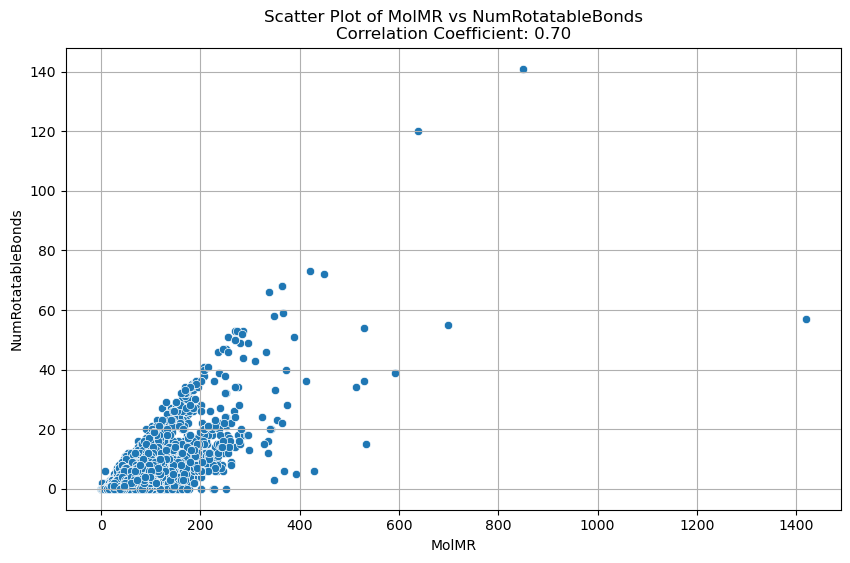

Scatter plot for MolMR vs NumRotatableBonds (Correlation Coefficient: 0.70)


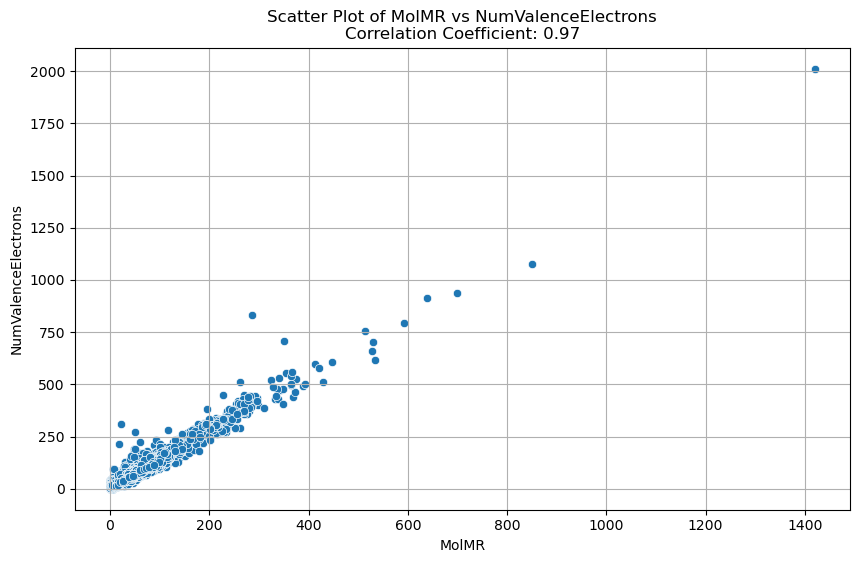

Scatter plot for MolMR vs NumValenceElectrons (Correlation Coefficient: 0.97)


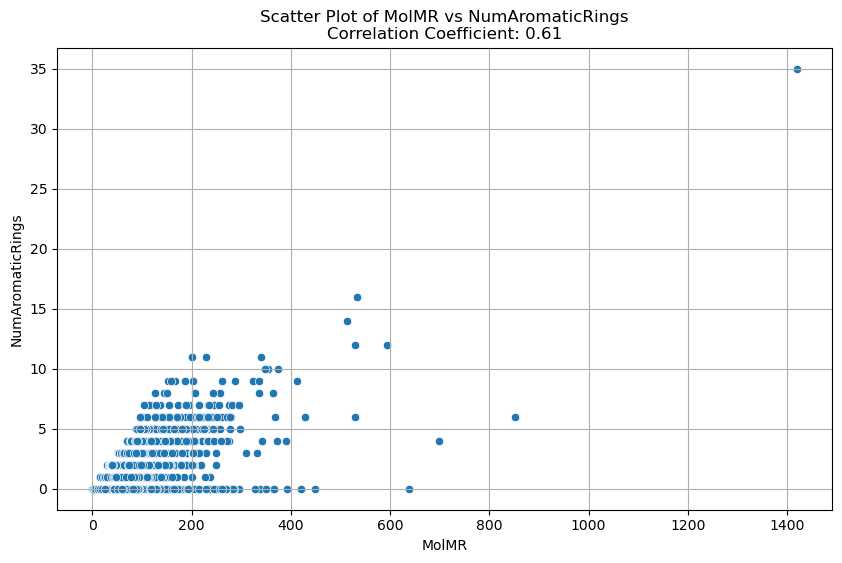

Scatter plot for MolMR vs NumAromaticRings (Correlation Coefficient: 0.61)


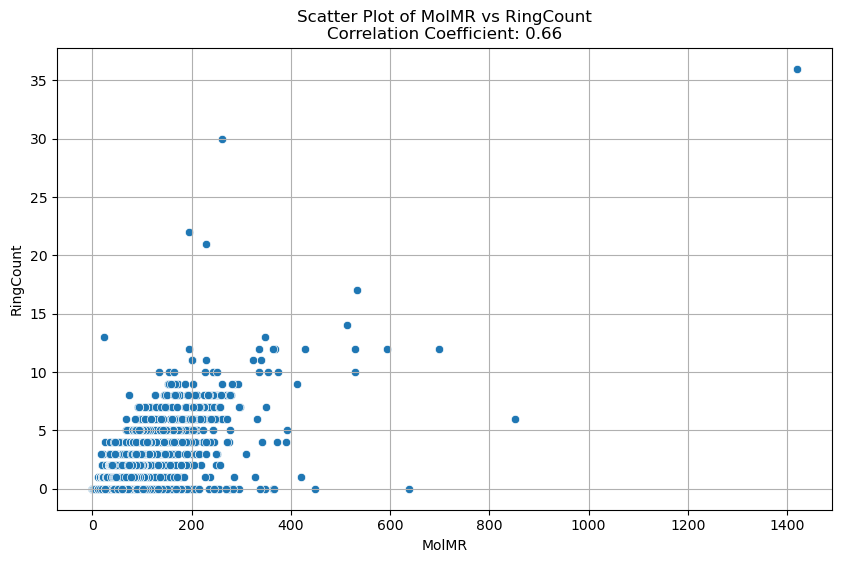

Scatter plot for MolMR vs RingCount (Correlation Coefficient: 0.66)


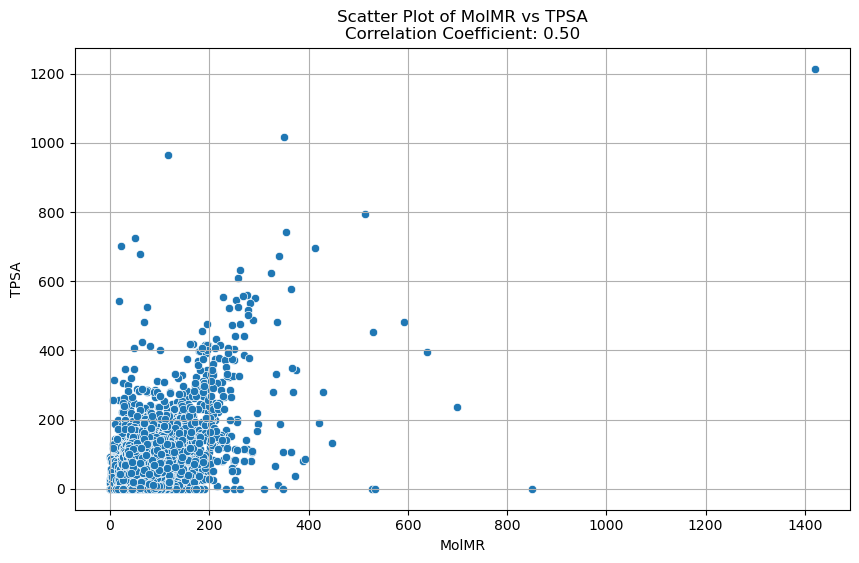

Scatter plot for MolMR vs TPSA (Correlation Coefficient: 0.50)


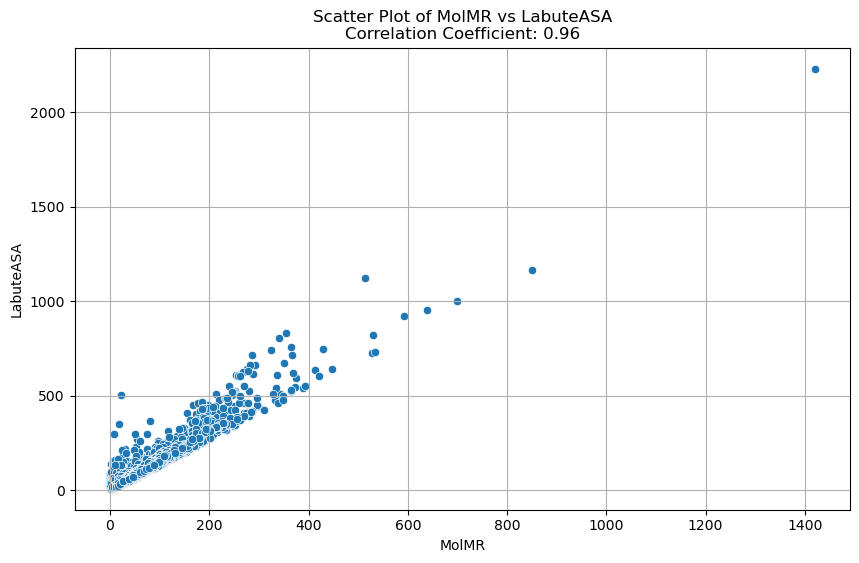

Scatter plot for MolMR vs LabuteASA (Correlation Coefficient: 0.96)


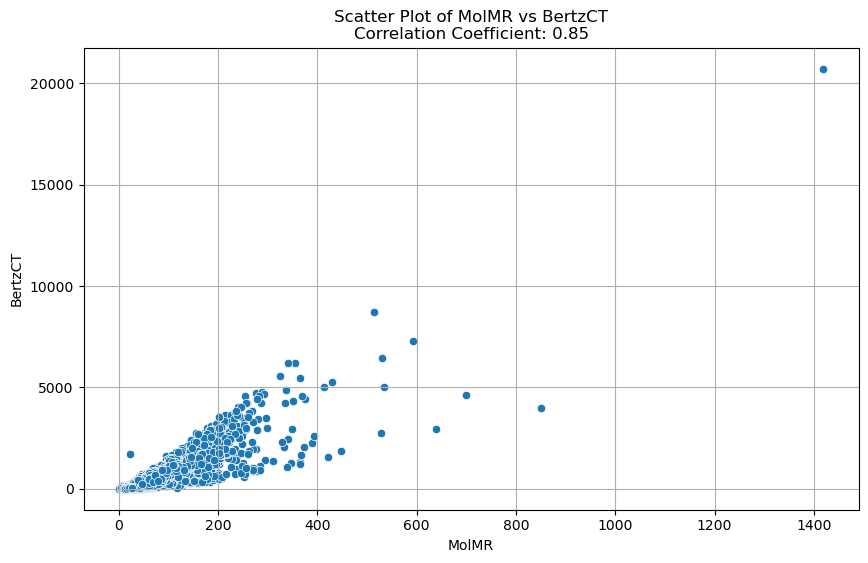

Scatter plot for MolMR vs BertzCT (Correlation Coefficient: 0.85)


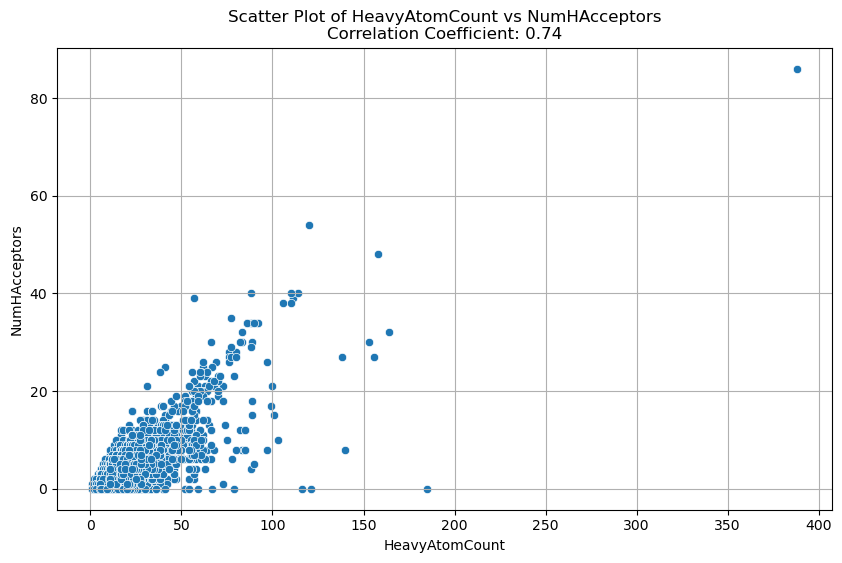

Scatter plot for HeavyAtomCount vs NumHAcceptors (Correlation Coefficient: 0.74)


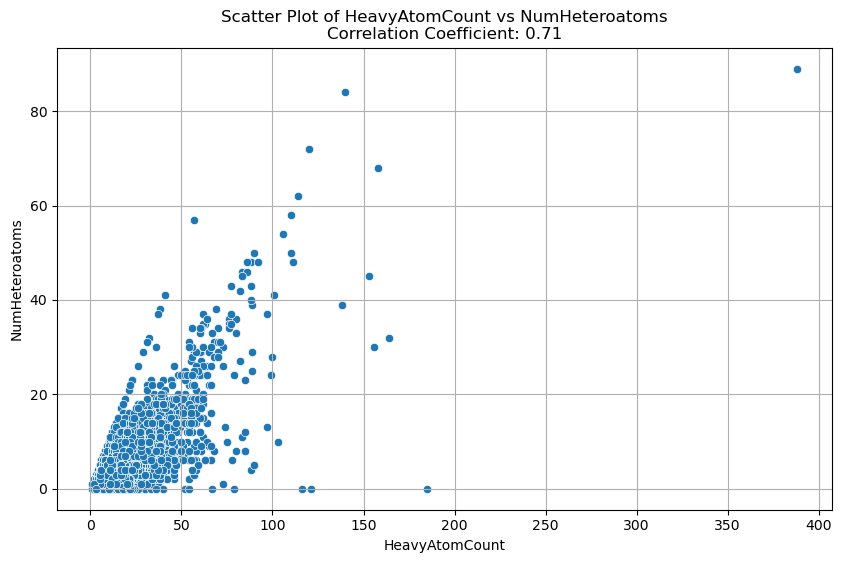

Scatter plot for HeavyAtomCount vs NumHeteroatoms (Correlation Coefficient: 0.71)


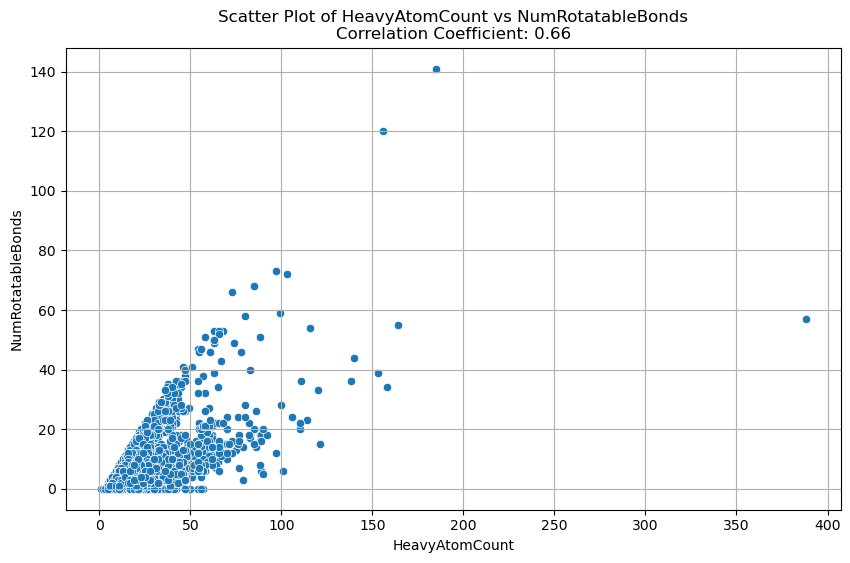

Scatter plot for HeavyAtomCount vs NumRotatableBonds (Correlation Coefficient: 0.66)


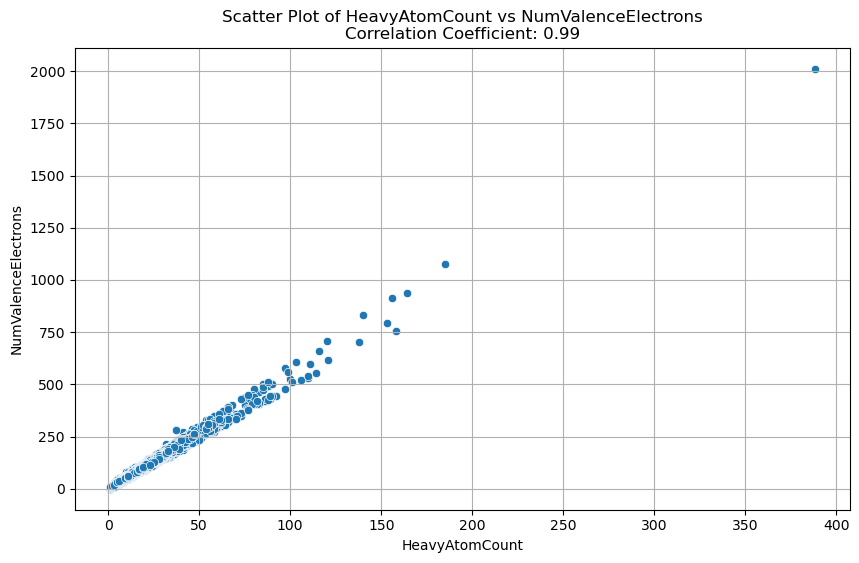

Scatter plot for HeavyAtomCount vs NumValenceElectrons (Correlation Coefficient: 0.99)


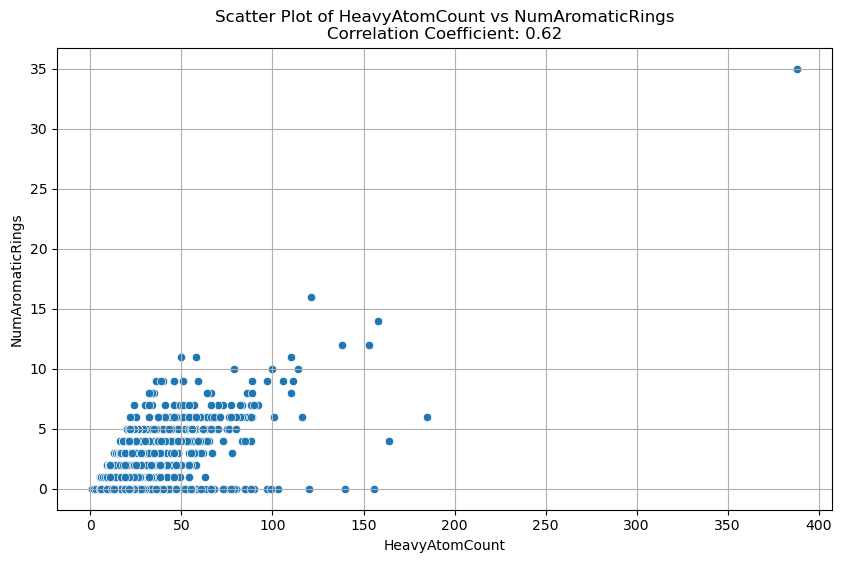

Scatter plot for HeavyAtomCount vs NumAromaticRings (Correlation Coefficient: 0.62)


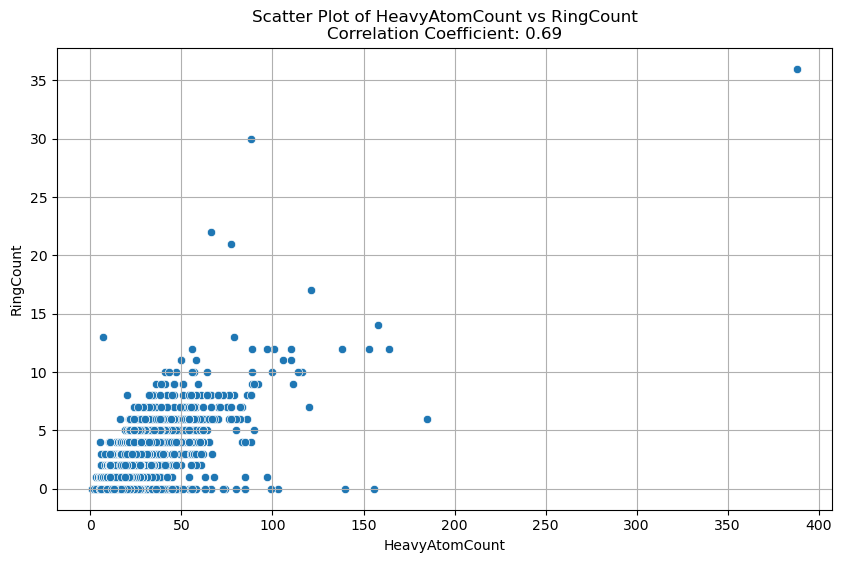

Scatter plot for HeavyAtomCount vs RingCount (Correlation Coefficient: 0.69)


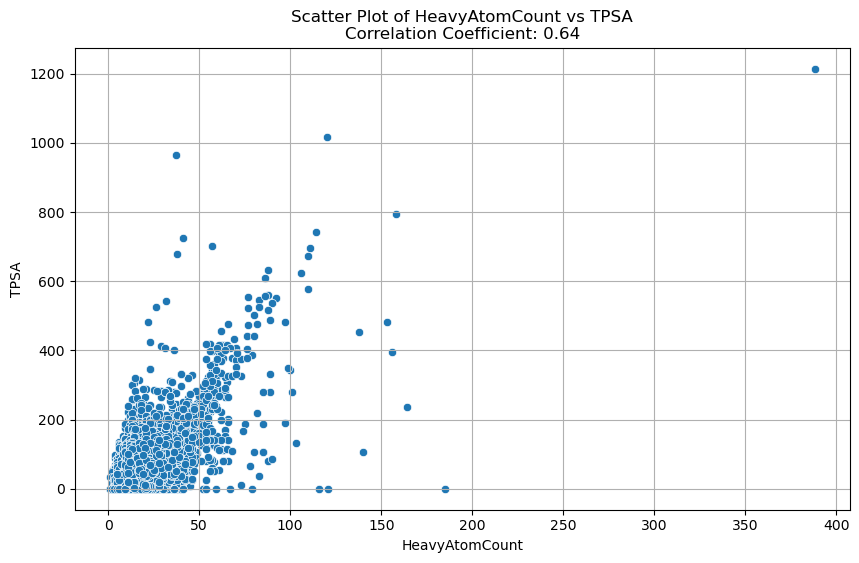

Scatter plot for HeavyAtomCount vs TPSA (Correlation Coefficient: 0.64)


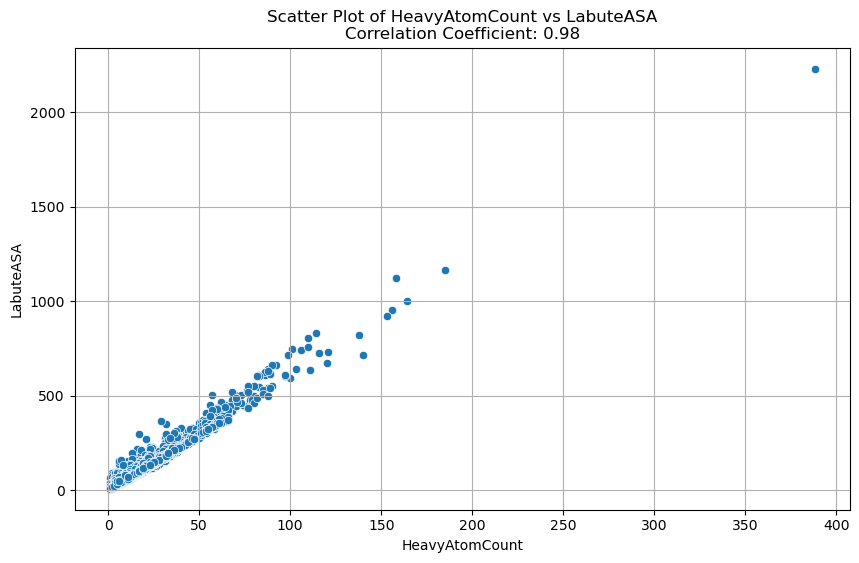

Scatter plot for HeavyAtomCount vs LabuteASA (Correlation Coefficient: 0.98)


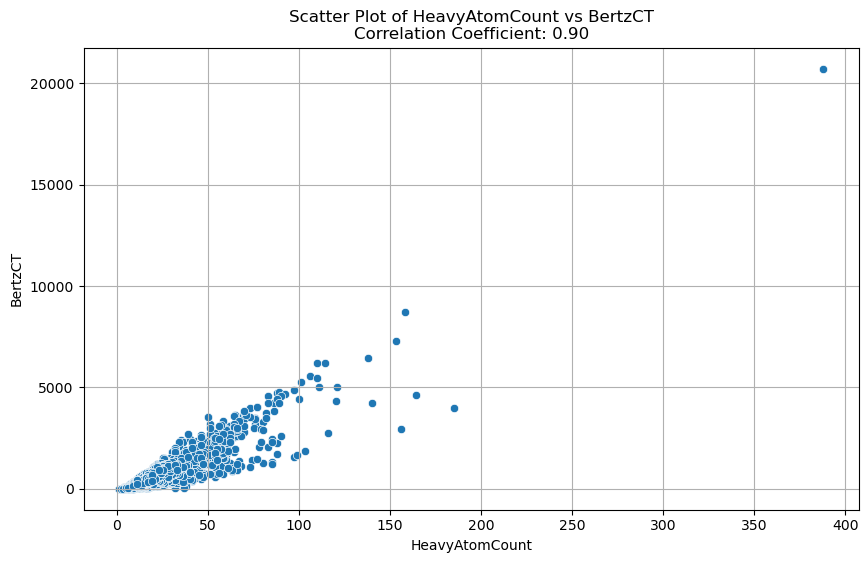

Scatter plot for HeavyAtomCount vs BertzCT (Correlation Coefficient: 0.90)


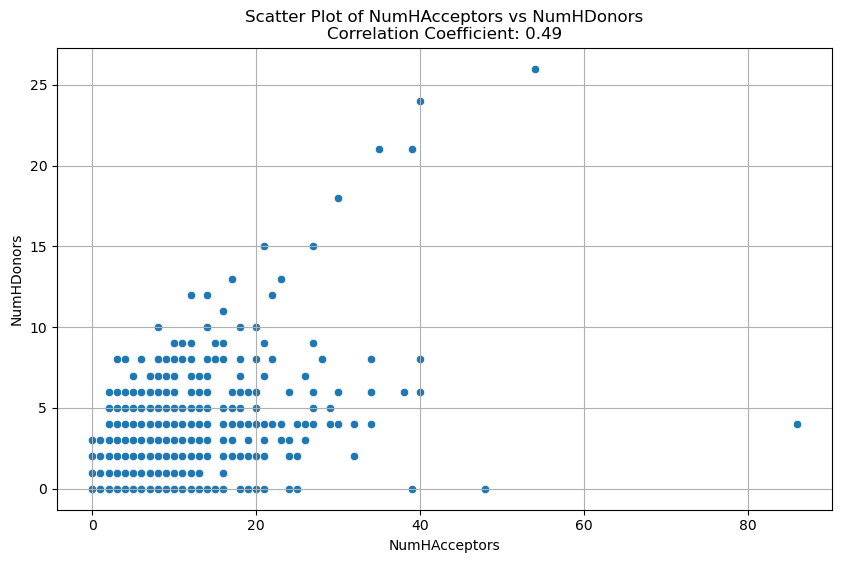

Scatter plot for NumHAcceptors vs NumHDonors (Correlation Coefficient: 0.49)


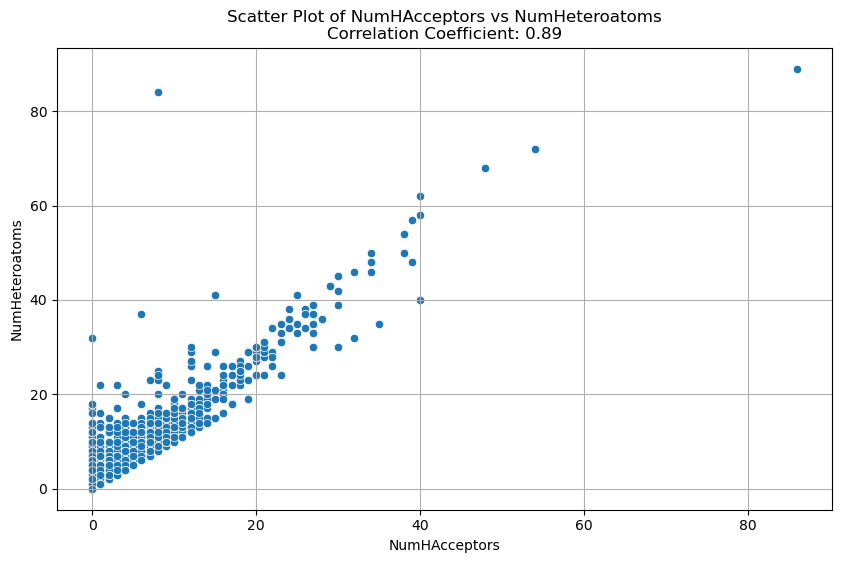

Scatter plot for NumHAcceptors vs NumHeteroatoms (Correlation Coefficient: 0.89)


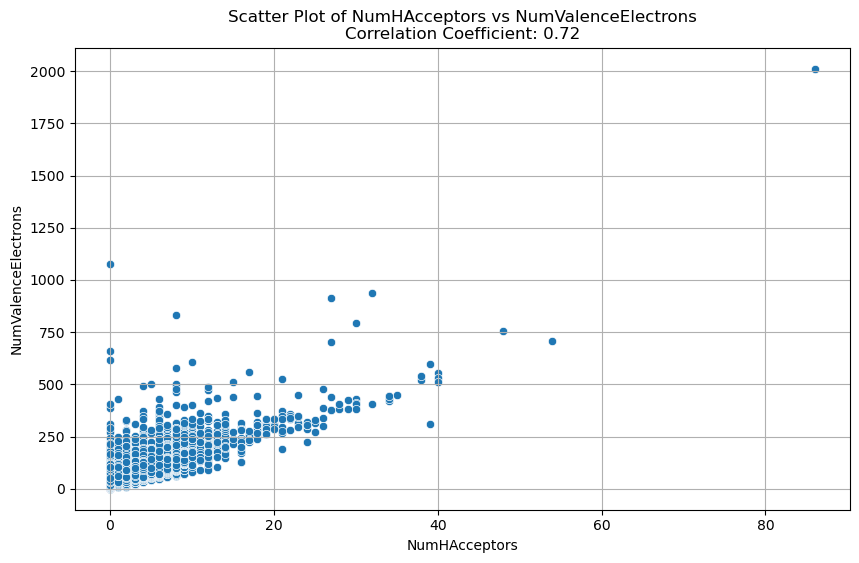

Scatter plot for NumHAcceptors vs NumValenceElectrons (Correlation Coefficient: 0.72)


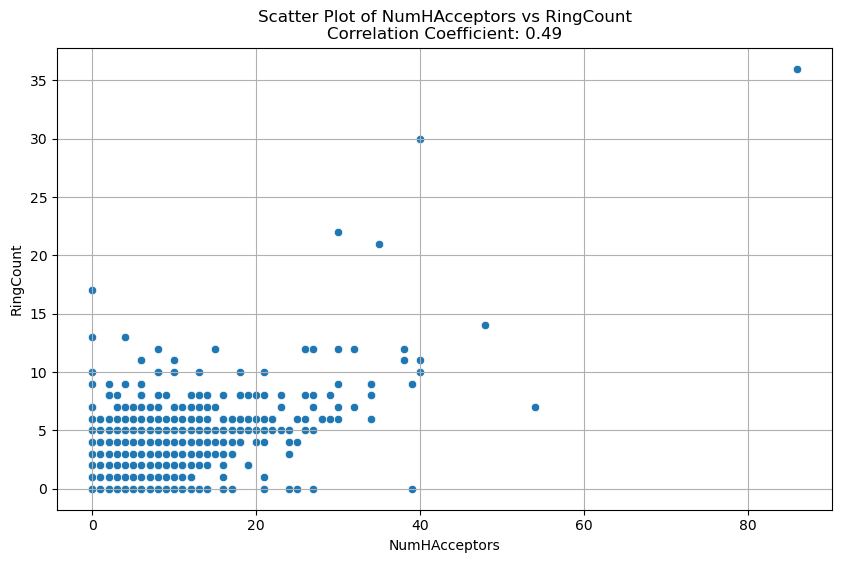

Scatter plot for NumHAcceptors vs RingCount (Correlation Coefficient: 0.49)


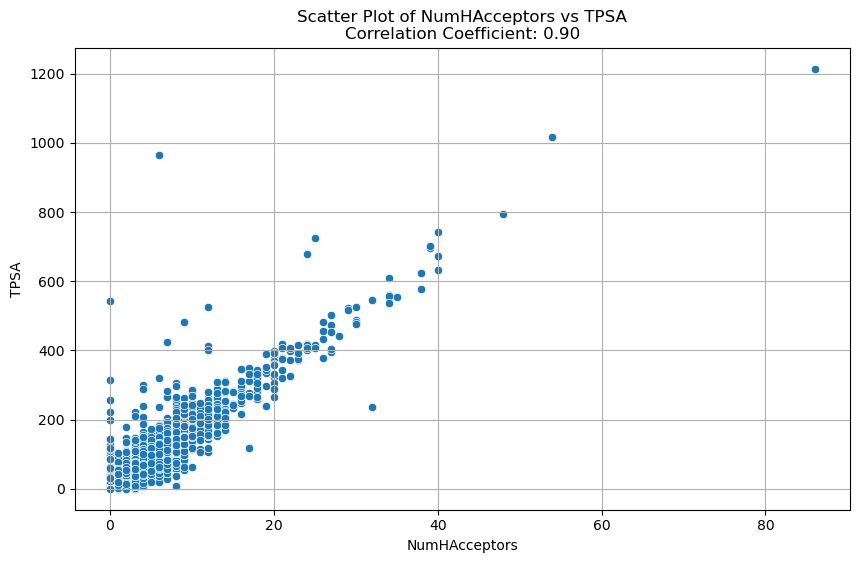

Scatter plot for NumHAcceptors vs TPSA (Correlation Coefficient: 0.90)


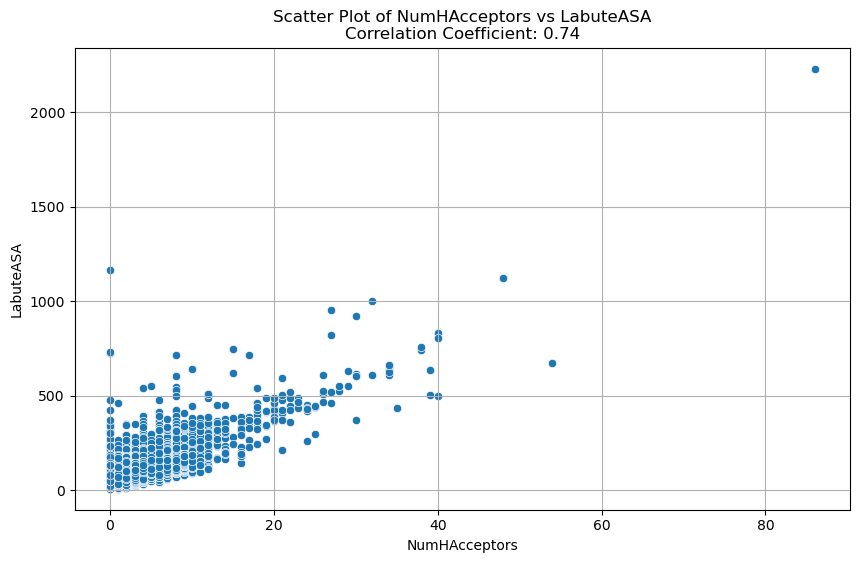

Scatter plot for NumHAcceptors vs LabuteASA (Correlation Coefficient: 0.74)


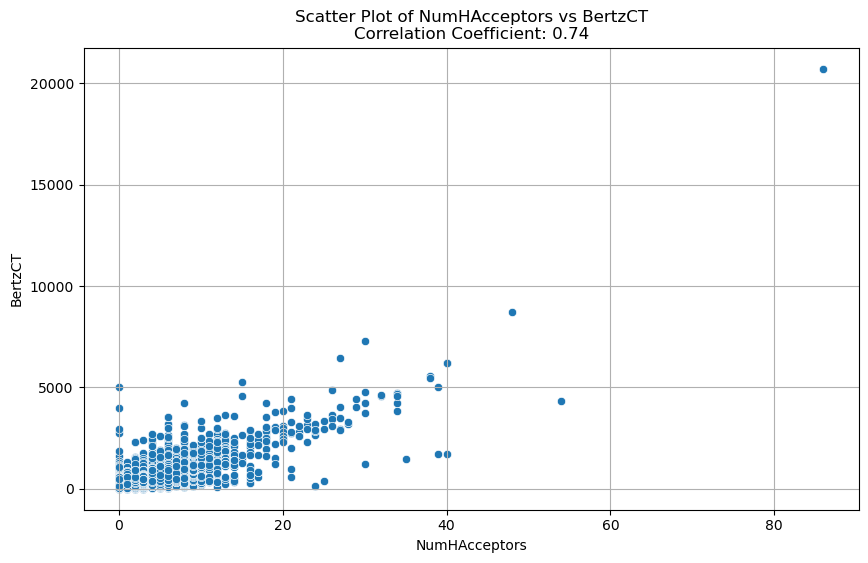

Scatter plot for NumHAcceptors vs BertzCT (Correlation Coefficient: 0.74)


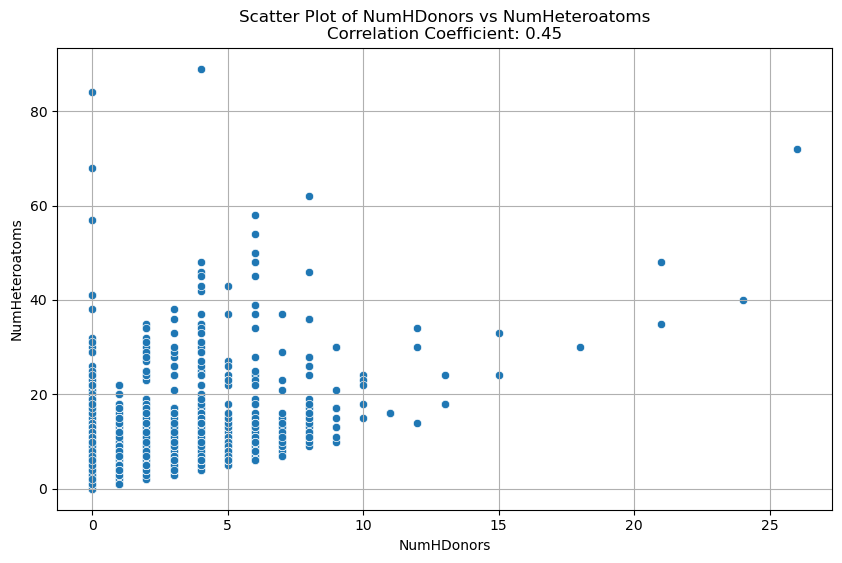

Scatter plot for NumHDonors vs NumHeteroatoms (Correlation Coefficient: 0.45)


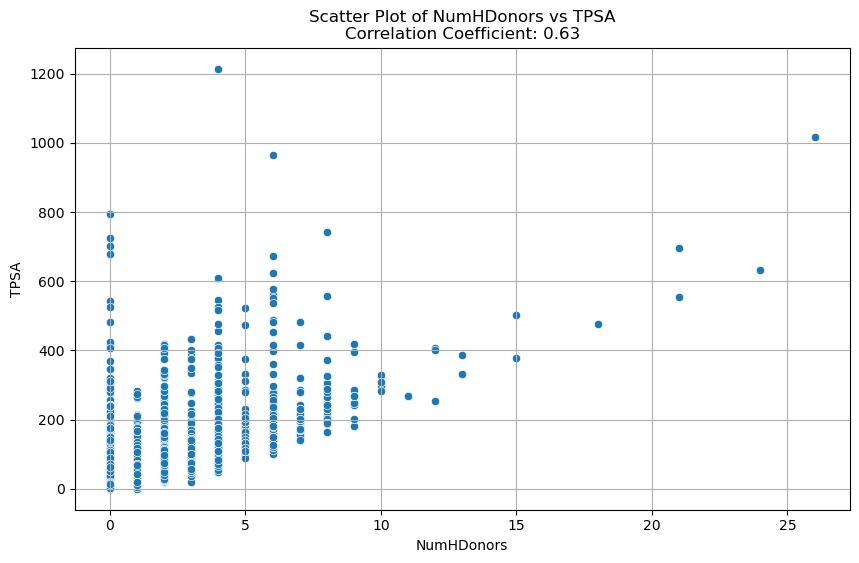

Scatter plot for NumHDonors vs TPSA (Correlation Coefficient: 0.63)


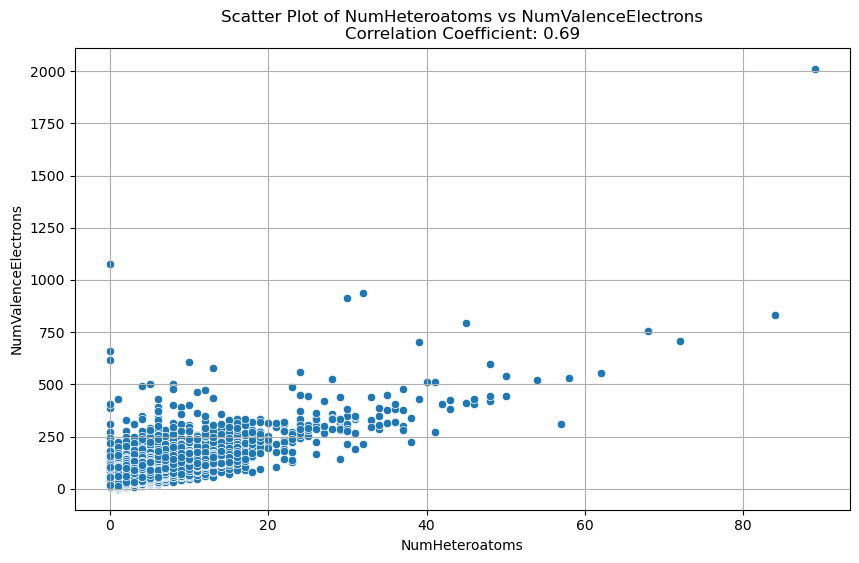

Scatter plot for NumHeteroatoms vs NumValenceElectrons (Correlation Coefficient: 0.69)


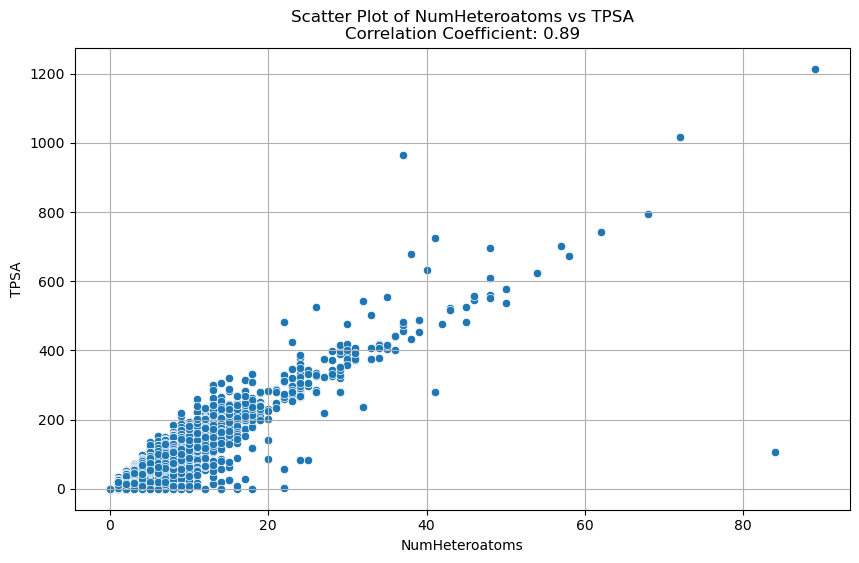

Scatter plot for NumHeteroatoms vs TPSA (Correlation Coefficient: 0.89)


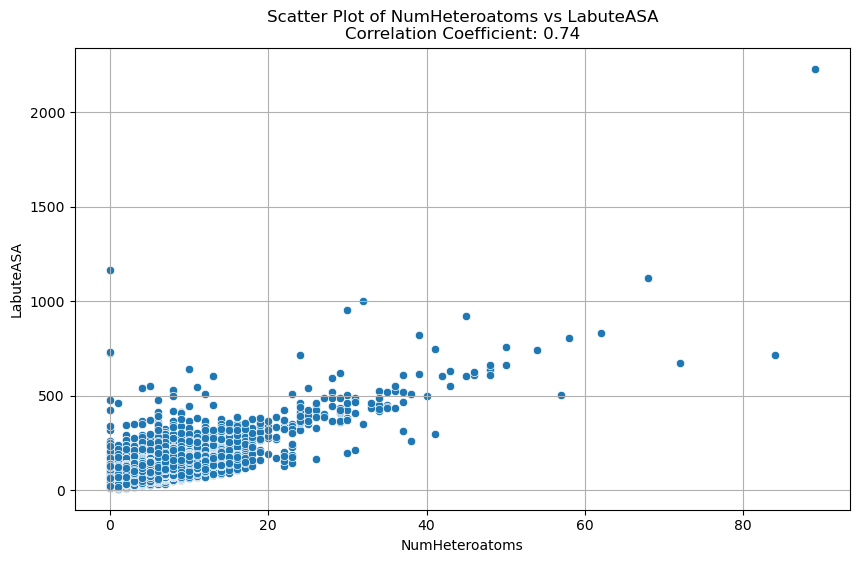

Scatter plot for NumHeteroatoms vs LabuteASA (Correlation Coefficient: 0.74)


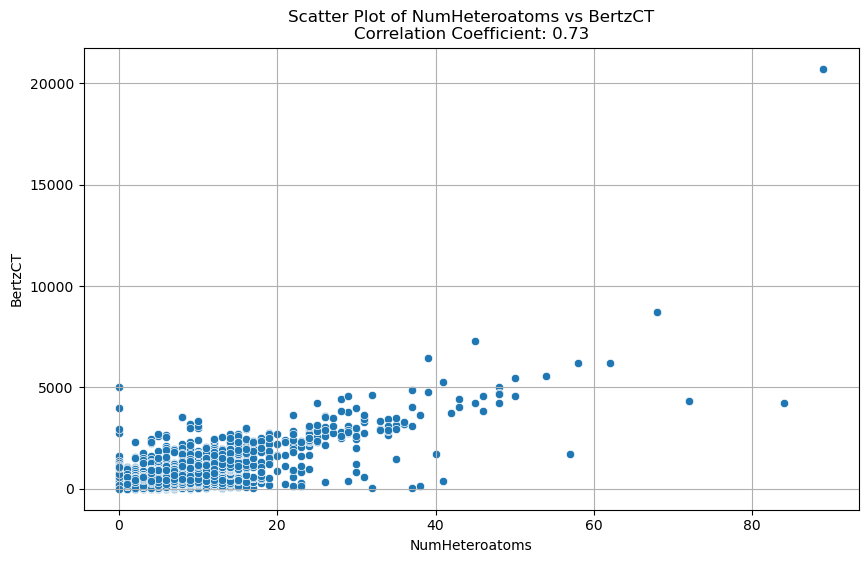

Scatter plot for NumHeteroatoms vs BertzCT (Correlation Coefficient: 0.73)


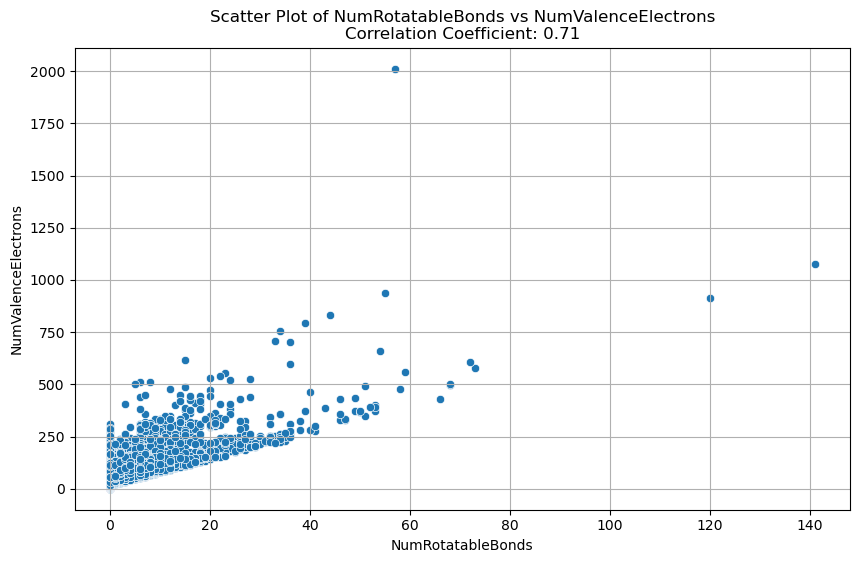

Scatter plot for NumRotatableBonds vs NumValenceElectrons (Correlation Coefficient: 0.71)


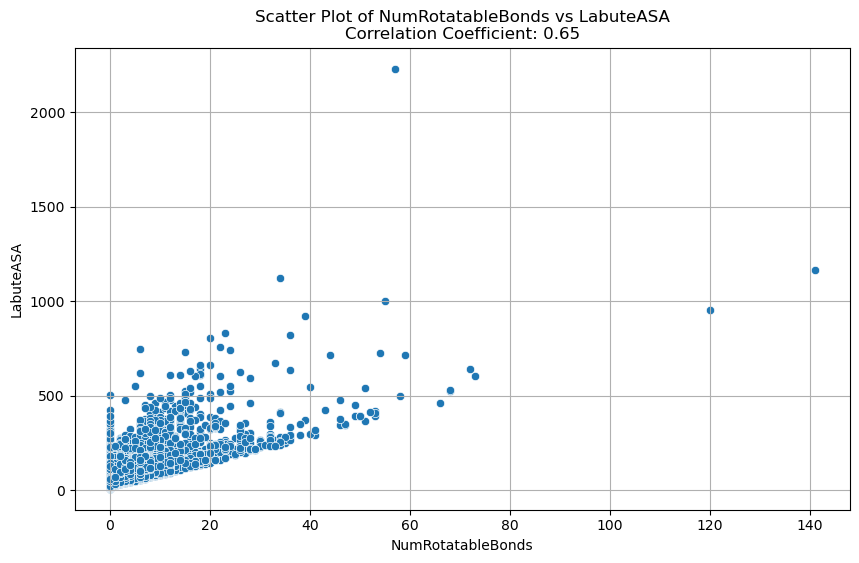

Scatter plot for NumRotatableBonds vs LabuteASA (Correlation Coefficient: 0.65)


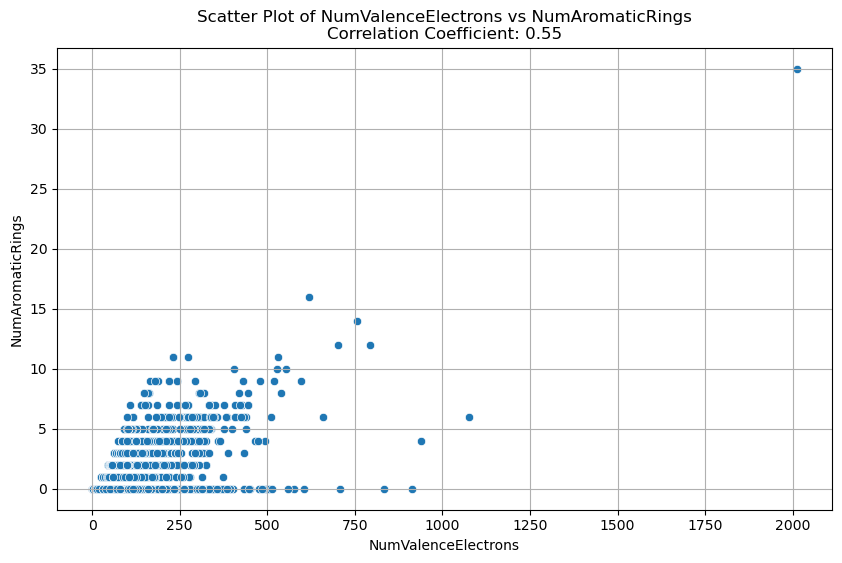

Scatter plot for NumValenceElectrons vs NumAromaticRings (Correlation Coefficient: 0.55)


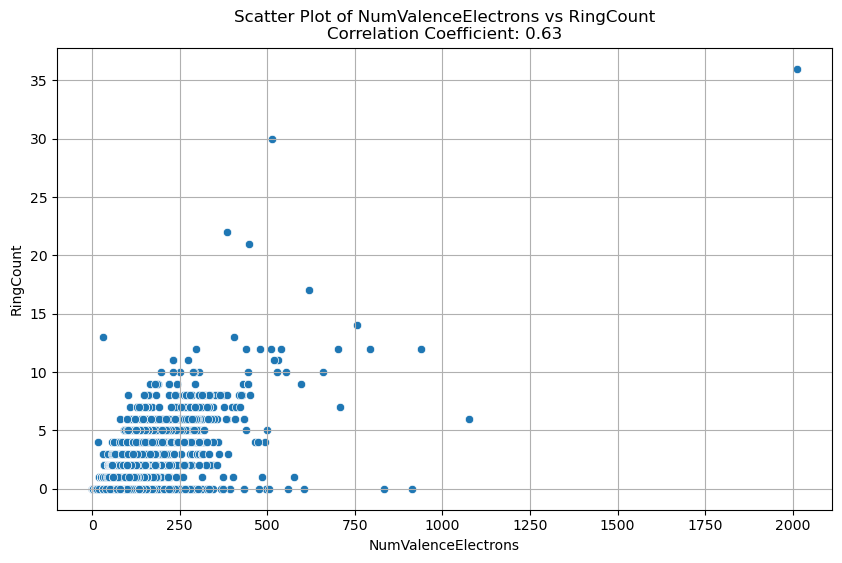

Scatter plot for NumValenceElectrons vs RingCount (Correlation Coefficient: 0.63)


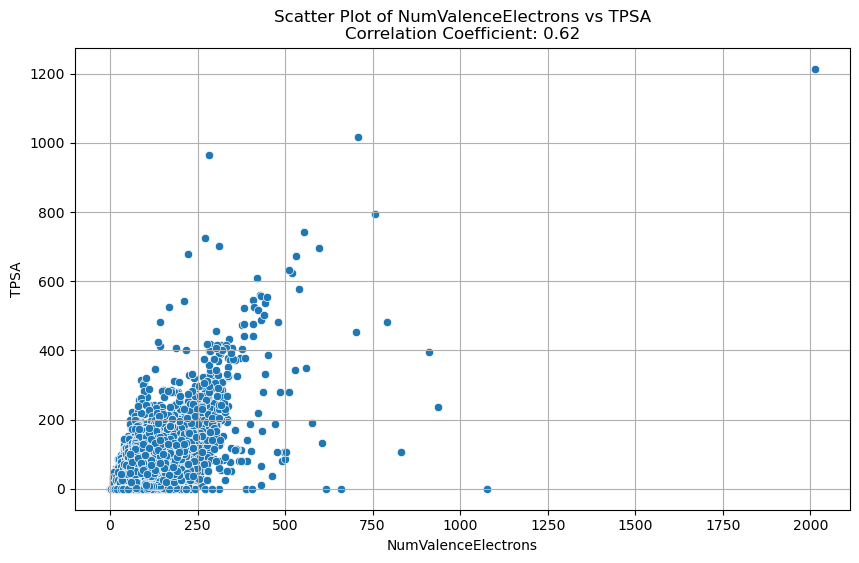

Scatter plot for NumValenceElectrons vs TPSA (Correlation Coefficient: 0.62)


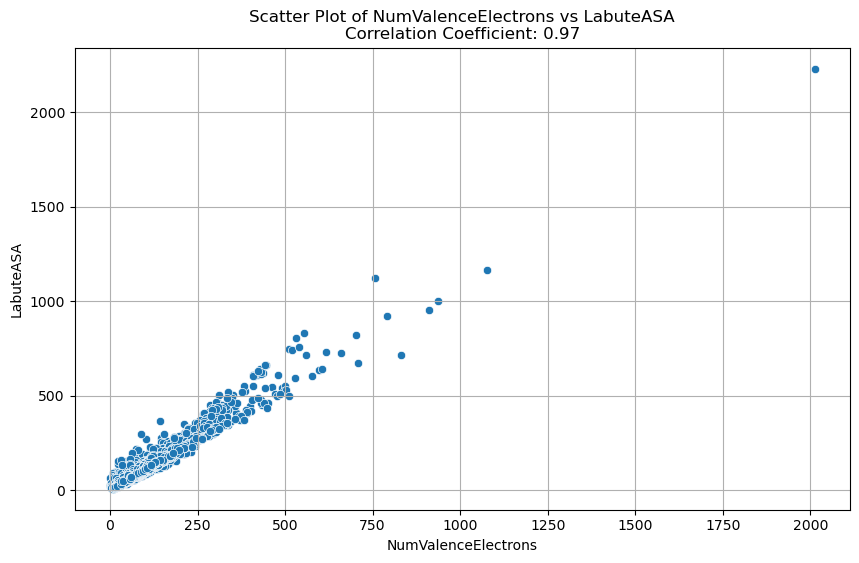

Scatter plot for NumValenceElectrons vs LabuteASA (Correlation Coefficient: 0.97)


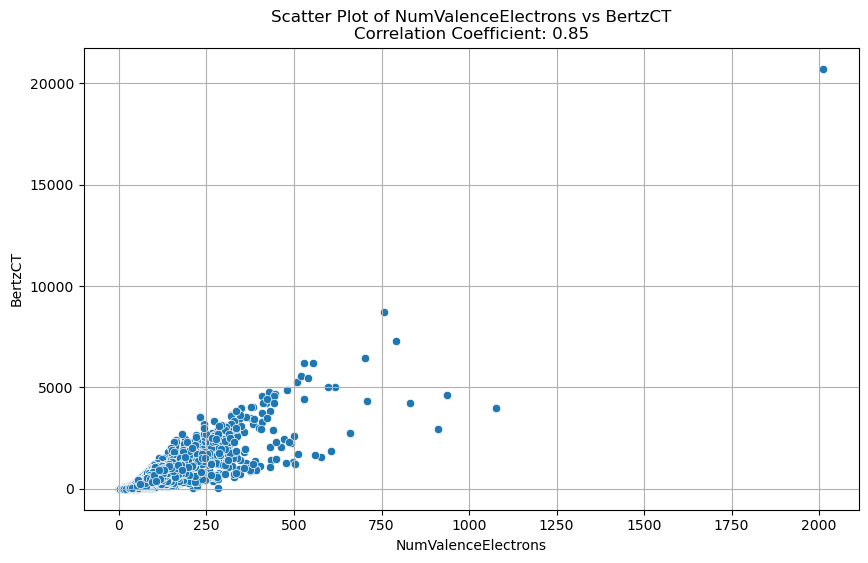

Scatter plot for NumValenceElectrons vs BertzCT (Correlation Coefficient: 0.85)


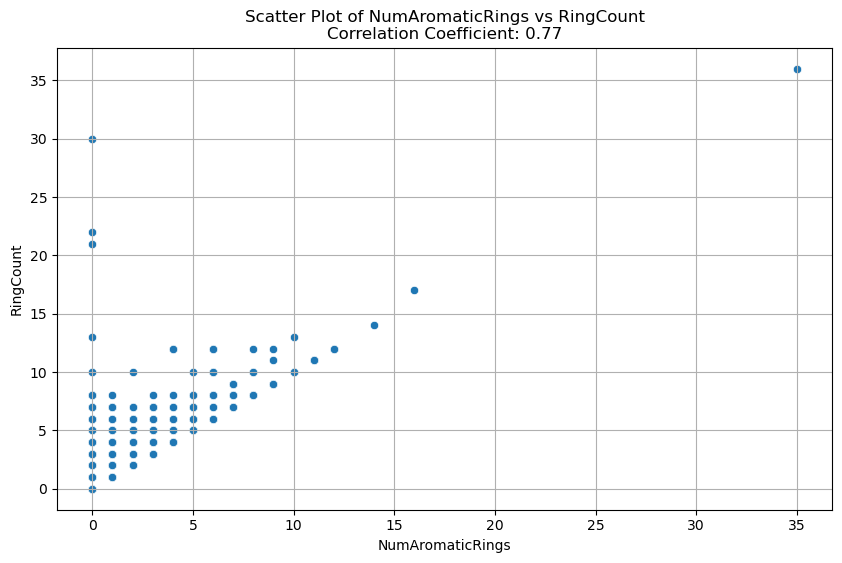

Scatter plot for NumAromaticRings vs RingCount (Correlation Coefficient: 0.77)


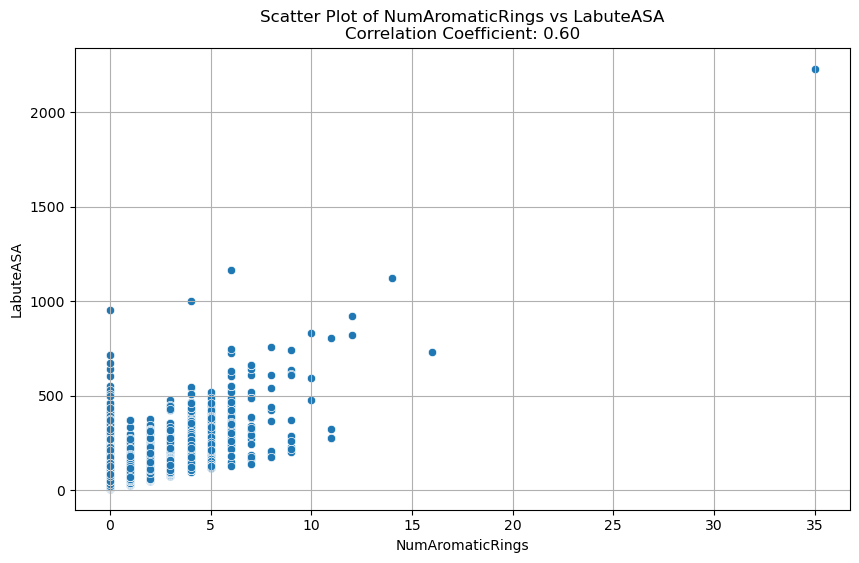

Scatter plot for NumAromaticRings vs LabuteASA (Correlation Coefficient: 0.60)


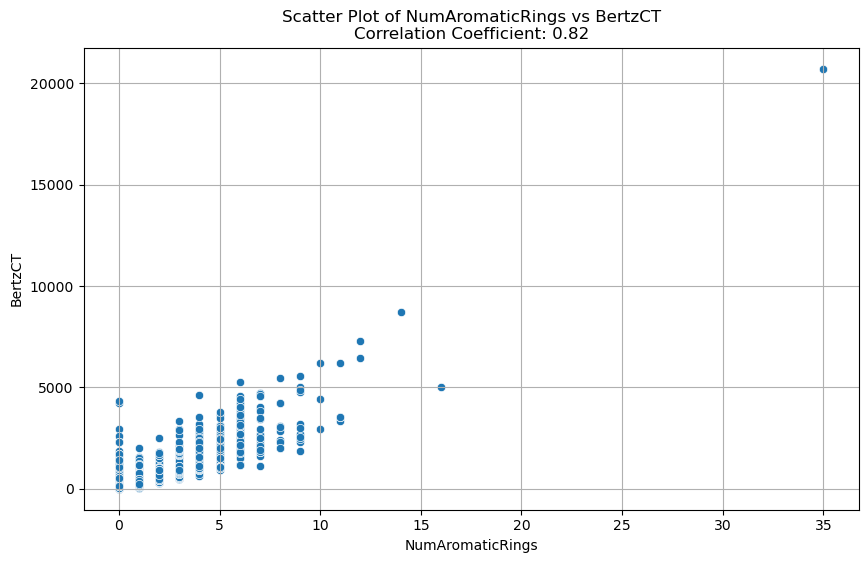

Scatter plot for NumAromaticRings vs BertzCT (Correlation Coefficient: 0.82)


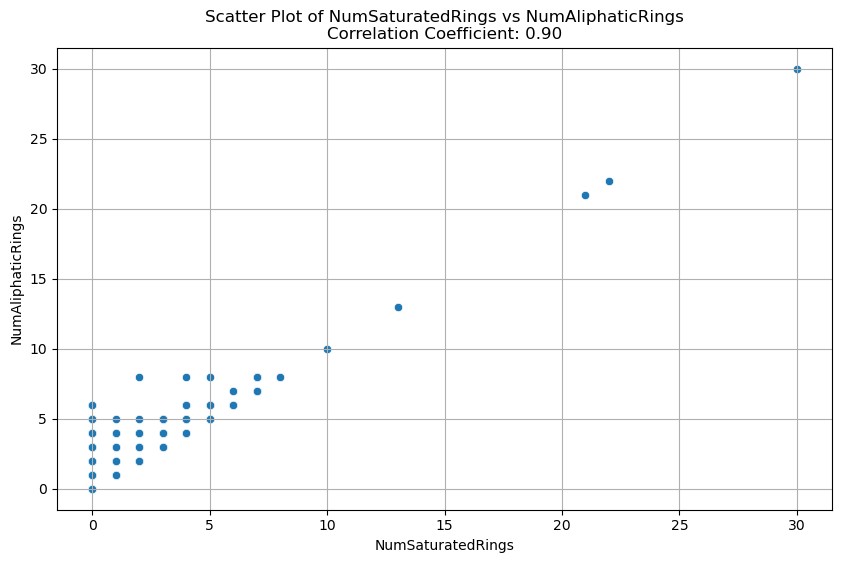

Scatter plot for NumSaturatedRings vs NumAliphaticRings (Correlation Coefficient: 0.90)


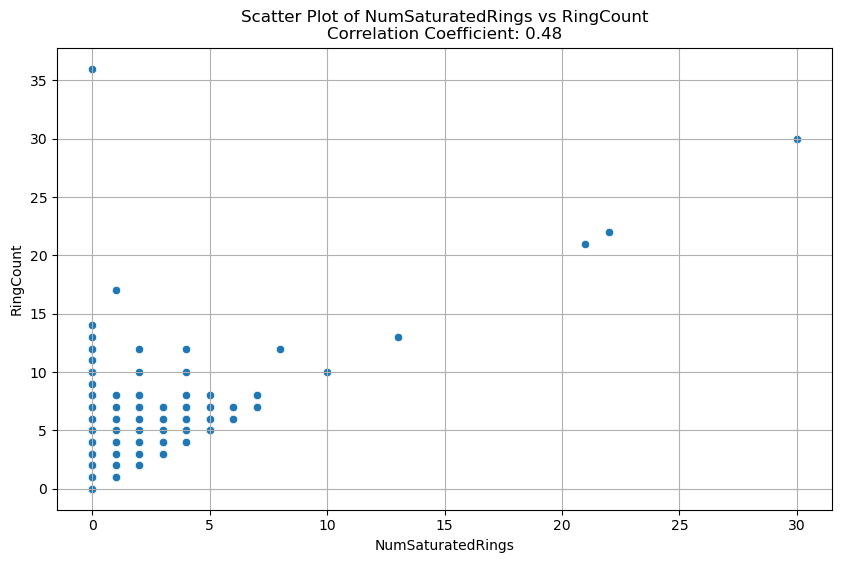

Scatter plot for NumSaturatedRings vs RingCount (Correlation Coefficient: 0.48)


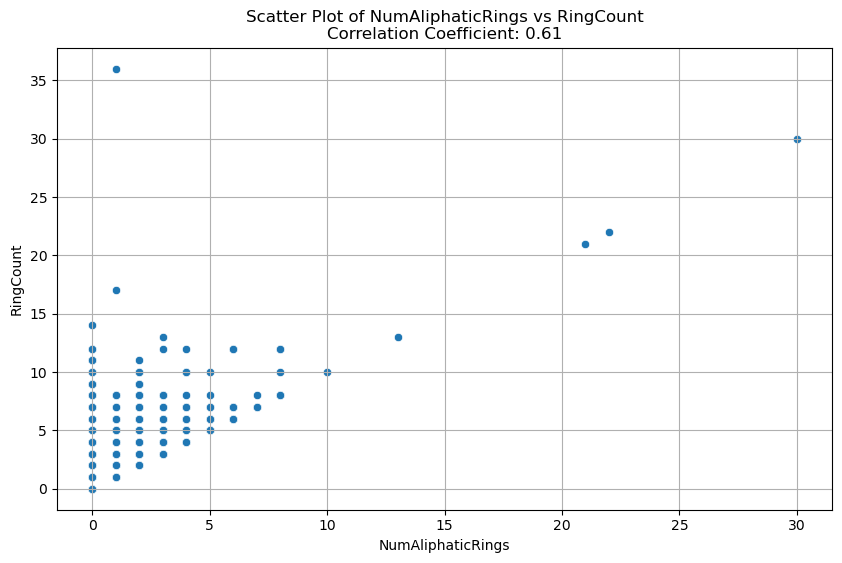

Scatter plot for NumAliphaticRings vs RingCount (Correlation Coefficient: 0.61)


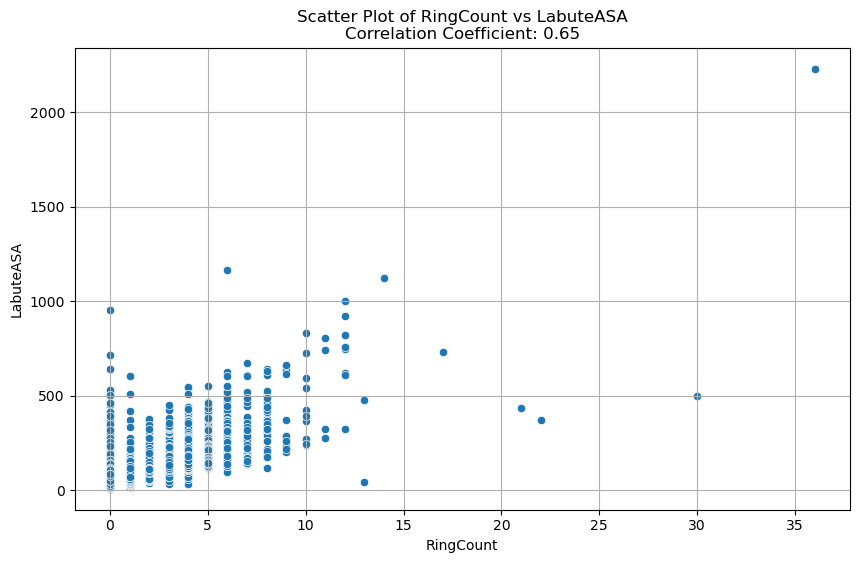

Scatter plot for RingCount vs LabuteASA (Correlation Coefficient: 0.65)


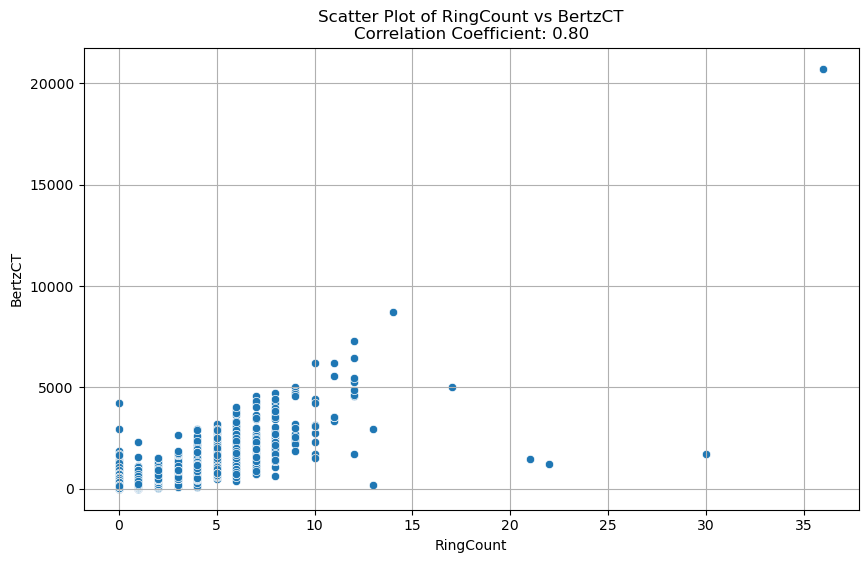

Scatter plot for RingCount vs BertzCT (Correlation Coefficient: 0.80)


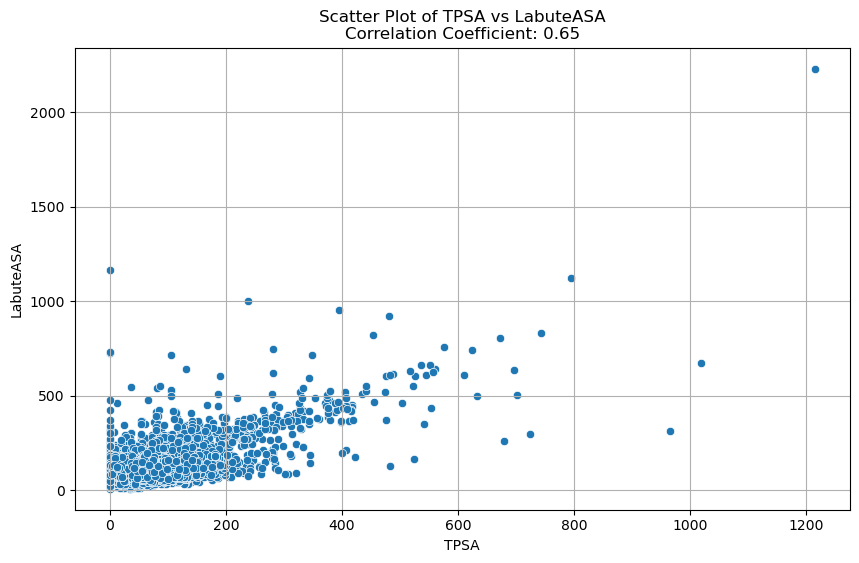

Scatter plot for TPSA vs LabuteASA (Correlation Coefficient: 0.65)


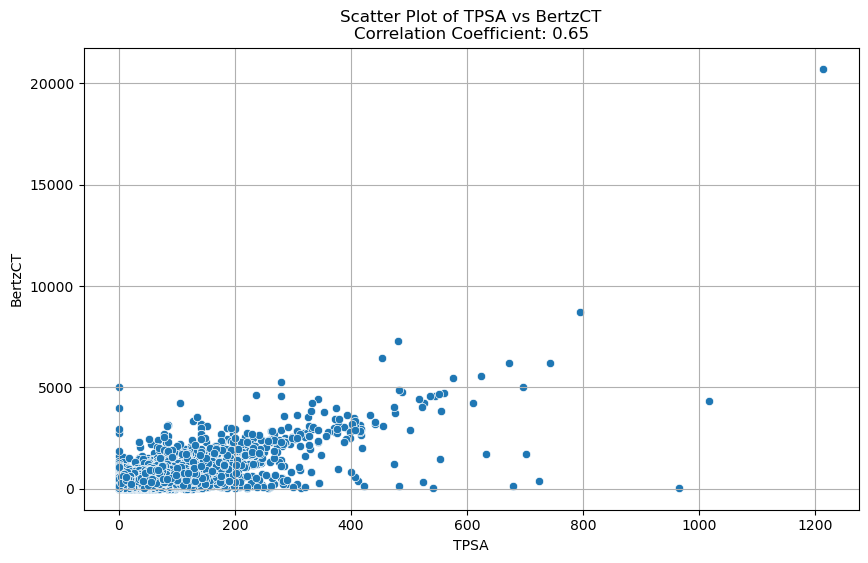

Scatter plot for TPSA vs BertzCT (Correlation Coefficient: 0.65)


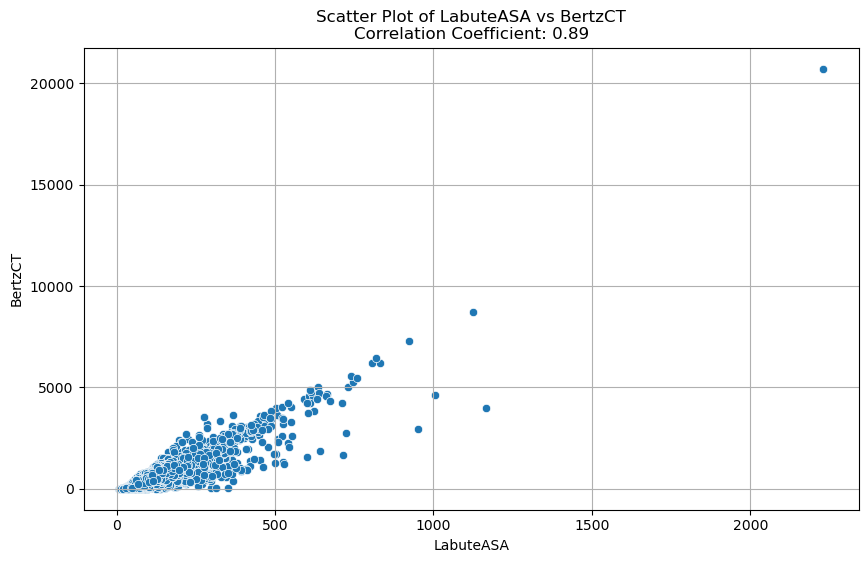

Scatter plot for LabuteASA vs BertzCT (Correlation Coefficient: 0.89)


In [19]:
# To calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# To find pairs of columns with correlation coefficient greater than 0.45
high_correlation_pairs = []
threshold = 0.45
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_correlation_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

# To plot scatter plots for each pair with high correlation
for pair in high_correlation_pairs:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=pair[0], y=pair[1], data=df)
    plt.title(f'Scatter Plot of {pair[0]} vs {pair[1]}\nCorrelation Coefficient: {correlation_matrix.loc[pair[0], pair[1]]:.2f}')
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.grid(True)
    plt.show()

    print(f'Scatter plot for {pair[0]} vs {pair[1]} (Correlation Coefficient: {correlation_matrix.loc[pair[0], pair[1]]:.2f})')

Scatter plot study shows that solubility and molecular characteristics have a complicated relationship. It demonstrates that because of their increasing size and complexity, compounds become less soluble as their molecular weight increases. Compounds with higher MolLogP values have lower water solubility. Solubility and molecular refractivity, heavy atom count, and approximate surface area also have a somewhat negative association. Understanding the factors affecting a compound's solubility and molecular complexity is possible.

## `Multivariate Analysis`

Multivariate analysis uses techniques like multiple regression, PCA, and cluster analysis to examine multiple variables simultaneously, identifying complex relationships and patterns not found in univariate or bivariate analyses.

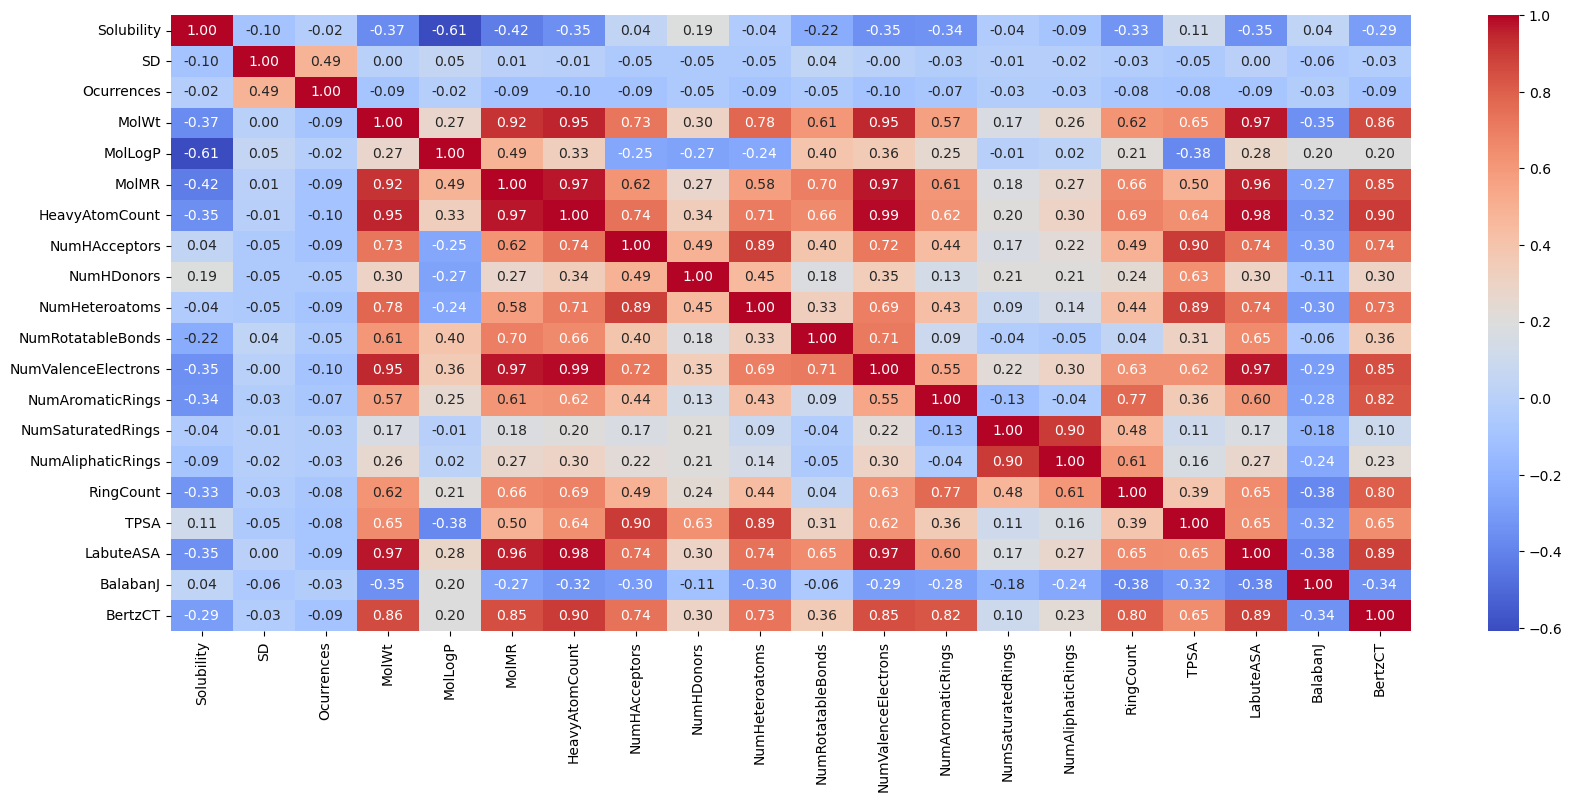

In [20]:
# To plot correlation matrix heat map of the columns
plt.figure(figsize=(20, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

An extensive summary of all the connections between different solubility and molecular characteristics is provided by the correlation matrix. The correlation coefficient, which ranges from -1 to 1, is represented by each matrix column between two attributes. The direction and intensity of these linkages inside the matrix are graphically represented by the colors red and blue, respectively, denoting positive and negative correlations. As mentioned before, the correlation heatmap illustrates the connections among the various dataset number columns.

## `Principal Component Analysis`


Principal component analysis (PCA) is a crucial method for reducing dimensionality by condensing large variables into manageable sets, reducing noise, and increasing efficiency in datasets with multiple variables.


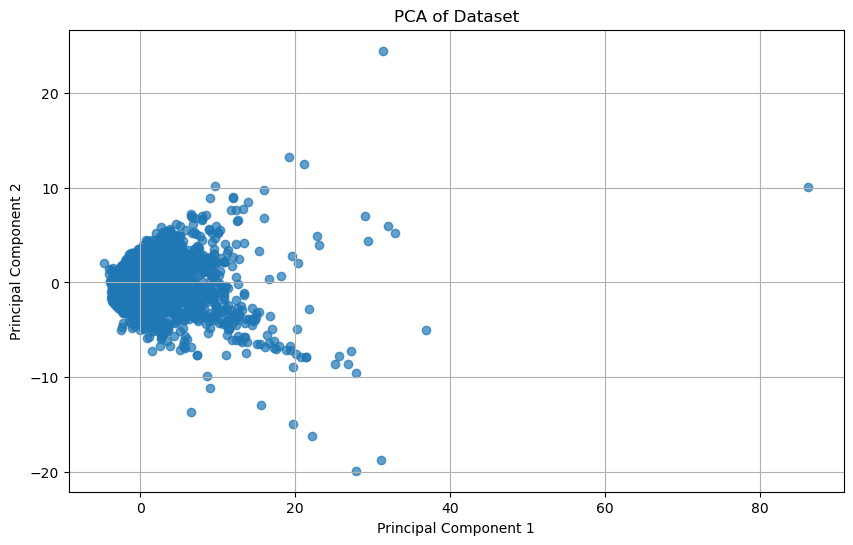

Explained variance ratio: [0.46329573 0.13466843]


In [21]:
# To select numerical columns for PCA
numerical_cols = df.select_dtypes(include=[np.number]).columns
data = df[numerical_cols].dropna()

# To standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# To apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# To create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# To plot the principal components
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Dataset')
plt.grid(True)
plt.show()

# To print the explained variance ratio
print(f'Explained variance ratio: {pca.explained_variance_ratio_}')

In [22]:
pca_df

PC1       PC2
0     0.427680  1.811585
1    -0.863636  0.471151
2    -2.213924  0.425315
3     7.877660  2.215720
4     3.949742  0.375230
...        ...       ...
9977  0.033225  0.504862
9978  4.156564 -2.543009
9979 -1.962507  0.533363
9980  2.968548  1.681065
9981  1.319624  1.291313

[9982 rows x 2 columns]

PCA reduces complex dataset dimensionality by converting original variables into uncorrelated ones. The first principle component explains most variance, unifying the dataset and simplifying analysis. Outliers display significant variation, and PC1 captures more variation than PC2.

## `Cluster Analysis`

By grouping items according to similarities, cluster analysis is a statistical method that can identify patterns and data structures that bivariate or univariate analysis may have overlooked.

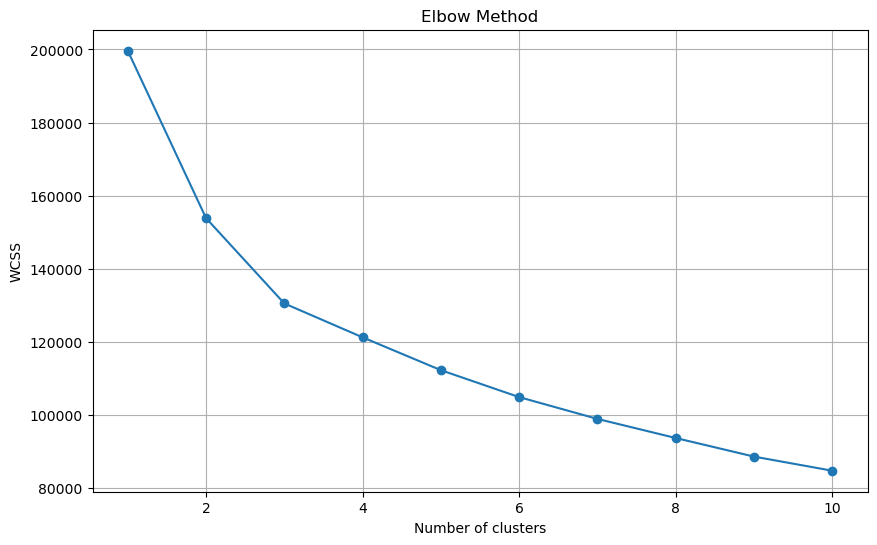

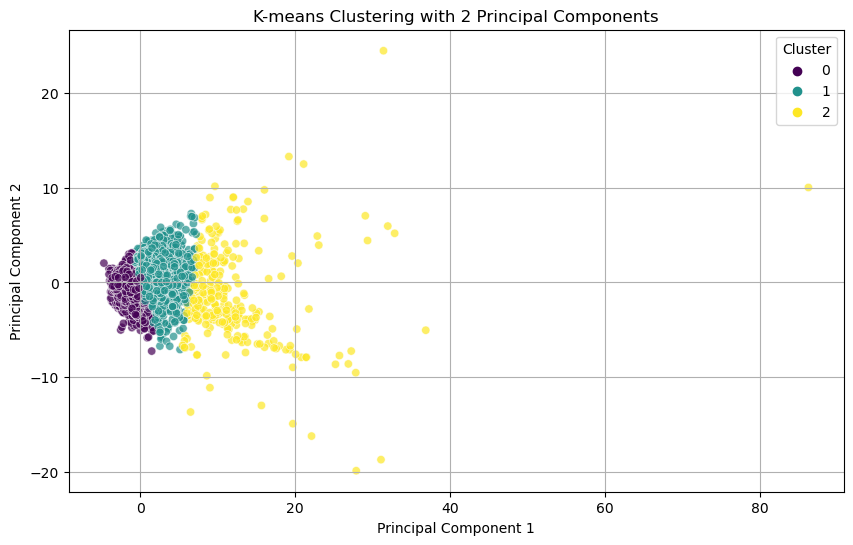

In [23]:
# To select numerical columns for clustering
numerical_cols = df.select_dtypes(include=[np.number]).columns
data = df[numerical_cols].dropna()

# To standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# To determine the number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# To plot the Elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# To apply K-means clustering with the chosen number of clusters (e.g., 3)
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

# To add the cluster labels to the original dataframe
df['Cluster'] = cluster_labels

# To apply PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = cluster_labels

# To plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', alpha=0.7)
plt.title('K-means Clustering with 2 Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [24]:
from sklearn.metrics import silhouette_score

# To calculate the silhouette score
sil_score = silhouette_score(scaled_data, cluster_labels)
print(f'Silhouette Score: {sil_score:.2f}')

Silhouette Score: 0.24


When the Elbow Method is used to cluster analysis, three unique clusters with a silhouette score of 0.24—which indicates better separation and less overlap—are revealed, showing a modest quality of clustering.

Best number of clusters: 2


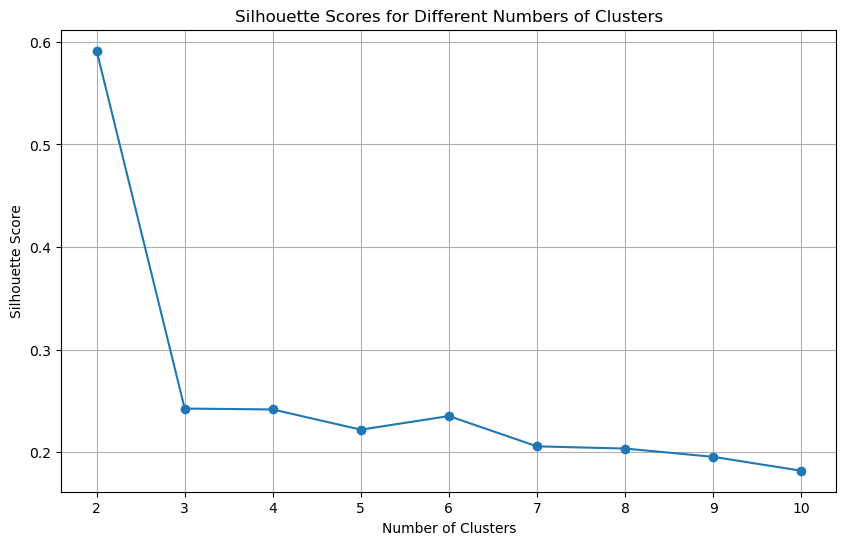

In [25]:
silhouette_scores = []

# To try different numbers of clusters
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    sil_score = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append((k, sil_score))

# To find the best number of clusters
best_k = max(silhouette_scores, key=lambda x: x[1])[0]
print(f'Best number of clusters: {best_k}')

# To plot silhouette scores
ks, scores = zip(*silhouette_scores)
plt.figure(figsize=(10, 6))
plt.plot(ks, scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

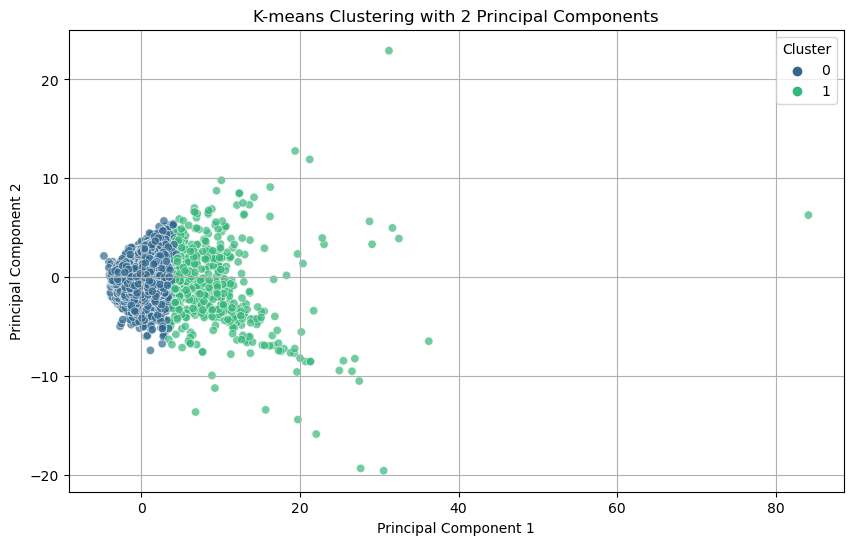

Silhouette Score with 2 clusters: 0.58


In [26]:
# To select numerical columns for clustering
numerical_cols = df.select_dtypes(include=[np.number]).columns
data = df[numerical_cols].dropna()

# To standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# To apply K-means clustering with the chosen number of clusters (2)
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

# To add the cluster labels to the original dataframe
df['Cluster'] = cluster_labels

# To apply PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = cluster_labels

# To plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', alpha=0.7)
plt.title('K-means Clustering with 2 Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# To calculate and print the silhouette score
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(scaled_data, cluster_labels)
print(f'Silhouette Score with 2 clusters: {sil_score:.2f}')


Further investigation with alternative cluster counts and their corresponding silhouette values indicates that the optimal number of clusters is 2, as indicated by the maximum silhouette score of 0.58. An object's silhouette score indicates how similar it is to its own cluster compared to other clusters. Higher silhouette ratings are indicative of better-defined clusters. The best result, of 0.58, is achieved with two clusters, as the silhouette scores for different cluster counts show. This indicates that using two clusters is the most effective method for differentiating between groups.

In [ ]:
# To add the cluster labels to the original dataframe
df['Cluster'] = cluster_labels

# To calculate mean and standard deviation of each feature within each cluster
cluster_profile = df.groupby('Cluster').agg(['mean', 'std'])
print(cluster_profile)

# To plot distributions of key features for each cluster
key_features = list(numerical_cols)
for feature in key_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=feature, hue='Cluster', kde=True, element='step')
    plt.title(f'Distribution of {feature} by Cluster')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

More soluble compounds are indicated by a wider range of solubility values and fewer heavy atoms in Cluster 1 as compared to Cluster 0. It has a narrower MolLogP range, a molecular weight distribution, and a higher MolMR and refractivity. Cluster 1 is more widely distributed and has higher TPSA values and more lipophilic compounds. Additionally, it has smaller BalabanJ values, indicating lower molecular complexity, and smaller BertzCT values, indicating more complex compounds.

In [ ]:
# To descriptive statistics
cluster_descriptive_stats = df.groupby('Cluster').agg(['mean', 'median', 'std', 'min', 'max'])
print(cluster_descriptive_stats)

## `Statistical Analysis`

A statistical test called the t-test is used to compare two groups' means and see if there is a significant difference between them. The t-test is being used in this instance to compare the means of different attributes across the two clusters that the dataset indicated. We may ascertain whether there is statistical significance in the feature distribution differences between Cluster 0 and Cluster 1 by running this test.

The hypotheses for the t-tests are as follows:

\begin{align*}
H_0 &: \mu_{0} = \mu_{1} \quad \text{(There is no significant difference in the mean of the feature between Cluster 0 and Cluster 1.)} \\
H_1 &: \mu_{0} \neq \mu_{1} \quad \text{(There is a significant difference in the mean of the feature between Cluster 0 and Cluster 1.)}
\end{align*}

\begin{align*}
\text{where }  \mu_{0} \text{ is the mean of the feature for Cluster 0, and } \mu_{1} \text{ is the mean of the feature for Cluster 1.}
\end{align*}

In [ ]:
from scipy.stats import ttest_ind

# To perform t-tests for each feature
features = numerical_cols
t_test_results = {}
for feature in features:
    cluster0_data = df[df['Cluster'] == 0][feature]
    cluster1_data = df[df['Cluster'] == 1][feature]
    t_stat, p_value = ttest_ind(cluster0_data, cluster1_data, equal_var=False)
    t_test_results[feature] = (t_stat, p_value)

# To display t-test results
for feature, (t_stat, p_value) in t_test_results.items():
    print(f"{feature}: t-statistic = {t_stat:.2f}, p-value = {p_value:.4f}")

The results of the analysis show that there are notable differences between the two clusters in terms of molecular weight, MolLogP, molecular refractivity, heavy atom count, heteroatoms, rotatable bonds, valence electrons, aromatic, saturated, and aliphatic rings, ring count, topological polar surface area (TPSA), and approximate surface area (LabuteASA). The heavier atoms, heteroatoms, rotatable bonds, valence electrons, aromatic, saturated, and aliphatic rings, ring count, TPSA, LabuteASA, BalabanJ, and BertzCT are all more prevalent in Cluster 1. These results imply that the clusters correspond to discrete groups with various physical and chemical characteristics.

In [ ]:
# To correlation matrices for each cluster
corr_cluster0 = df[df['Cluster'] == 0][numerical_cols].corr()
corr_cluster1 = df[df['Cluster'] == 1][numerical_cols].corr()

# To plot correlation matrices
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.heatmap(corr_cluster0, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Cluster 0')
plt.show()

# To create a heatmap of the correlation matrix for Cluster 
plt.figure(figsize=(20, 10))
sns.heatmap(corr_cluster1, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Cluster 1')
plt.show()

## `Model Building`

There are notable differences between the two clusters in terms of molecular weight, MolLogP, molecular refractivity, heavy atom count, heteroatoms, rotatable bonds, valence electrons, aromatic, saturated, and aliphatic rings, ring count, topological polar surface area (TPSA), and approximate surface area (LabuteASA). Cluster 1 has more rotatable bonds, valence electrons, aromatic, saturated, and aliphatic rings; it also has more ring count, TPSA, LabuteASA, BalabanJ, and BertzCT. These findings suggest that the groupings that the clusters represent are distinct and possess special chemical and physical properties.

In [ ]:
# To exclude target and cluster label
features = df.drop(columns=['Solubility', 'Cluster'])  
target = df['Solubility']

# To split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [ ]:
# To check for non-numeric columns
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns:", non_numeric_cols)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# To one-hot the encode in a  non-numeric columns
df = pd.get_dummies(df, columns=non_numeric_cols, drop_first=True)

In [ ]:
#To select features and target
features = df.drop(columns=['Solubility', 'Cluster'])  # Exclude target and cluster label
target = df['Solubility']

# To split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# To initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# To train and evaluate each model
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
# To calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    results[model_name] = {'MSE': mse, 'RMSE': rmse, 'R-squared': r2, 'MAE': mae}

In [ ]:
# To display the results
results_df = pd.DataFrame(results).T
print(results_df)

Three regression models are examined in the study: Random Forests, Decision Trees, and Linear Regression. Random Forests surpass Linear Regression in explaining 62% of the variance in solubility.

## `Conclusion`
A dataset containing information on the solubility and molecular characteristics of several compounds was evaluated in the study. The results showed significant variability in terms of solubility values, which were largely concentrated between -2 and 0. Additionally, the distribution of molecular weights was skewed to the right, and metrics like MolLogP and MolMR showed distinct patterns. Bivariate analysis revealed significant connections between solubility and molecular characteristics, including both strongly and moderately unfavorable interactions. It was discovered that there were two unique clusters with significant variations. After using PCA to reduce the dataset's dimensionality, statistical analysis revealed that the feature mean values differed greatly. The most accurate model for predicting solubility, according to the data, was Random Forest.

## References

- [Breiman, L., 2001. Random Forests. *Machine Learning*, 45(1), pp.5-32.](https://link.springer.com/article/10.1023/A:1010933404324)

- [Cohen, J., Cohen, P., West, S.G. and Aiken, L.S., 2013. *Applied Multiple Regression/Correlation Analysis for the Behavioral Sciences*. 3rd ed. New York: Routledge.](https://www.routledge.com/Applied-Multiple-RegressionCorrelation-Analysis-for-the-Behavioral-Sciences/Cohen-Cohen-West-Aiken/p/book/9781138881928)

- [Dancey, C.P. and Reidy, J., 2011. *Statistics Without Maths for Psychology*. 5th ed. Harlow: Pearson Education Limited.](https://www.pearson.com/store/p/statistics-without-maths-for-psychology/P100000071939)

- [Everitt, B.S., Landau, S., Leese, M. and Stahl, D., 2011. *Cluster Analysis*. 5th ed. Chichester: Wiley.](https://www.wiley.com/en-us/Cluster+Analysis%2C+5th+Edition-p-9780470749913)

- [Field, A., 2013. *Discovering Statistics Using IBM SPSS Statistics*. 4th ed. London: SAGE Publications.](https://uk.sagepub.com/en-gb/eur/discovering-statistics-using-ibm-spss-statistics/book238032)

- [Hair, J.F., Black, W.C., Babin, B.J. and Anderson, R.E., 2014. *Multivariate Data Analysis*. 7th ed. Harlow: Pearson Education Limited.](https://www.pearson.com/store/p/multivariate-data-analysis/P100000678158)

- [Hou, T., Xu, X. and Lee, S., 2009. ADME Evaluation in Drug Discovery. 1. Applications of Genetic Algorithms to the Prediction of Blood-Brain Barrier Penetration. *Journal of Chemical Information and Modeling*, 49(2), pp.133-144.](https://pubs.acs.org/doi/10.1021/ci800159k)

- [Kaufman, L. and Rousseeuw, P.J., 2009. *Finding Groups in Data: An Introduction to Cluster Analysis*. Hoboken: Wiley-Interscience.](https://www.wiley.com/en-us/Finding+Groups+in+Data%3A+An+Introduction+to+Cluster+Analysis-p-9780470317488)

- [Kotsiantis, S., Kanellopoulos, D. and Pintelas, P., 2006. Data preprocessing for supervised learning. *International Journal of Computer Science*, 1(2), pp.111-117.](https://www.ijcse.com/docs/IJCSE06-01-02-14.pdf)

- [Lipinski, C.A., Lombardo, F., Dominy, B.W. and Feeney, P.J., 2001. Experimental and computational approaches to estimate solubility and permeability in drug discovery and development settings. *Advanced Drug Delivery Reviews*, 46(1-3), pp.3-26.](https://www.sciencedirect.com/science/article/abs/pii/S0169409X00001519)

- [Montgomery, D.C., Peck, E.A. and Vining, G.G., 2012. *Introduction to Linear Regression Analysis*. 5th ed. Hoboken: Wiley.](https://www.wiley.com/en-us/Introduction+to+Linear+Regression+Analysis%2C+5th+Edition-p-9780470542811)

- [Quinlan, J.R., 1986. Induction of Decision Trees. *Machine Learning*, 1(1), pp.81-106.](https://link.springer.com/article/10.1007/BF00116251)

- [Tabachnick, B.G. and Fidell, L.S., 2013. *Using Multivariate Statistics*. 6th ed. Boston: Pearson Education.](https://www.pearson.com/store/p/using-multivariate-statistics/P100000503506)

- [Weinberg, S.L. and Abramowitz, S.K., 2008. *Statistics Using SPSS: An Integrative Approach*. 2nd ed. Cambridge: Cambridge University Press.](https://www.cambridge.org/core/books/statistics-using-spss/DBD1C99CB0B6D1DFCD4B1281C28737BC)

- [Zhu, X., Liu, Q., Yan, Q. and Xu, Y., 2019. Data Preprocessing in Web Usage Mining. *International Journal of Computer Science and Information Security (IJCSIS)*, 17(9), pp.56-60.](https://sites.google.com/site/ijcsis/)